# <center> Passive Infrared Sensing of Dexras1 knockout and C57 Wild-type Mice

# <center> Converting 10-second bins into sleep data
### <center> By Osama Abdalla </center>

In [1]:
#Loading appropriate packages:
library(tidyverse)
library(lubridate) # for handling dates
library(ez) #for split-plot ANOVA calculations
library(roll) # for rolling sum calculations
library(plotrix) # for standard error plotting
library(rstatix) #for piping into statistical tests
library(grid) # for textgrob

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.7
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'ez' was built under R version 4.1.3"
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influen

The data are attached as a csv file called 20220530.csv
Let's attach this, call it Tickling_raw, and take a look at the data

In [2]:
Tickling_raw <- read.csv("20220530.csv", header=TRUE)
head(Tickling_raw)

,Time,ID,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2022-05-30T20:02:19,COMPASS_Can1,68,83,79,65,61,65,2999
2,2022-05-30T20:02:29,COMPASS_Can1,77,44,68,82,71,89,2985
3,2022-05-30T20:02:39,COMPASS_Can1,79,51,87,71,78,81,2997
4,2022-05-30T20:02:49,COMPASS_Can1,80,48,79,74,73,87,2975
5,2022-05-30T20:02:59,COMPASS_Can1,53,39,61,66,56,90,2980
6,2022-05-30T20:04:02,COMPASS_Can1,59,79,58,41,59,67,2934


PIR sensors are recording activity data every 10 seconds, with values between 0 (no activity) to 100 (full activity) during a 10 second interval. Each animal is hooked onto a single PIR. PIR1,3,5 are recording data for wild-type C57 mice. PIR2,4,6 are recording data for Dexras1 knockout mice. Six animals were thus recorded at the same time. The 'Time' column is inaccurate because the PIR sensor was developed in Greenwich Mean Time, but was used in Eastern Standard Time, which is 4 hours ahead. Lights in the cabinet are turned on at 9AM EST and off at 9PM. The PIR sensors are connected to an Arduino board that is not connected to a computer. This results in a lag in time of about 100 seconds every 2 weeks. To determine 'real-time' the LDR column can be used, which indicates when lights are on (>0) or off (0). Thus, for the first six animals, we will re-define the time column to account for the time zone difference (14400 seconds) and lag (1139 seconds) in a new dataframe defined as Tickling, as follows: 

In [3]:
Tickling <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15309)),
                                LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15309)), format="%Y-%m-%d %H:00:00"))%>%
                        
  select(-c("ID","LDR"))
head(Tickling)

,Time,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LightDark,start_hour
,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2022-05-30 15:47:10,68,83,79,65,61,65,L,2022-05-30 15:00:00
2,2022-05-30 15:47:20,77,44,68,82,71,89,L,2022-05-30 15:00:00
3,2022-05-30 15:47:30,79,51,87,71,78,81,L,2022-05-30 15:00:00
4,2022-05-30 15:47:40,80,48,79,74,73,87,L,2022-05-30 15:00:00
5,2022-05-30 15:47:50,53,39,61,66,56,90,L,2022-05-30 15:00:00
6,2022-05-30 15:48:53,59,79,58,41,59,67,L,2022-05-30 15:00:00


Six animals were recorded at the same time, and these made up one cohort. Animals were placed in cabinets and baseline recorded for 7 days (June 18 9AM to June 25 2022 9AM). Animals were then sleep deprived for 6 hours, and placed back in cabinets for post-deprivation recordings. There were a total of six cohorts, with all these data in the same 20220530.csv file. For convenience, we will relativize the dates of the remaining five cohorts to the first cohort, by subtracting days, such that baseline recordings begin on June 18 9AM for all these animals, and define these into dataframes Tickling1 through 5. The time the PIR is ahead of real-time can be found in the Mouse_Information.csv file.

In [4]:
Tickling1 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15398)-ddays(13)), 
                                LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15398)-ddays(13)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling2 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15508)-ddays(27)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15508)-ddays(27)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling3 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15601)-ddays(40)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15601)-ddays(40)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling4 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15700)-ddays(53)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15700)-ddays(53)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling5 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15798)-ddays(67)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15798)-ddays(67)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))


We will define a sleep bout as four or more consecutive 10-second intervals of registered PIR inactivity, that is, when the PIR has values of 0. We will define a function, sleep_bout to determine whether an animal is having a sleep bout:

In [5]:
sleep_bout <- function(PIR){
  PIRroll <- ifelse(roll_sum(PIR, 4)==0, 1,0)
  PIRnum <- numeric(length(PIRroll))
  for (i in 1:length(PIRroll)){
    PIRnum[i] <- ifelse(PIRroll[i]==0, 0, PIRnum[i-1]+1)
  }
  PIRnum
}

For example, extracting the information for PIR1 (below), we see there are six 10-second intervals of inactivity, followed by 4 10-second intervals, followed by 1 10-second interval. Only the six and four 10-second intevals of inactivity would count towards sleep

In [6]:
head(cbind(PIR1=Tickling$PIR1,sleep_bout=sleep_bout(Tickling$PIR1)),40)

PIR1,sleep_bout
68,NA
77,NA
79,NA
80,0
53,0
59,0
83,0
64,0
71,0
56,0


The length of the six 10-second interval of inactivity is 3, the length of the four 10-second interval is 1 and the length of the one 10-second interval is 0.

We can determine when a sleep bout begins by extracting the time column when sleep_bout for the PIR is 1, and subtracting 40-seconds, since the bout would have started 40 seconds earlier:

In [7]:
head(Tickling[sleep_bout(Tickling$PIR1)==1,]$Time-dseconds(40),5)

[1] NA                        NA                       
[3] NA                        "2022-05-30 15:49:43 UTC"
[5] "2022-05-30 15:58:23 UTC"

Thus, the first bout started at 15:49:43, and the second bout started at 15:58:23.

We can also extract the length of the sleep bouts using sleep_bout_duration, which searches and retains a non-zero number that is followed by 0:

In [8]:
sleep_bout_duration <- function (PIR){
  sleep_bout_duration <- sleep_bout(PIR)
  PIRMax <- numeric(length(sleep_bout_duration))
  for (i in 1:length(sleep_bout_duration)){
    PIRMax[i] <- ifelse(!sleep_bout_duration[i]==0 & 
                          sleep_bout_duration[i+1]==0, sleep_bout_duration[i],0)
  }
  PIRMax <- PIRMax[! PIRMax %in% c(0)]
  PIRMax
}

The first two sleep bout lengths for PIR1 are 3 and 1, as we discovered earlier, and are noted after the first three NAs.

In [9]:
head(sleep_bout_duration(Tickling$PIR1),28)

[1]   NA   NA   NA    3    1    4   14   21    4   13   43    2   29  143 4632
[16]    4   17    9    3    1    3    6   45    4    9    2    1    3

Apart from when the sleep bout begins, and the length of the bout, it would be helpful to know when the sleep bout ends. To determine this, a non-zero number followed by 0 from sleep_bout is indexed with Time:

In [10]:
sleep_bout_end <- function (PIR, Data){
  sleep_bout_duration <- sleep_bout(PIR)
  PIRMax <- numeric(length(sleep_bout_duration))
  for (i in 1:length(sleep_bout_duration)){
    PIRMax[i] <- ifelse(!sleep_bout_duration[i]==0 & 
                          sleep_bout_duration[i+1]==0, Data$Time[i],0)
  }
  PIRMax <- PIRMax[! PIRMax %in% c(0)]
  as_datetime(PIRMax)
}

In [11]:
head(sleep_bout_end(Tickling$PIR1, Tickling),5)

[1] NA                        NA                       
[3] NA                        "2022-05-30 15:50:43 UTC"
[5] "2022-05-30 15:59:03 UTC"

Thus, the first sleep bout ends at 15:50:43 and the second sleep bout ends at 15:59:03.

Using these functions, we can construct a dataframe for PIR1, which is shown below:

In [12]:
Sleep_Bout_PIR1 <- data.frame(Strain="C57", Sex="Male", Number="1", 
                              Start=Tickling[sleep_bout(Tickling$PIR1)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR1),
                              LightDark=Tickling[sleep_bout(Tickling$PIR1)==1,]$LightDark, 
                              'start_hour'=Tickling[sleep_bout(Tickling$PIR1)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR1, Tickling))
head(Sleep_Bout_PIR1)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>
1,C57,Male,1,NA,NA,NA,NA,NA
2,C57,Male,1,NA,NA,NA,NA,NA
3,C57,Male,1,NA,NA,NA,NA,NA
4,C57,Male,1,2022-05-30 15:49:43,3,L,2022-05-30 15:00:00,2022-05-30 15:50:43
5,C57,Male,1,2022-05-30 15:58:23,1,L,2022-05-30 15:00:00,2022-05-30 15:59:03
6,C57,Male,1,2022-05-30 16:13:12,4,L,2022-05-30 16:00:00,2022-05-30 16:16:36


We can construct a dataframe with this information for each animal, which we will name Sleep_Bout_PIR2 to Sleep_Bout_PIR36. Recall that Tickling to Tickling5 all contain the same data, with the exception of a shift in time such that baseline and deprivation data are all relativized to the same time:

In [13]:
Sleep_Bout_PIR2 <- data.frame(Strain="Dexras KO", Sex="Male", Number="1", 
                              Start=Tickling[sleep_bout(Tickling$PIR2)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR2),
                              LightDark=Tickling[sleep_bout(Tickling$PIR2)==1,]$LightDark,
                              start_hour=Tickling[sleep_bout(Tickling$PIR2)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR2, Tickling))
Sleep_Bout_PIR3 <- data.frame(Strain="C57", Sex="Male", Number="2", 
                              Start=Tickling[sleep_bout(Tickling$PIR3)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR3),
                              LightDark=Tickling[sleep_bout(Tickling$PIR3)==1,]$LightDark,
                              start_hour=Tickling[sleep_bout(Tickling$PIR3)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR3, Tickling))
Sleep_Bout_PIR4 <- data.frame(Strain="Dexras KO", Sex="Male", Number="2", 
                              Start=Tickling[sleep_bout(Tickling$PIR4)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR4),
                              LightDark=Tickling[sleep_bout(Tickling$PIR4)==1,]$LightDark, 
                              start_hour=Tickling[sleep_bout(Tickling$PIR4)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR4, Tickling))
Sleep_Bout_PIR5 <- data.frame(Strain="C57", Sex="Male", Number="3", 
                              Start=Tickling[sleep_bout(Tickling$PIR5)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR5),
                              LightDark=Tickling[sleep_bout(Tickling$PIR5)==1,]$LightDark,
                              start_hour=Tickling[sleep_bout(Tickling$PIR5)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR5, Tickling))
Sleep_Bout_PIR6 <- data.frame(Strain="Dexras KO", Sex="Male", Number="3", 
                              Start=Tickling[sleep_bout(Tickling$PIR6)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling$PIR6),
                              LightDark=Tickling[sleep_bout(Tickling$PIR6)==1,]$LightDark,
                              start_hour=Tickling[sleep_bout(Tickling$PIR6)==1,]$start_hour,
                              End=sleep_bout_end(Tickling$PIR6, Tickling))
Sleep_Bout_PIR7 <- data.frame(Strain="C57", Sex="Male", Number="4", 
                              Start=Tickling1[sleep_bout(Tickling1$PIR1)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling1$PIR1),
                              LightDark=Tickling1[sleep_bout(Tickling1$PIR1)==1,]$LightDark, 
                              start_hour=Tickling1[sleep_bout(Tickling1$PIR1)==1,]$start_hour,
                              End=sleep_bout_end(Tickling1$PIR1, Tickling1))
Sleep_Bout_PIR8 <- data.frame(Strain="Dexras KO", Sex="Male", Number="4", 
                              Start=Tickling1[sleep_bout(Tickling1$PIR2)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling1$PIR2),
                              LightDark=Tickling1[sleep_bout(Tickling1$PIR2)==1,]$LightDark, 
                              start_hour=Tickling1[sleep_bout(Tickling1$PIR2)==1,]$start_hour,
End=sleep_bout_end(Tickling1$PIR2, Tickling1))
Sleep_Bout_PIR9 <- data.frame(Strain="C57", Sex="Male", Number="5", 
                              Start=Tickling1[sleep_bout(Tickling1$PIR3)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling1$PIR3),
                              LightDark=Tickling1[sleep_bout(Tickling1$PIR3)==1,]$LightDark, 
                              start_hour=Tickling1[sleep_bout(Tickling1$PIR3)==1,]$start_hour,
                              End=sleep_bout_end(Tickling1$PIR3, Tickling1))
                              
Sleep_Bout_PIR10 <- data.frame(Strain="Dexras KO", Sex="Male", Number="5", 
                              Start=Tickling1[sleep_bout(Tickling1$PIR4)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling1$PIR4),
                              LightDark=Tickling1[sleep_bout(Tickling1$PIR4)==1,]$LightDark, 
                              start_hour=Tickling1[sleep_bout(Tickling1$PIR4)==1,]$start_hour,
                              End=sleep_bout_end(Tickling1$PIR4, Tickling1))
Sleep_Bout_PIR11 <- data.frame(Strain="C57", Sex="Male", Number="6", 
                              Start=Tickling1[sleep_bout(Tickling1$PIR5)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling1$PIR5),
                              LightDark=Tickling1[sleep_bout(Tickling1$PIR5)==1,]$LightDark, 
                              start_hour=Tickling1[sleep_bout(Tickling1$PIR5)==1,]$start_hour,
                              End=sleep_bout_end(Tickling1$PIR5, Tickling1))
Sleep_Bout_PIR12 <- data.frame(Strain="Dexras KO", Sex="Male", Number="6", 
                               Start=Tickling1[sleep_bout(Tickling1$PIR6)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling1$PIR6),
                               LightDark=Tickling1[sleep_bout(Tickling1$PIR6)==1,]$LightDark, 
                               start_hour=Tickling1[sleep_bout(Tickling1$PIR6)==1,]$start_hour,
                               End=sleep_bout_end(Tickling1$PIR6, Tickling1))
Sleep_Bout_PIR13 <- data.frame(Strain="C57", Sex="Female", Number="1", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR1)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR1),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR1)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR1)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR1, Tickling2))
Sleep_Bout_PIR14 <- data.frame(Strain="Dexras KO", Sex="Female", Number="1", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR2)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR2),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR2)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR2)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR2, Tickling2))
Sleep_Bout_PIR15 <- data.frame(Strain="C57", Sex="Female", Number="2", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR3)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR3),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR3)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR3)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR3, Tickling2))
Sleep_Bout_PIR16 <- data.frame(Strain="Dexras KO", Sex="Female", Number="2", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR4)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR4),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR4)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR4)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR4, Tickling2))
Sleep_Bout_PIR17 <- data.frame(Strain="C57", Sex="Female", Number="3", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR5)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR5),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR5)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR5)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR5, Tickling2))
Sleep_Bout_PIR18 <- data.frame(Strain="Dexras KO", Sex="Female", Number="3", 
                               Start=Tickling2[sleep_bout(Tickling2$PIR6)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling2$PIR6),
                               LightDark=Tickling2[sleep_bout(Tickling2$PIR6)==1,]$LightDark, 
                               start_hour=Tickling2[sleep_bout(Tickling2$PIR6)==1,]$start_hour,
                               End=sleep_bout_end(Tickling2$PIR6, Tickling2))
Sleep_Bout_PIR19 <- data.frame(Strain="C57", Sex="Female", Number="4", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR1)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR1),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR1)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR1)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR1, Tickling3))
Sleep_Bout_PIR20 <- data.frame(Strain="Dexras KO", Sex="Female", Number="4", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR2)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR2),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR2)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR2)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR2, Tickling3))
Sleep_Bout_PIR21 <- data.frame(Strain="C57", Sex="Female", Number="5", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR3)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR3),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR3)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR3)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR3, Tickling3))
Sleep_Bout_PIR22 <- data.frame(Strain="Dexras KO", Sex="Female", Number="5", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR4)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR4),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR4)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR4)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR4, Tickling3))
Sleep_Bout_PIR23 <- data.frame(Strain="C57", Sex="Female", Number="6", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR5)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR5),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR5)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR5)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR5, Tickling3))
Sleep_Bout_PIR24 <- data.frame(Strain="Dexras KO", Sex="Female", Number="6", 
                               Start=Tickling3[sleep_bout(Tickling3$PIR6)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling3$PIR6),
                               LightDark=Tickling3[sleep_bout(Tickling3$PIR6)==1,]$LightDark, 
                               start_hour=Tickling3[sleep_bout(Tickling3$PIR6)==1,]$start_hour,
                               End=sleep_bout_end(Tickling3$PIR6, Tickling3))
Sleep_Bout_PIR25 <- data.frame(Strain="C57", Sex="Male", Number="7", 
                              Start=Tickling4[sleep_bout(Tickling4$PIR1)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling4$PIR1),
                              LightDark=Tickling4[sleep_bout(Tickling4$PIR1)==1,]$LightDark, 
                              start_hour=Tickling4[sleep_bout(Tickling4$PIR1)==1,]$start_hour,
                              End=sleep_bout_end(Tickling4$PIR1, Tickling4))
Sleep_Bout_PIR26 <- data.frame(Strain="Dexras KO", Sex="Male", Number="7", 
                              Start=Tickling4[sleep_bout(Tickling4$PIR2)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling4$PIR2),
                              LightDark=Tickling4[sleep_bout(Tickling4$PIR2)==1,]$LightDark, 
                              start_hour=Tickling4[sleep_bout(Tickling4$PIR2)==1,]$start_hour,
                              End=sleep_bout_end(Tickling4$PIR2, Tickling4))
Sleep_Bout_PIR27 <- data.frame(Strain="C57", Sex="Male", Number="8", 
                              Start=Tickling4[sleep_bout(Tickling4$PIR3)==1,]$Time-dseconds(40), 
                              Duration=sleep_bout_duration(Tickling4$PIR3),
                              LightDark=Tickling4[sleep_bout(Tickling4$PIR3)==1,]$LightDark, 
                              start_hour=Tickling4[sleep_bout(Tickling4$PIR3)==1,]$start_hour,
                              End=sleep_bout_end(Tickling4$PIR3, Tickling4))
Sleep_Bout_PIR28 <- data.frame(Strain="Dexras KO", Sex="Male", Number="8", 
                               Start=Tickling4[sleep_bout(Tickling4$PIR4)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling4$PIR4),
                               LightDark=Tickling4[sleep_bout(Tickling4$PIR4)==1,]$LightDark, 
                               start_hour=Tickling4[sleep_bout(Tickling4$PIR4)==1,]$start_hour,
                               End=sleep_bout_end(Tickling4$PIR4, Tickling4))
Sleep_Bout_PIR29 <- data.frame(Strain="C57", Sex="Male", Number="9", 
                               Start=Tickling4[sleep_bout(Tickling4$PIR5)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling4$PIR5),
                               LightDark=Tickling4[sleep_bout(Tickling4$PIR5)==1,]$LightDark, 
                               start_hour=Tickling4[sleep_bout(Tickling4$PIR5)==1,]$start_hour,
                               End=sleep_bout_end(Tickling4$PIR5, Tickling4))
Sleep_Bout_PIR30 <- data.frame(Strain="Dexras KO", Sex="Male", Number="9", 
                               Start=Tickling4[sleep_bout(Tickling4$PIR6)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling4$PIR6),
                               LightDark=Tickling4[sleep_bout(Tickling4$PIR6)==1,]$LightDark, 
                               start_hour=Tickling4[sleep_bout(Tickling4$PIR6)==1,]$start_hour,
                               End=sleep_bout_end(Tickling4$PIR6, Tickling4))
Sleep_Bout_PIR31 <- data.frame(Strain="C57", Sex="Female", Number="7", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR1)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR1),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR1)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR1)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR1, Tickling5))
Sleep_Bout_PIR32 <- data.frame(Strain="Dexras KO", Sex="Female", Number="7", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR2)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR2),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR2)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR2)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR2, Tickling5))
Sleep_Bout_PIR33 <- data.frame(Strain="C57", Sex="Female", Number="8", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR3)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR3),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR3)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR3)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR3, Tickling5))
Sleep_Bout_PIR34 <- data.frame(Strain="Dexras KO", Sex="Female", Number="8", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR4)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR4),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR4)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR4)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR4, Tickling5))
Sleep_Bout_PIR35 <- data.frame(Strain="C57", Sex="Female", Number="9", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR5)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR5),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR5)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR5)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR5, Tickling5))
Sleep_Bout_PIR36 <- data.frame(Strain="Dexras KO", Sex="Female", Number="9", 
                               Start=Tickling5[sleep_bout(Tickling5$PIR6)==1,]$Time-dseconds(40), 
                               Duration=sleep_bout_duration(Tickling5$PIR6),
                               LightDark=Tickling5[sleep_bout(Tickling5$PIR6)==1,]$LightDark, 
                               start_hour=Tickling5[sleep_bout(Tickling5$PIR6)==1,]$start_hour,
                               End=sleep_bout_end(Tickling5$PIR6, Tickling5))

# <center> Baseline Sleep Bout Analysis

Having information about the sleep bouts, we can ask if there is a difference in the distribution of sleep bouts between Dexras1 KO and C57 wild-type mice. We can convert a sleep bout length into time by multiplying by 10 seconds, adding 30 seconds and dividing by 60 to get minutes. We can define a function to determine how many bout lengths in minutes lie between 0 and 1, 1 and 10, 10 and 60, or over 60 to have an idea of distributions. PIR_Bout_Distribution handles this calculation, in addition to filtering the data to only include baseline recording dates. Since baseline recordings were taken over 7 days, the number of bout lengths are divided by 7 to provide a daily average:

In [14]:
PIR_Bout_Distribution <- function(PIR){
PIR <- PIR%>%
  filter(ymd_hms(Start)>=ymd_hms("2022-06-18T09:00:00") & 
           ymd_hms(End)<=ymd_hms("2022-06-25T09:00:00"))

Dist<-summary(cut((((PIR$Duration*10)+30)/60), 
                  breaks=c(0,1,10,60,Inf), 
                  include.lowest=TRUE, 
                  right=FALSE, 
                  labels=c("<1","1-10", "10-60",">60")))/7
Dist
  }

For PIR1, there are 20.7 bouts lasting less than 1 minute, 49.7 bouts lasting between 1 and 10 minutes, 21 bouts lasting between 10 and 60 minutes, and 2.28 bouts lasting over 60 minutes:

In [15]:
PIR_Bout_Distribution(Sleep_Bout_PIR1)

<1      1-10     10-60       >60 
20.714286 49.714286 21.000000  2.285714

Using the Sleep_Bout_PIRs, we can define a dataframe that includes this information for all animals:

In [16]:
Bout_Distribution <- 
    data.frame(C57_Male_1=PIR_Bout_Distribution(Sleep_Bout_PIR1),
               Dexras1KO_Male_1=PIR_Bout_Distribution(Sleep_Bout_PIR2),
               C57_Male_2=PIR_Bout_Distribution(Sleep_Bout_PIR3),
               Dexras1KO_Male_2=PIR_Bout_Distribution(Sleep_Bout_PIR4),
               C57_Male_3=PIR_Bout_Distribution(Sleep_Bout_PIR5),
               Dexras1KO_Male_3=PIR_Bout_Distribution(Sleep_Bout_PIR6),
               C57_Male_4=PIR_Bout_Distribution(Sleep_Bout_PIR7),
               Dexras1KO_Male_4=PIR_Bout_Distribution(Sleep_Bout_PIR8),
               C57_Male_5=PIR_Bout_Distribution(Sleep_Bout_PIR9),
               Dexras1KO_Male_5=PIR_Bout_Distribution(Sleep_Bout_PIR10),
               C57_Male_6=PIR_Bout_Distribution(Sleep_Bout_PIR11),
               Dexras1KO_Male_6=PIR_Bout_Distribution(Sleep_Bout_PIR12),
               C57_Female_1=PIR_Bout_Distribution(Sleep_Bout_PIR13),
               Dexras1KO_Female_1=PIR_Bout_Distribution(Sleep_Bout_PIR14),
               C57_Female_2=PIR_Bout_Distribution(Sleep_Bout_PIR15),
               Dexras1KO_Female_2=PIR_Bout_Distribution(Sleep_Bout_PIR16),
               C57_Female_3=PIR_Bout_Distribution(Sleep_Bout_PIR17),
               Dexras1KO_Female_3=PIR_Bout_Distribution(Sleep_Bout_PIR18),
               C57_Female_4=PIR_Bout_Distribution(Sleep_Bout_PIR19),
               Dexras1KO_Female_4=PIR_Bout_Distribution(Sleep_Bout_PIR20),
               C57_Female_5=PIR_Bout_Distribution(Sleep_Bout_PIR21),
               Dexras1KO_Female_5=PIR_Bout_Distribution(Sleep_Bout_PIR22),
               C57_Female_6=PIR_Bout_Distribution(Sleep_Bout_PIR23),
               Dexras1KO_Female_6=PIR_Bout_Distribution(Sleep_Bout_PIR24),
               C57_Male_7=PIR_Bout_Distribution(Sleep_Bout_PIR25),
               Dexras1KO_Male_7=PIR_Bout_Distribution(Sleep_Bout_PIR26),
               C57_Male_8=PIR_Bout_Distribution(Sleep_Bout_PIR27),
               Dexras1KO_Male_8=PIR_Bout_Distribution(Sleep_Bout_PIR28),
               C57_Male_9=PIR_Bout_Distribution(Sleep_Bout_PIR29),
               Dexras1KO_Male_9=PIR_Bout_Distribution(Sleep_Bout_PIR30),
               C57_Female_7=PIR_Bout_Distribution(Sleep_Bout_PIR31),
               Dexras1KO_Female_7=PIR_Bout_Distribution(Sleep_Bout_PIR32),
               C57_Female_8=PIR_Bout_Distribution(Sleep_Bout_PIR33),
               Dexras1KO_Female_8=PIR_Bout_Distribution(Sleep_Bout_PIR34),
               C57_Female_9=PIR_Bout_Distribution(Sleep_Bout_PIR35),
               Dexras1KO_Female_9=PIR_Bout_Distribution(Sleep_Bout_PIR36))%>%
    pivot_longer(cols=c(1:36), names_to="Animal", values_to="No_of_Sleep_Bouts")%>%
    arrange(Animal)%>%
    mutate(Bout_Length_min=rep(c("<1","1-10", "10-60", 
             ">60"),36), Bout_Length_min=fct_relevel(Bout_Length_min, c("<1","1-10", "10-60", 
                                                          ">60")), Animal_ID=Animal)%>%
    separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep = "_")
head(Bout_Distribution)

Animal_Type,Sex,Number,No_of_Sleep_Bouts,Bout_Length_min,Animal_ID
<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>
C57,Female,1,14.285714,<1,C57_Female_1
C57,Female,1,28.142857,1-10,C57_Female_1
C57,Female,1,12.428571,10-60,C57_Female_1
C57,Female,1,3.285714,>60,C57_Female_1
C57,Female,2,26.000000,<1,C57_Female_2
C57,Female,2,44.714286,1-10,C57_Female_2


## <center> Bout Distribution Bar Graphs

We can produce a graphing function to allow us to plot these data, and to separate males and females relatively easily:

In [17]:
 Sleep_Distribution_Figure <- function(Data, label1){
  Data%>%
    group_by(Animal_Type, Bout_Length_min)%>%
    summarise(mean=mean(No_of_Sleep_Bouts),
              sd=std.error(No_of_Sleep_Bouts))%>%
    ggplot(aes(x=Bout_Length_min, y=mean, fill=Animal_Type))+
      geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
 geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
    scale_fill_manual(values=c("black", "red"), labels=label1)+
    scale_y_continuous(breaks=c(0, 20,40,60,80),expand=expansion(mult=c(0,0.01)),limits=c(0,81))+
    labs(x="Bout Length (min)", y="No. of Sleep Bouts")+
    theme_bw()+
    theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
          axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
          axis.title.y=element_text(vjust=+1.8),
          axis.title=element_text(size=26, face="bold"),
          axis.ticks= element_line(size=1),
          axis.line = element_line(size=1),
          axis.title.x=element_text(vjust=-0.5),
          panel.border = element_blank(),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.title=element_blank())
  }

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd          F            p p<.05        ges
2                 Animal_Type   1  34   1.451850 2.365515e-01       0.01847430
3             Bout_Length_min   3 102 247.833706 1.091072e-46     * 0.80300492
4 Animal_Type:Bout_Length_min   3 102   1.036553 3.797375e-01       0.01676301

$`Mauchly's Test for Sphericity`
                       Effect          W            p p<.05
3             Bout_Length_min 0.02605593 5.093753e-24     *
4 Animal_Type:Bout_Length_min 0.02605593 5.093753e-24     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05       HFe
3             Bout_Length_min 0.3930612 7.800766e-20         * 0.3988467
4 Animal_Type:Bout_Length_min 0.3930612 3.275874e-01           0.3988467
         p[HF] p[HF]<.05
3 4.318872e-20         *
4 3.285963e-01

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


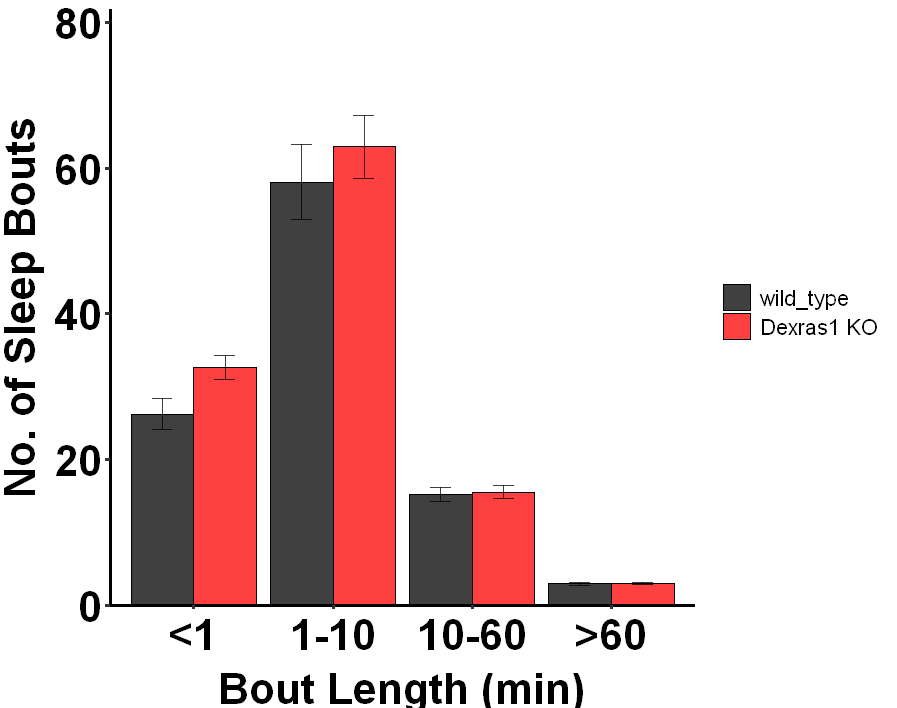

In [18]:
#Split-Plot ANOVA code - both sexes
ezANOVA(Bout_Distribution, dv=.(No_of_Sleep_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Figure for Bout_Distribution - both sexes 
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)       
Sleep_Distribution_Figure(Bout_Distribution, c("wild_type", "Dexras1 KO"))
  ggsave("Plots/Sleep_Bout_Distribution.png",width=19, height=15,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd           F            p p<.05
2                 Animal_Type   1  16   0.2609554 6.164405e-01      
3             Bout_Length_min   3  48 428.6888989 1.222220e-34     *
4 Animal_Type:Bout_Length_min   3  48   0.7963238 5.019905e-01      
          ges
2 0.006792454
3 0.939607425
4 0.028089036

$`Mauchly's Test for Sphericity`
                       Effect         W            p p<.05
3             Bout_Length_min 0.1615277 6.438563e-05     *
4 Animal_Type:Bout_Length_min 0.1615277 6.438563e-05     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05       HFe
3             Bout_Length_min 0.4918444 3.805732e-18         * 0.5297743
4 Animal_Type:Bout_Length_min 0.4918444 4.275262e-01           0.5297743
        p[HF] p[HF]<.05
3 2.21905e-19         *
4 4.35445e-01

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


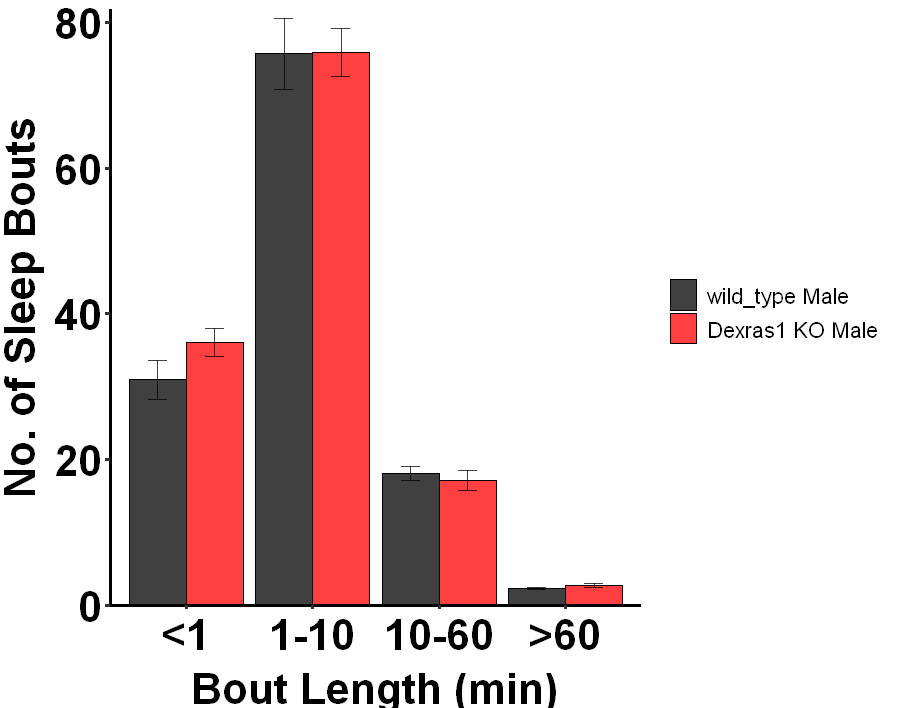

In [19]:
#Split-Plot ANOVA code - Males 
ezANOVA(Bout_Distribution%>%filter(Sex=="Male"), dv=.(No_of_Sleep_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Figure for Bout_Distribution - Males
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)       
Sleep_Distribution_Figure(Bout_Distribution%>%filter(Sex=="Male"),c("wild_type Male", "Dexras1 KO Male"))
  ggsave("Plots/Sleep_Bout_Distribution_M.png",width=19, height=15,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd          F            p p<.05        ges
2                 Animal_Type   1  16   4.028880 6.192763e-02       0.10484169
3             Bout_Length_min   3  48 155.644580 9.923234e-25     * 0.83879153
4 Animal_Type:Bout_Length_min   3  48   2.614329 6.185578e-02       0.08037197

$`Mauchly's Test for Sphericity`
                       Effect          W            p p<.05
3             Bout_Length_min 0.04030362 5.732744e-09     *
4 Animal_Type:Bout_Length_min 0.04030362 5.732744e-09     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05       HFe
3             Bout_Length_min 0.4281405 8.166206e-12         * 0.4493009
4 Animal_Type:Bout_Length_min 0.4281405 1.143794e-01           0.4493009
         p[HF] p[HF]<.05
3 2.702499e-12         *
4 1.119282e-01

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


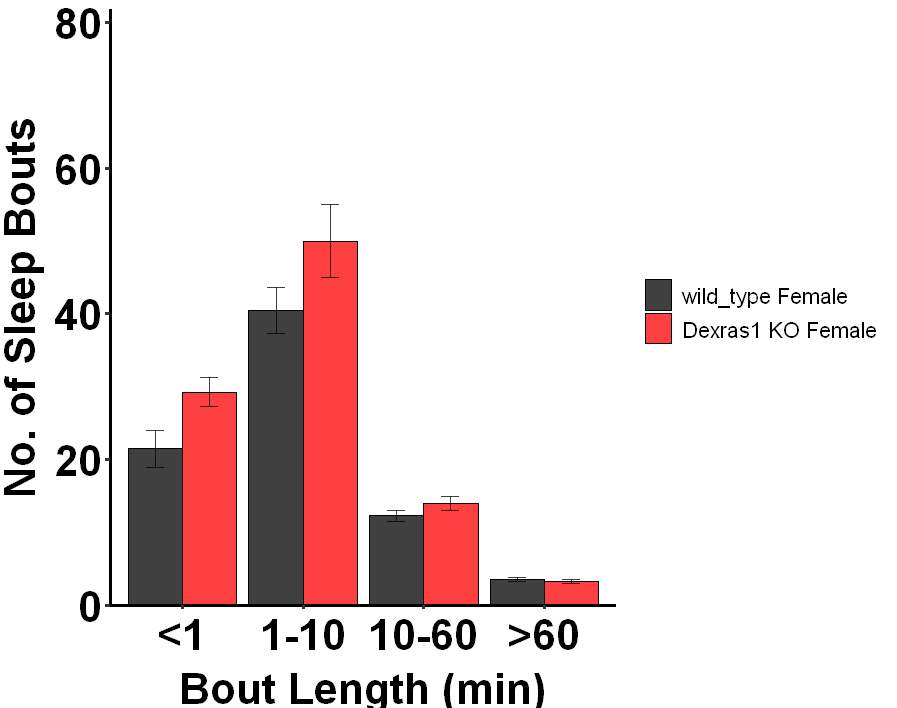

In [20]:
#Split-Plot ANOVA code - Females 
ezANOVA(Bout_Distribution%>%filter(Sex=="Female"), dv=.(No_of_Sleep_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Figure for Bout_Distribution - Females
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)       
Sleep_Distribution_Figure(Bout_Distribution%>%filter(Sex=="Female"),c("wild_type Female", "Dexras1 KO Female"))
  ggsave("Plots/Sleep_Bout_Distribution_F.png",width=19, height=15,units = "cm")

# <center> Baseline Sleep, Number of Bouts, and Length of Bouts Binned Hourly

Apart from the distribution of sleep bouts, we can ask if sleep at the hourly level is different between Dexras1 KO and C57 wild-type mice. To get an idea, we will use the Sleep_Bout_PIR dataframes per animal. We will use PIR1 as an example, and it is shown again below:

In [21]:
head(Sleep_Bout_PIR1)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>
1,C57,Male,1,NA,NA,NA,NA,NA
2,C57,Male,1,NA,NA,NA,NA,NA
3,C57,Male,1,NA,NA,NA,NA,NA
4,C57,Male,1,2022-05-30 15:49:43,3,L,2022-05-30 15:00:00,2022-05-30 15:50:43
5,C57,Male,1,2022-05-30 15:58:23,1,L,2022-05-30 15:00:00,2022-05-30 15:59:03
6,C57,Male,1,2022-05-30 16:13:12,4,L,2022-05-30 16:00:00,2022-05-30 16:16:36


We will filter PIR1 to include only the baseline and post-deprivation dates and times, and name this Sleep_Bout_PIR1_Filtered:

In [22]:
Sleep_Bout_PIR1_Filtered <- Sleep_Bout_PIR1 %>%filter(ymd_hms(Start)>=ymd_hms("2022-06-18T09:00:00") & #start of baseline
                                       ymd_hms(Start)<=ymd_hms("2022-06-28T21:00:00") & #end of post-deprivation
                                       !(ymd_hms(Start)>=ymd_hms("2022-06-25T09:00:00") & #exclude deprivation interval
                                           ymd_hms(Start)<=ymd_hms("2022-06-25T15:00:00")))
head(Sleep_Bout_PIR1_Filtered,8)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>
1,C57,Male,1,2022-06-18 09:03:37,1,L,2022-06-18 09:00:00,2022-06-18 09:04:17
2,C57,Male,1,2022-06-18 09:19:57,2,L,2022-06-18 09:00:00,2022-06-18 09:20:47
3,C57,Male,1,2022-06-18 09:29:16,2,L,2022-06-18 09:00:00,2022-06-18 09:30:06
4,C57,Male,1,2022-06-18 09:41:56,4,L,2022-06-18 09:00:00,2022-06-18 09:43:06
5,C57,Male,1,2022-06-18 09:45:26,6,L,2022-06-18 09:00:00,2022-06-18 09:46:56
6,C57,Male,1,2022-06-18 09:47:56,7,L,2022-06-18 09:00:00,2022-06-18 09:49:36
7,C57,Male,1,2022-06-18 09:50:16,299,L,2022-06-18 09:00:00,2022-06-18 10:40:36
8,C57,Male,1,2022-06-18 10:41:06,422,L,2022-06-18 10:00:00,2022-06-18 11:51:55


Although the hourly analysis is for baseline data, retaining the post-deprivation data will prove helpful when we want to decrease the resolution to six-hour intervals (discussed in next section)

We will convert Duration into bout lengths with units of minutes, so multiply by 10, add 30, and divide by 60, which is in the Bout_Minutes column below. 

In [23]:
head(Sleep_Bout_PIR1_Filtered %>% mutate(Bout_Minutes=((Duration*10)+30)/60),9)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End,Bout_Minutes
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>,<dbl>
1,C57,Male,1,2022-06-18 09:03:37,1,L,2022-06-18 09:00:00,2022-06-18 09:04:17,0.6666667
2,C57,Male,1,2022-06-18 09:19:57,2,L,2022-06-18 09:00:00,2022-06-18 09:20:47,0.8333333
3,C57,Male,1,2022-06-18 09:29:16,2,L,2022-06-18 09:00:00,2022-06-18 09:30:06,0.8333333
4,C57,Male,1,2022-06-18 09:41:56,4,L,2022-06-18 09:00:00,2022-06-18 09:43:06,1.1666667
5,C57,Male,1,2022-06-18 09:45:26,6,L,2022-06-18 09:00:00,2022-06-18 09:46:56,1.5000000
6,C57,Male,1,2022-06-18 09:47:56,7,L,2022-06-18 09:00:00,2022-06-18 09:49:36,1.6666667
7,C57,Male,1,2022-06-18 09:50:16,299,L,2022-06-18 09:00:00,2022-06-18 10:40:36,50.3333333
8,C57,Male,1,2022-06-18 10:41:06,422,L,2022-06-18 10:00:00,2022-06-18 11:51:55,70.8333333
9,C57,Male,1,2022-06-18 11:52:15,92,L,2022-06-18 11:00:00,2022-06-18 12:08:05,15.8333333


If we group_by start_hour and sum Bout_Minutes, we can get an indication of how long the animal was asleep for that hour:

In [24]:
head(Sleep_Bout_PIR1_Filtered%>%group_by(start_hour)%>%summarize(Sum=sum((Duration*10)+30)/60),6)

start_hour,Sum
<chr>,<dbl>
2022-06-18 09:00:00,57.000000
2022-06-18 10:00:00,70.833333
2022-06-18 11:00:00,15.833333
2022-06-18 12:00:00,38.666667
2022-06-18 13:00:00,102.833333
2022-06-18 14:00:00,7.666667


We want a measure of how long the animal was alseep during a given hour. The problem is at 10:00 and 13:00, the animal stayed asleep longer than 60 minutes. This means the animal has had a bout that entered into the next hour (11:00 and 14:00). To allocate time to the appropriate hour, it would be helpful to know when the final bout at 10:00 and 13:00 ended, which we add to a new dataframe called Sleep_Bout_PIR1_Filtered_max:

In [25]:
head(Sleep_Bout_PIR1_Filtered_max <- Sleep_Bout_PIR1_Filtered%>%group_by(start_hour)%>%
    summarise(Sum=sum((Duration*10)+30)/60, max_start=max(Start),max_end=max(End))%>%
#Below code is to modify start_hour, max_end and end_hour into datetimes  
mutate(start_hour=as_datetime(start_hour, tz="America/New_York"),
           end_hour=ymd_hms(format(as.POSIXct(ymd_hms(max_end)), format="%Y-%m-%d %H:00:00"),tz="America/New_York"),
           max_end=ymd_hms(max_end, tz="America/New_York")),18)

start_hour,Sum,max_start,max_end,end_hour
<dttm>,<dbl>,<dttm>,<dttm>,<dttm>
2022-06-18 09:00:00,57.000000,2022-06-18 09:50:16,2022-06-18 10:40:36,2022-06-18 10:00:00
2022-06-18 10:00:00,70.833333,2022-06-18 10:41:06,2022-06-18 11:51:55,2022-06-18 11:00:00
2022-06-18 11:00:00,15.833333,2022-06-18 11:52:15,2022-06-18 12:08:05,2022-06-18 12:00:00
2022-06-18 12:00:00,38.666667,2022-06-18 12:56:44,2022-06-18 12:57:44,2022-06-18 12:00:00
2022-06-18 13:00:00,102.833333,2022-06-18 13:42:54,2022-06-18 14:48:23,2022-06-18 14:00:00
2022-06-18 14:00:00,7.666667,2022-06-18 14:54:53,2022-06-18 14:57:13,2022-06-18 14:00:00
2022-06-18 15:00:00,40.833333,2022-06-18 15:47:53,2022-06-18 16:00:43,2022-06-18 16:00:00
2022-06-18 16:00:00,49.833333,2022-06-18 16:01:53,2022-06-18 16:51:02,2022-06-18 16:00:00
2022-06-18 17:00:00,11.333333,2022-06-18 17:51:12,2022-06-18 17:52:12,2022-06-18 17:00:00


Having this information, we now know that the final bout beginning 9:00 actually ends at 10:40:36. This means 40 minutes 36 seconds need to be subtracted from 9AM, and added to 10AM. Similarly the final bout for 10AM actually ends at 11:51:55, so 51 minutes 55 seconds need to be subtracted from 10AM and added to 11AM. We also run into a problem where not all hours are shown if an animal did not start a bout during a particular hour. For example, 2022-06-19 is missing 00:00:00 and 01:00:00. We will fix this problem first by creating a dataframe, All_Hour, which contains all hours:

In [26]:
All_Hour <- data.frame(start_hour=as_datetime((seq(from=as.POSIXct("2022-06-18 09:00:00"), 
                                                     by=60*60, 
                                                     to=as.POSIXct("2022-06-28 21:00:00"))), tz="America/New_York"))%>%
    filter(!(ymd_hms(start_hour)>=ymd_hms("2022-06-25T09:00:00") & 
               ymd_hms(start_hour)<ymd_hms("2022-06-25T15:00:00")))
head(All_Hour,20)

,start_hour
,<dttm>
1,2022-06-18 09:00:00
2,2022-06-18 10:00:00
3,2022-06-18 11:00:00
4,2022-06-18 12:00:00
5,2022-06-18 13:00:00
6,2022-06-18 14:00:00
7,2022-06-18 15:00:00
8,2022-06-18 16:00:00
9,2022-06-18 17:00:00


We can then left_join our Sleep_Bout_PIR1_Filtered_max to All_Hour, which we will call Merge:

In [27]:
Merge <- left_join(All_Hour,  Sleep_Bout_PIR1_Filtered_max, by="start_hour")
Merge$Sum[is.na(Merge$Sum)]<-0 # to replace missing Sum values with 0
head(Merge, 20)

,start_hour,Sum,max_start,max_end,end_hour
,<dttm>,<dbl>,<dttm>,<dttm>,<dttm>
1,2022-06-18 09:00:00,57.000000,2022-06-18 09:50:16,2022-06-18 10:40:36,2022-06-18 10:00:00
2,2022-06-18 10:00:00,70.833333,2022-06-18 10:41:06,2022-06-18 11:51:55,2022-06-18 11:00:00
3,2022-06-18 11:00:00,15.833333,2022-06-18 11:52:15,2022-06-18 12:08:05,2022-06-18 12:00:00
4,2022-06-18 12:00:00,38.666667,2022-06-18 12:56:44,2022-06-18 12:57:44,2022-06-18 12:00:00
5,2022-06-18 13:00:00,102.833333,2022-06-18 13:42:54,2022-06-18 14:48:23,2022-06-18 14:00:00
6,2022-06-18 14:00:00,7.666667,2022-06-18 14:54:53,2022-06-18 14:57:13,2022-06-18 14:00:00
7,2022-06-18 15:00:00,40.833333,2022-06-18 15:47:53,2022-06-18 16:00:43,2022-06-18 16:00:00
8,2022-06-18 16:00:00,49.833333,2022-06-18 16:01:53,2022-06-18 16:51:02,2022-06-18 16:00:00
9,2022-06-18 17:00:00,11.333333,2022-06-18 17:51:12,2022-06-18 17:52:12,2022-06-18 17:00:00


To correctly allocate hours, we will use information on when the final bout started (max_start) and ended (max_end). 
 - If the difference between max_start and max_end is 1, then we need to add the difference of max_end and end_hour to the next hour ("Sum" column), and subtract this from the current hour.
 - If the difference between max_start and max_end is 2, then the next hour must have a value of 60, and two hours from the current hour we will add the difference of max_end and end_hour, and we need to subtract 60 and the difference of max_end and end_hour for the current hour.

For our purposes, we will correct up to a difference of 5 hours.

Before writing this code, we need to account for when max_end and max_start have NA values, which arises if the animal did not start a bout at a current hour (00:00:00 and 01:00:00 above). The code to correctly allocate hours will depend on a nested-if statement. The conditions of the nested-if statement will be satisifed when the difference between max_start and max_end is greater than or equal to 1. We will explicitly define NA values to be FALSE, to remove any errors that would arise from running the nested-if statement code:

In [28]:
FalseIfNA <- function(x){
    ifelse(is.na(x), FALSE, x)
  }

We will correctly allocate hours to the Hour_Duration vector defined below, which begins identical to the Sum column in Merge and will be appended accordingly:

In [29]:
Hour_Duration <- Merge$Sum

In [30]:
for (i in 1:nrow(Merge)){ # repeat for every row
    
    if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
       as.numeric(format(Merge$max_start[i], format="%H"))==1)){ #if the difference between max_end and max_start is 1
      Hour_Duration[i+1] <- Hour_Duration[i+1]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins")) #then add the difference of max_end and end_hour to the next hour
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))#subtract the difference of max_end and end_hour from the current hour
    } 
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==2)){ #if the difference between max_end and max_start is 2
      Hour_Duration[i+2] <- Hour_Duration[i+2]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins")) #then add the difference of max_end and end_hour to two hours from the current hour
      Hour_Duration[i+1] <- 60 #the next hour will have a value of 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(1)), units="mins"))} #subtract 60 and the difference of max_end and end_hour from the current hour
    
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==3)){ #if the difference between max_end and max_start is 3
      Hour_Duration[i+3] <- Hour_Duration[i+3]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins")) #then add the difference of max_end and end_hour to three hours from the current hour
      Hour_Duration[i+2] <- 60 #two hours from the current hour will have a value of 60
      Hour_Duration[i+1] <- 60 #the next hour will have a value of 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(2)), units="mins"))} #subtract 120 and the difference of max_end and end_hour from the current hour
      
      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==4)){ #if the difference between max_end and max_start is 4
        Hour_Duration[i+4] <- Hour_Duration[i+4]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins")) #then add the difference of max_end and end_hour to four hours from the current hour
        Hour_Duration[i+3] <- 60  #three hours from the current hour will have a value of 60
        Hour_Duration[i+2] <- 60  #two hours from the current hour will have a value of 60
        Hour_Duration[i+1] <- 60  #the next hour will have a value of 60
        Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(3)), units="mins"))} #subtract 180 and the difference of max_end and end_hour from the current hour
    
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==5)){ #if the difference between max_end and max_start is 5
      Hour_Duration[i+5] <- Hour_Duration[i+5]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
      Hour_Duration[i+4] <- 60 #four hours from the current hour will have a value of 60
      Hour_Duration[i+3] <- 60 #three hours from the current hour will have a value of 60
      Hour_Duration[i+2] <- 60 #two hours from the current hour will have a value of 60
      Hour_Duration[i+1] <- 60 #the next hour will have a value of 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(4)), units="mins"))} #subtract 240 and the difference of max_end and end_hour from the current hour
    else(Hour_Duration[i])
    
}
  Hour_Duration[! Hour_Duration %in% c(NA)]

[1] 16.4000000 59.5166667 59.6666667 46.7500000 54.4500000 56.0500000
  [7] 40.1166667 50.5500000 11.3333333 43.3166667 59.8333333 37.6666667
 [13] 19.3500000 19.8500000 15.3166667  0.0000000  0.0000000 30.0333333
 [19] 31.3000000 12.5333333 43.1333333 43.5500000 21.6166667 46.8833333
 [25] 20.8333333 58.6833333 58.3333333 31.6666667 59.3333333 59.7666667
 [31] 30.2500000 59.5000000 40.5833333 39.4166667 51.2500000 21.5833333
 [37] 33.5833333  9.5000000  0.6666667 34.6666667  1.0000000 12.2666667
 [43] 58.1833333 39.8333333 25.3833333 12.4500000 58.3333333 21.2166667
 [49] 38.1333333 59.0000000 59.8333333 48.3333333 60.0000000 45.2000000
 [55] 54.6333333 21.0333333 52.9833333 60.0000000 46.6833333 49.6500000
 [61] 15.6833333  5.3166667 32.0166667  1.3333333  1.3333333 47.8333333
 [67] 21.0000000 42.0000000 20.3333333 28.1666667  8.8500000 57.8333333
 [73] 42.1500000 59.5166667 58.6666667 46.9833333 42.0166667 58.1500000
 [79] 36.0166667 59.8333333 39.6666667 54.8333333 23.1666667 54.9833333
 [85]  4.8333333 26.0000000  2.8333333  0.0000000  3.6666667 13.8666667
 [91] 36.4666667 30.0333333 27.3333333 39.6333333 31.1666667 51.0333333
 [97] 41.8333333 53.1666667 57.8333333 45.8333333 60.0000000 33.8000000
[103] 44.3666667 58.8333333 46.3000000 45.5333333 43.6666667 57.5000000
[109]  5.8000000 33.0000000  1.0000000  0.0000000  0.0000000 39.8500000
[115] 56.3166667 37.0166667 31.0000000 54.1666667 31.1500000  0.0000000
[121] 24.1666667 55.8166667 58.6666667 60.0000000 49.6833333 45.9833333
[127] 59.6666667 54.3333333 36.3333333 59.6666667 44.8500000 40.1500000
[133] 32.8500000 36.5000000  0.0000000  2.0000000  6.6333333 57.0000000
[139] 22.1666667 38.8333333 38.5333333 18.1333333 59.1666667 25.0333333
[145] 41.6333333 59.8333333 56.8666667 41.2833333 51.8333333 57.8833333
[151] 30.4500000 53.0500000 12.8333333 52.9500000 57.3833333 55.7833333
[157] 22.3833333  0.0000000 12.1666667  1.5000000 29.4333333 44.7333333
[163]  0.0000000 45.1000000 46.2333333 40.7500000  3.7500000 50.6666667
[169] 46.1000000 46.0666667 50.9333333 50.3333333 44.0000000 59.6666667
[175] 17.0666667  9.6666667 52.5000000 26.5833333 56.6666667 29.5833333
[181] 10.2500000 57.0000000 59.3333333 42.4166667 29.5833333 51.0000000
[187] 20.6500000 60.0000000 48.5000000 60.0000000 41.9333333 58.7333333
[193] 50.6666667 54.1000000 10.8333333 59.7333333 28.4333333 50.8833333
[199] 23.0000000 25.1166667  2.0000000 12.1666667 57.8833333 46.8333333
[205] 26.1166667 14.2166667 58.5000000 59.6500000 28.6333333 35.8333333
[211] 35.7000000 58.5000000 59.1666667 50.1666667 57.8333333 48.1500000
[217] 60.0000000 22.3166667 55.8500000 49.1666667 54.6500000 48.8500000
[223] 23.1500000  4.3333333  0.8333333  2.3333333 46.8333333 59.6666667
[229] 30.3333333 27.0000000 59.3333333 51.1666667 33.5000000 58.5000000
[235] 36.9833333 59.5000000 57.1666667 50.0166667 31.4833333 58.6666667
[241] 56.1833333 36.1333333 59.0000000 43.8166667 53.5000000  9.2166667
[247]  0.0000000

Thus, at 9:00:00, the correct value of sleep should be 16.4 minutes, and at 10:00:00, 59.51 minutes.

We can create a function that carries out the same steps to determine sleep duration per hour, requiring only the Sleep_Bout_PIR to be specified. This function, Sum_Duration, will be used when we define a dataframe that contains hourly sleep duration for all animals:

In [31]:
  Sum_Duration <- function(PIR){
  PIRQ <- PIR %>% filter(ymd_hms(Start)>=ymd_hms("2022-06-18T09:00:00") & 
                                       ymd_hms(Start)<=ymd_hms("2022-06-28T21:00:00") &
                                       !(ymd_hms(Start)>=ymd_hms("2022-06-25T09:00:00") & 
                                           ymd_hms(Start)<=ymd_hms("2022-06-25T15:00:00")))%>%
    group_by(start_hour)%>%
    summarise(Sum=sum((Duration*10)+30)/60, max_start=max(Start),max_end=max(End))%>%
    mutate(start_hour=as_datetime(start_hour, tz="America/New_York"),
           end_hour=ymd_hms(format(as.POSIXct(ymd_hms(max_end)), format="%Y-%m-%d %H:00:00"),tz="America/New_York"),
           max_end=ymd_hms(max_end, tz="America/New_York"))
  
  All_Hour <- data.frame(start_hour=as_datetime((seq(from=as.POSIXct("2022-06-18 09:00:00"), 
                                                     by=60*60, 
                                                     to=as.POSIXct("2022-06-28 21:00:00"))), tz="America/New_York"))%>%
    filter(!(ymd_hms(start_hour)>=ymd_hms("2022-06-25T09:00:00") & 
               ymd_hms(start_hour)<ymd_hms("2022-06-25T15:00:00")))
  
  Merge <- left_join(All_Hour,  PIRQ, by="start_hour")
  Merge$Sum[is.na(Merge$Sum)]<-0
  
  Hour_Duration <- Merge$Sum
  FalseIfNA <- function(x){
    ifelse(is.na(x), FALSE, x)
  }

  for (i in 1:nrow(Merge)){
    
    if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
       as.numeric(format(Merge$max_start[i], format="%H"))==1)){
      Hour_Duration[i+1] <- Hour_Duration[i+1]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
    } 
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==2)){
      Hour_Duration[i+2] <- Hour_Duration[i+2]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
      Hour_Duration[i+1] <- 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(1)), units="mins"))}
    
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==3)){
      Hour_Duration[i+3] <- Hour_Duration[i+3]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
      Hour_Duration[i+2] <- 60
      Hour_Duration[i+1] <- 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(2)), units="mins"))}
      
      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==4)){
        Hour_Duration[i+4] <- Hour_Duration[i+4]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
        Hour_Duration[i+3] <- 60
        Hour_Duration[i+2] <- 60
        Hour_Duration[i+1] <- 60
        Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(3)), units="mins"))}
    
    else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                      as.numeric(format(Merge$max_start[i], format="%H"))==5)){
      Hour_Duration[i+5] <- Hour_Duration[i+5]+(difftime(Merge$max_end[i],Merge$end_hour[i], units="mins"))
      Hour_Duration[i+4] <- 60
      Hour_Duration[i+3] <- 60
      Hour_Duration[i+2] <- 60
      Hour_Duration[i+1] <- 60
      Hour_Duration[i] <- Hour_Duration[i]-(difftime(Merge$max_end[i],(Merge$end_hour[i]-dhours(4)), units="mins"))}
    else(Hour_Duration[i])
    
}
  Hour_Duration[! Hour_Duration %in% c(NA)]
  }

In addition to total sleep per hour, it would be helpful to know if the number of sleep bouts differs between Dexras1 KO and C57 wild-type mice.  We will define the number of bouts in an hour by the number of bouts starting in that hour, or continuing into that hour. So, for the filtered PIR1 shown below, 
 - there are seven bouts starting at 9:00:00, 
 - two bouts at 10:00:00 (one that starts at 10:00:00 and one that that continues from 09:00:00), 
 - two bouts at 11:00:00 (one that starts at 11:00:00 and one that continues from 10:00:00)
 - five bouts at 12:00:00 (four that start at 12:00:00 and one that continues from 11:00:00)
 - six bouts at 13:00:00 (six that start at 13:00:00 and zero that continue from 12:00:00)

In [32]:
head(Sleep_Bout_PIR1_Filtered,20)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>
1,C57,Male,1,2022-06-18 09:03:37,1,L,2022-06-18 09:00:00,2022-06-18 09:04:17
2,C57,Male,1,2022-06-18 09:19:57,2,L,2022-06-18 09:00:00,2022-06-18 09:20:47
3,C57,Male,1,2022-06-18 09:29:16,2,L,2022-06-18 09:00:00,2022-06-18 09:30:06
4,C57,Male,1,2022-06-18 09:41:56,4,L,2022-06-18 09:00:00,2022-06-18 09:43:06
5,C57,Male,1,2022-06-18 09:45:26,6,L,2022-06-18 09:00:00,2022-06-18 09:46:56
6,C57,Male,1,2022-06-18 09:47:56,7,L,2022-06-18 09:00:00,2022-06-18 09:49:36
7,C57,Male,1,2022-06-18 09:50:16,299,L,2022-06-18 09:00:00,2022-06-18 10:40:36
8,C57,Male,1,2022-06-18 10:41:06,422,L,2022-06-18 10:00:00,2022-06-18 11:51:55
9,C57,Male,1,2022-06-18 11:52:15,92,L,2022-06-18 11:00:00,2022-06-18 12:08:05


To determine whether there is a difference in number of sleep bouts, we can follow a similar method to determining total sleep per hour. In this case, we will group_by start_hour and count the number of bouts (number_bouts=n()) below. 
Also:
 - If a bout falls within two hours, that is the difference between max_end and max_start is 1, we will count the bout in both hours
 - If the difference between max_end and max_start is 2, we will count the bout in all three hours
 
 For our purposes, we will limit this calculation to a difference between max_end and max_start of 5 hours. We will place this information into the function: One_Hour_Number_Bouts below:

In [33]:
One_Hour_Number_Bouts<- function(PIR){
    PIRQ <- PIR %>% filter(ymd_hms(Start)>=ymd_hms("2022-06-18T09:00:00") & 
                             ymd_hms(Start)<=ymd_hms("2022-06-28T21:00:00") &
                             !(ymd_hms(start_hour)>=ymd_hms("2022-06-25T09:00:00") & 
                                 ymd_hms(start_hour)<ymd_hms("2022-06-25T15:00:00")))%>%
      group_by(start_hour)%>%
            summarise(Sum=sum((Duration*10)+30)/60,number_bouts=n(), max_start=max(Start),max_end=max(End))%>% #count number of bouts
      mutate(start_hour=as_datetime(start_hour, tz="America/New_York"),
        max_start=ymd_hms(max_start, tz="America/New_York"),
             max_end=ymd_hms(max_end, tz="America/New_York"))
    
    All_Hour <- data.frame(start_hour=as_datetime((seq(from=as.POSIXct("2022-06-18 09:00:00"), 
                                                       by=60*60, 
                                                       to=as.POSIXct("2022-06-28 21:00:00"))), tz="America/New_York"))%>%
      filter(!(ymd_hms(start_hour)>=ymd_hms("2022-06-25T09:00:00") & 
                 ymd_hms(start_hour)<ymd_hms("2022-06-25T15:00:00")))
    
    Merge <- left_join(All_Hour,  PIRQ, by="start_hour")
    Merge$number_bouts[is.na(Merge$number_bouts)]<-0
    NumberBouts <- Merge$number_bouts
    
    FalseIfNA <- function(x){
      ifelse(is.na(x), FALSE, x)
    }
    
    for (i in 1:nrow(Merge)){
      
      if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                   as.numeric(format(Merge$max_start[i], format="%H"))==1)){ #if the difference between max_end and max_start is 1
        NumberBouts[i+1] <- NumberBouts[i+1]+1 # add one to the next hour
      } 
      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==2)){ #if the difference between max_end and max_start is 2
        NumberBouts[i+2] <- NumberBouts[i+2]+1 # add one to two hours from the current hour
        NumberBouts[i+1] <- NumberBouts[i+1]+1 # add one to the next hour
      }

      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==3)){ #if the difference between max_end and max_start is 3
        NumberBouts[i+3] <- NumberBouts[i+3]+1 # add one to three hours from the current hour
        NumberBouts[i+2] <- NumberBouts[i+2]+1 # add one to two hours from the current hour
        NumberBouts[i+1] <- NumberBouts[i+1]+1 # add one to the next hour
      }

      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==4)){ #if the difference between max_end and max_start is 4
        NumberBouts[i+4] <- NumberBouts[i+4]+1 # add one to four hours from the current hour
        NumberBouts[i+3] <- NumberBouts[i+3]+1 # add one to three hours from the current hour
        NumberBouts[i+2] <- NumberBouts[i+2]+1 # add one to two hours from the current hour
        NumberBouts[i+1] <- NumberBouts[i+1]+1 # add one to the next hour
}
      else if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                        as.numeric(format(Merge$max_start[i], format="%H"))==5)){ #if the difference between max_end and max_start is 5
        NumberBouts[i+5] <- NumberBouts[i+5]+1 # add one to five hours from the current hour
        NumberBouts[i+4] <- NumberBouts[i+4]+1 # add one to four hours from the current hour
        NumberBouts[i+3] <- NumberBouts[i+3]+1 # add one to three hours from the current hour
        NumberBouts[i+2] <- NumberBouts[i+2]+1 # add one to two hours from the current hour
        NumberBouts[i+1] <- NumberBouts[i+1]+1 # add one to the next hour
      }
      else(NumberBouts[i])
    
    }
    NumberBouts
    NumberBouts[! NumberBouts %in% c(NA)]
    
  }

Running this code on Sleep_Bout_PIR1 confirms the number of bouts per hour from 09:00:00 are 7,2,2,5,6:

In [34]:
One_Hour_Number_Bouts(Sleep_Bout_PIR1)

[1]  7  2  2  5  6  4  4  3  7  3  2  6  4  6  3  0  0  7  7  7  3  5  7  8  4
 [26]  3  3  9  3  1  9  3  6  7  7  8  5  3  1  9  1  4  5 12  6  7  6  9  3  2
 [51]  2  3  1  4  5  6  5  1  4  3  3  4  6  1  2  7  8  8  4  8  3  4  5  2  5
 [76]  2  3  3  9  2  7  4  8  3  4  6  2  0  3  5  3  4  6  9  6  3  5  7  3  8
[101]  1  6  6  3  3  3  3  4  4 10  1  0  0  3  2  4  6  6  2  0  4  4  3  1  6
[126]  4  2  4  4  2  3  5  7  9  0  1  5  3  8  8  9  2  3  7  3  2  3  8  8  6
[151]  7  8  9  4  4  5  7  0  5  2  7  7  0  5  5  4  4  3  6  9  4  9  7  2  9
[176] 10  4  1  4  8  3  5  3  8  9  8  8  1  8  1  9  3  8  6  6  2  9  3 11  3
[201]  2  7  4  7 11  5  3  3 12  7  6  3  3  5  4  5  1 12  3  7  6 11  6  5  1
[226]  2  5  3  7  3  2  5  9  5  8  3  4  7  9  3  4 10  4 11  5 10  0

Using the functions of Sum_Duration and One_Hour_Number_Bouts, we can create a dataframe that contains total hourly sleep and number of sleep bouts, that we will call All_Hour for all 36 animals:

In [35]:
All_Hour <- data.frame(mid_hour=ymd_hms((seq(from=as.POSIXct("2022-06-18 09:30:00"), 
                                                     by=60*60, 
                                                     to=as.POSIXct("2022-06-28 21:30:00")))))%>%
    filter(!(ymd_hms(mid_hour)>=ymd_hms("2022-06-25T09:30:00") & 
               ymd_hms(mid_hour)<ymd_hms("2022-06-25T15:30:00")))%>%
    mutate(LightDark=ifelse(hms(format(mid_hour, format="%H:%M:%S"))>=hms("09:30:00")&
                               hms(format(mid_hour, format="%H:%M:%S"))<hms("21:30:00"),"L","D"),
                  C57_Male_1_Sleep=Sum_Duration(Sleep_Bout_PIR1),
                  C57_Male_1_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR1),
                  Dexras1KO_Male_1_Sleep=Sum_Duration(Sleep_Bout_PIR2),
                  Dexras1KO_Male_1_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR2),
                  C57_Male_2_Sleep=Sum_Duration(Sleep_Bout_PIR3),
                  C57_Male_2_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR3),
                  Dexras1KO_Male_2_Sleep=Sum_Duration(Sleep_Bout_PIR4),
                  Dexras1KO_Male_2_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR4),
                  C57_Male_3_Sleep=Sum_Duration(Sleep_Bout_PIR5),
                  C57_Male_3_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR5),
                  Dexras1KO_Male_3_Sleep=Sum_Duration(Sleep_Bout_PIR6),
                  Dexras1KO_Male_3_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR6),
                  
                  C57_Male_4_Sleep=Sum_Duration(Sleep_Bout_PIR7),
                  C57_Male_4_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR7),
                  Dexras1KO_Male_4_Sleep=Sum_Duration(Sleep_Bout_PIR8),
                  Dexras1KO_Male_4_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR8),
                  C57_Male_5_Sleep=Sum_Duration(Sleep_Bout_PIR9),
                  C57_Male_5_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR9),
                  Dexras1KO_Male_5_Sleep=Sum_Duration(Sleep_Bout_PIR10),
                  Dexras1KO_Male_5_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR10),
                  C57_Male_6_Sleep=Sum_Duration(Sleep_Bout_PIR11),
                  C57_Male_6_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR11),
                  Dexras1KO_Male_6_Sleep=Sum_Duration(Sleep_Bout_PIR12),
                  Dexras1KO_Male_6_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR12),
           
                  C57_Female_1_Sleep=Sum_Duration(Sleep_Bout_PIR13),
                  C57_Female_1_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR13),
                  Dexras1KO_Female_1_Sleep=Sum_Duration(Sleep_Bout_PIR14),
                  Dexras1KO_Female_1_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR14),
                  C57_Female_2_Sleep=Sum_Duration(Sleep_Bout_PIR15),
                  C57_Female_2_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR15),
                  Dexras1KO_Female_2_Sleep=Sum_Duration(Sleep_Bout_PIR16),
                  Dexras1KO_Female_2_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR16),
                  C57_Female_3_Sleep=Sum_Duration(Sleep_Bout_PIR17),
                  C57_Female_3_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR17),
                  Dexras1KO_Female_3_Sleep=Sum_Duration(Sleep_Bout_PIR18),
                  Dexras1KO_Female_3_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR18),
          
                  C57_Female_4_Sleep=Sum_Duration(Sleep_Bout_PIR19),
                   C57_Female_4_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR19),
                  Dexras1KO_Female_4_Sleep=Sum_Duration(Sleep_Bout_PIR20),
                  Dexras1KO_Female_4_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR20),
                  C57_Female_5_Sleep=Sum_Duration(Sleep_Bout_PIR21),
                  C57_Female_5_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR21),
                  Dexras1KO_Female_5_Sleep=Sum_Duration(Sleep_Bout_PIR22),
                  Dexras1KO_Female_5_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR22),
                  C57_Female_6_Sleep=Sum_Duration(Sleep_Bout_PIR23),
                  C57_Female_6_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR23),
                  Dexras1KO_Female_6_Sleep=Sum_Duration(Sleep_Bout_PIR24),
                  Dexras1KO_Female_6_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR24),
           
                 C57_Male_7_Sleep=Sum_Duration(Sleep_Bout_PIR25),
                 C57_Male_7_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR25),
                 Dexras1KO_Male_7_Sleep=Sum_Duration(Sleep_Bout_PIR26),
                 Dexras1KO_Male_7_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR26),
                 C57_Male_8_Sleep=Sum_Duration(Sleep_Bout_PIR27),
                 C57_Male_8_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR27),
                 Dexras1KO_Male_8_Sleep=Sum_Duration(Sleep_Bout_PIR28),
                 Dexras1KO_Male_8_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR28),
                 C57_Male_9_Sleep=Sum_Duration(Sleep_Bout_PIR29),
                 C57_Male_9_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR29),
                 Dexras1KO_Male_9_Sleep=Sum_Duration(Sleep_Bout_PIR30),
                 Dexras1KO_Male_9_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR30),
           
           C57_Female_7_Sleep=Sum_Duration(Sleep_Bout_PIR31),
           C57_Female_7_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR31),
           Dexras1KO_Female_7_Sleep=Sum_Duration(Sleep_Bout_PIR32),
           Dexras1KO_Female_7_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR32),
           C57_Female_8_Sleep=Sum_Duration(Sleep_Bout_PIR33),
           C57_Female_8_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR33),
           Dexras1KO_Female_8_Sleep=Sum_Duration(Sleep_Bout_PIR34),
           Dexras1KO_Female_8_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR34),
           C57_Female_9_Sleep=Sum_Duration(Sleep_Bout_PIR35),
           C57_Female_9_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR35),
           Dexras1KO_Female_9_Sleep=Sum_Duration(Sleep_Bout_PIR36),
           Dexras1KO_Female_9_Bouts=One_Hour_Number_Bouts(Sleep_Bout_PIR36))%>%
    add_row(mid_hour=ymd_hms("2022-06-25T09:30:00"), LightDark="L")%>% #Adding hour for deprivation
    add_row(mid_hour=ymd_hms("2022-06-25T10:30:00"), LightDark="L")%>% #Adding hour for deprivation
    add_row(mid_hour=ymd_hms("2022-06-25T11:30:00"), LightDark="L")%>% #Adding hour for deprivation
    add_row(mid_hour=ymd_hms("2022-06-25T12:30:00"), LightDark="L")%>% #Adding hour for deprivation
    add_row(mid_hour=ymd_hms("2022-06-25T13:30:00"), LightDark="L")%>% #Adding hour for deprivation
    add_row(mid_hour=ymd_hms("2022-06-25T14:30:00"), LightDark="L")%>% #Adding hour for deprivation
  replace(is.na(.), 0)%>%#replace NA values from deptivation with 0, since animals are not asleep and have no bouts during sleep deprivation
    arrange(mid_hour) 
  head(All_Hour)

,mid_hour,LightDark,C57_Male_1_Sleep,C57_Male_1_Bouts,Dexras1KO_Male_1_Sleep,Dexras1KO_Male_1_Bouts,C57_Male_2_Sleep,C57_Male_2_Bouts,Dexras1KO_Male_2_Sleep,Dexras1KO_Male_2_Bouts,...,Dexras1KO_Female_7_Sleep,Dexras1KO_Female_7_Bouts,C57_Female_8_Sleep,C57_Female_8_Bouts,Dexras1KO_Female_8_Sleep,Dexras1KO_Female_8_Bouts,C57_Female_9_Sleep,C57_Female_9_Bouts,Dexras1KO_Female_9_Sleep,Dexras1KO_Female_9_Bouts
,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-06-18 09:30:00,L,16.40000,7,22.73333,4,32.56667,6,39.40000,5,...,19.33333,3,11.1666667,6,28.73333,5,29.21667,4,12.35000,4
2,2022-06-18 10:30:00,L,59.51667,2,58.68333,6,59.85000,2,50.35000,2,...,59.66667,1,0.3666667,1,59.30000,4,59.80000,2,60.00000,1
3,2022-06-18 11:30:00,L,59.66667,2,56.83333,3,59.50000,2,56.25000,1,...,57.43333,7,41.1333333,2,58.06667,6,43.31667,8,55.35000,4
4,2022-06-18 12:30:00,L,46.75000,5,42.25000,4,59.68333,3,59.93333,2,...,60.00000,1,47.8333333,12,59.33333,2,46.91667,2,60.00000,1
5,2022-06-18 13:30:00,L,54.45000,6,54.76667,5,23.83333,9,57.50000,3,...,46.70000,6,57.3666667,6,50.58333,4,59.76667,2,60.00000,1
6,2022-06-18 14:30:00,L,56.05000,4,59.85000,2,59.68333,3,59.85000,2,...,58.15000,2,59.7333333,2,46.91667,8,31.38333,10,40.83333,5


We will filter for baseline dates and times and pivot this data to make 24-hour summary figures and for statistics. We will also define the length of a bout by dividing total hourly sleep by number of bouts (hourly)

In [36]:
 All_Hour_Baseline_Stats <- All_Hour %>%filter(ymd_hms(mid_hour)>=ymd_hms("2022-06-18T09:30:00")&
                                                  ymd_hms(mid_hour)<=ymd_hms("2022-06-25T08:30:00"))%>%
    pivot_longer(cols=c(3:74), names_to="Animal", values_to="Variable_Name")%>%
    separate(col="Animal", into=c("Animal", "Variable"), sep="_(?=[^_]+$)")%>%
    mutate(Animal_ID=Animal,start_hour=hour(ymd_hms(mid_hour)-hours(9)-minutes(30)))%>%
    separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep = "_")%>%
    pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
    mutate(LengthBouts=replace_na(Sleep/Bouts,0))%>%distinct()
head(All_Hour_Baseline_Stats)

mid_hour,LightDark,Animal_Type,Sex,Number,Animal_ID,start_hour,Sleep,Bouts,LengthBouts
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2022-06-18 09:30:00,L,C57,Male,1,C57_Male_1,0,16.40000,7,2.342857
2022-06-18 09:30:00,L,Dexras1KO,Male,1,Dexras1KO_Male_1,0,22.73333,4,5.683333
2022-06-18 09:30:00,L,C57,Male,2,C57_Male_2,0,32.56667,6,5.427778
2022-06-18 09:30:00,L,Dexras1KO,Male,2,Dexras1KO_Male_2,0,39.40000,5,7.880000
2022-06-18 09:30:00,L,C57,Male,3,C57_Male_3,0,12.06667,5,2.413333
2022-06-18 09:30:00,L,Dexras1KO,Male,3,Dexras1KO_Male_3,0,15.40000,2,7.700000


## <center> Baseline Total Hourly Sleep Plotted

We will create a graphing function to make plotting sexes easier:

In [37]:
  All_Hour_Baseline_Sleep_Figure <- function(Data, label1){
    Data %>%group_by(hour=start_hour, Animal_Type)%>% # for an average of the animal over the 7 days of baseline recording
      summarize(mean=mean(Sleep)/60, sd=std.error(Sleep)/60)%>% # divide by 60 for proportion of the hour
      ggplot(aes(x=hour, y=mean))+
      coord_cartesian(xlim = c(0, 23), clip = "off")+
      annotate("rect", xmin=12, xmax=24, ymin=-Inf, ymax=Inf, fill="#ECECEC")+
      labs(x="ZT", y="Sleep (proportion of hour)")+
      geom_line(size=1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type), size=3)+
      scale_y_continuous(breaks=c(0,.1,.2,.3,.4,.5,.6,.7,.8,.9, 1),expand=expansion(mult=c(0,0.01)),limits = c(0,1))+
      geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type),width=.2)+
      theme_bw()+
      theme(legend.text=element_text(size=15),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=+1.8),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(),
            legend.position="none")+
      scale_x_continuous(breaks=c(0,4,8,12,16,20))+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)
  }

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


$ANOVA
                  Effect DFn DFd           F            p p<.05         ges
2            Animal_Type   1  34   0.8321019 3.680884e-01       0.004324847
3             start_hour  23 782 207.8642650 0.000000e+00     * 0.834123688
4 Animal_Type:start_hour  23 782   4.1760650 3.545630e-10     * 0.091756301

$`Mauchly's Test for Sphericity`
                  Effect            W            p p<.05
3             start_hour 4.283474e-12 1.285304e-35     *
4 Animal_Type:start_hour 4.283474e-12 1.285304e-35     *

$`Sphericity Corrections`
                  Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_hour 0.2596615 1.153803e-83         * 0.3211526
4 Animal_Type:start_hour 0.2596615 5.672520e-04         * 0.3211526
          p[HF] p[HF]<.05
3 7.578434e-103         *
4  1.673567e-04         *

`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Sleep,C57,Dexras1KO,18,18,-1.46722143,34,0.152000,0.3643636
2,1,Sleep,C57,Dexras1KO,18,18,-3.02281306,34,0.004740,0.0284400
3,2,Sleep,C57,Dexras1KO,18,18,-1.02176342,34,0.314000,0.4432941
4,3,Sleep,C57,Dexras1KO,18,18,-0.97301662,34,0.337000,0.4493333
5,4,Sleep,C57,Dexras1KO,18,18,-3.57931795,34,0.001060,0.0123200
6,5,Sleep,C57,Dexras1KO,18,18,-1.99125625,34,0.054500,0.1868571
7,6,Sleep,C57,Dexras1KO,18,18,-2.32237280,34,0.026300,0.1262400
8,7,Sleep,C57,Dexras1KO,18,18,0.20586682,34,0.838000,0.9588571
9,8,Sleep,C57,Dexras1KO,18,18,-1.11375329,34,0.273000,0.4290000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


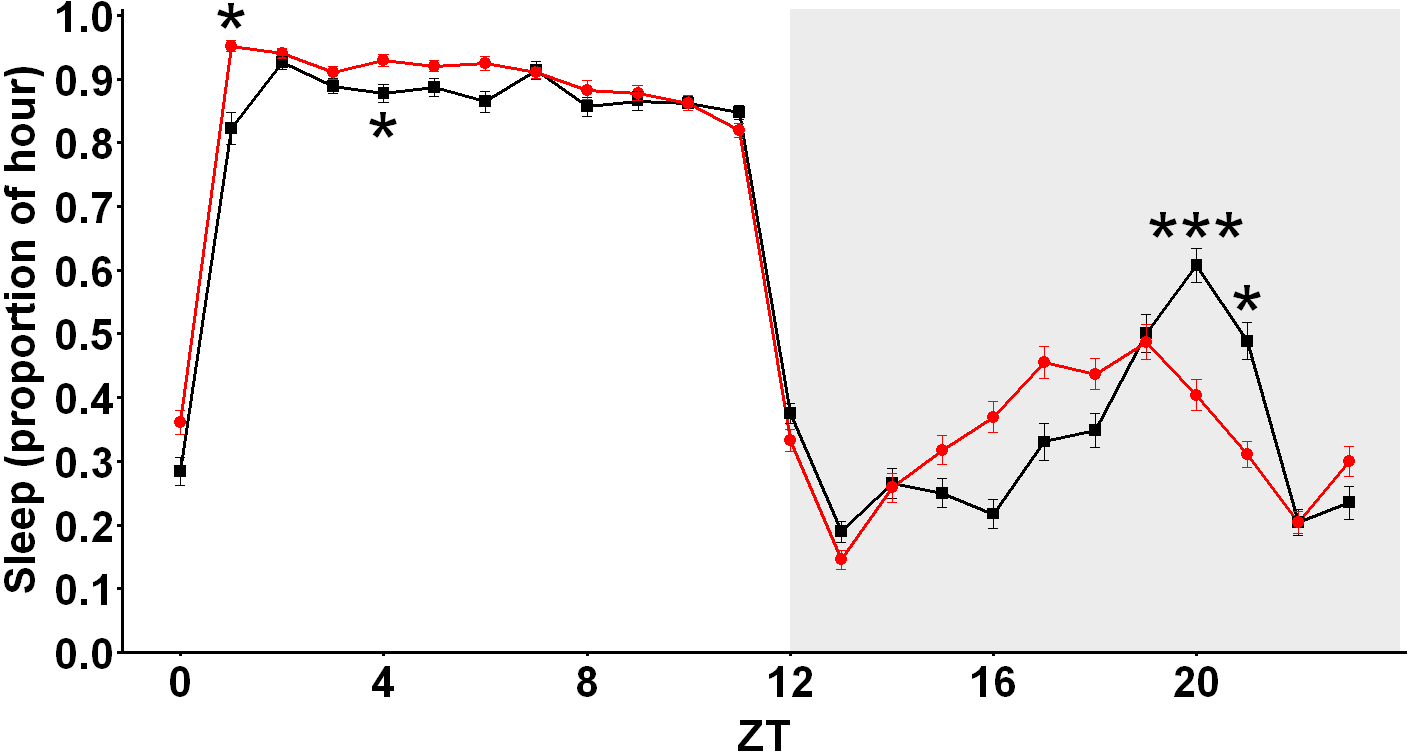

In [38]:
#Split-Plot ANOVA - baseline total sleep hourly - both sexes
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour)), dv=.(Sleep), wid=.(Animal_ID), within=.(start_hour), between=.(Animal_Type))
#post-hoc t-tests - baseline total sleep hourly - both sexes  
p_adjust_all_hour_sleep_proportion <- All_Hour_Baseline_Stats%>%group_by(start_hour, Animal_ID)%>%
    summarize(Sleep=mean(Sleep), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Sleep~Animal_Type, var.equal = TRUE) %>%
      adjust_pvalue(method = "BH")
p_adjust_all_hour_sleep_proportion

#Plot - baseline total sleep hourly - both sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
All_Hour_Baseline_Sleep_Figure(All_Hour_Baseline_Stats, c("wild_type","Dexras1 KO"))+
    annotate("text",x=20, y=.645, label="***", angle=0, size=18)+
    annotate("text",x=21, y=.53, label="*", angle=0, size=18)+
    annotate("text",x=4, y=.802, label="*", angle=0, size=18)+
    annotate("text",x=1, y=.973, label="*", angle=0, size=18)
  ggsave("Plots/BASELINE_Sleep_One_Hour_Line_Plot.png",width=30, height=16,units = "cm")
  

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,0.2968515,5.933767e-01,,0.002482143
2,start_hour,23,368,106.7704753,2.379885e-147,*,0.852467441
3,Animal_Type:start_hour,23,368,1.6694927,2.843513e-02,*,0.082862448


`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Sleep,C57,Dexras1KO,9,9,-0.8875921,16,0.3880,0.7760000
2,1,Sleep,C57,Dexras1KO,9,9,-2.3035906,16,0.0350,0.1718400
3,2,Sleep,C57,Dexras1KO,9,9,0.1089162,16,0.9150,0.9547826
4,3,Sleep,C57,Dexras1KO,9,9,-1.2533021,16,0.2280,0.6080000
5,4,Sleep,C57,Dexras1KO,9,9,-2.8393629,16,0.0118,0.1696000
6,5,Sleep,C57,Dexras1KO,9,9,-0.7045891,16,0.4910,0.7856000
7,6,Sleep,C57,Dexras1KO,9,9,-2.5543161,16,0.0212,0.1696000
8,7,Sleep,C57,Dexras1KO,9,9,-0.7872155,16,0.4430,0.7856000
9,8,Sleep,C57,Dexras1KO,9,9,-1.2805644,16,0.2190,0.6080000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


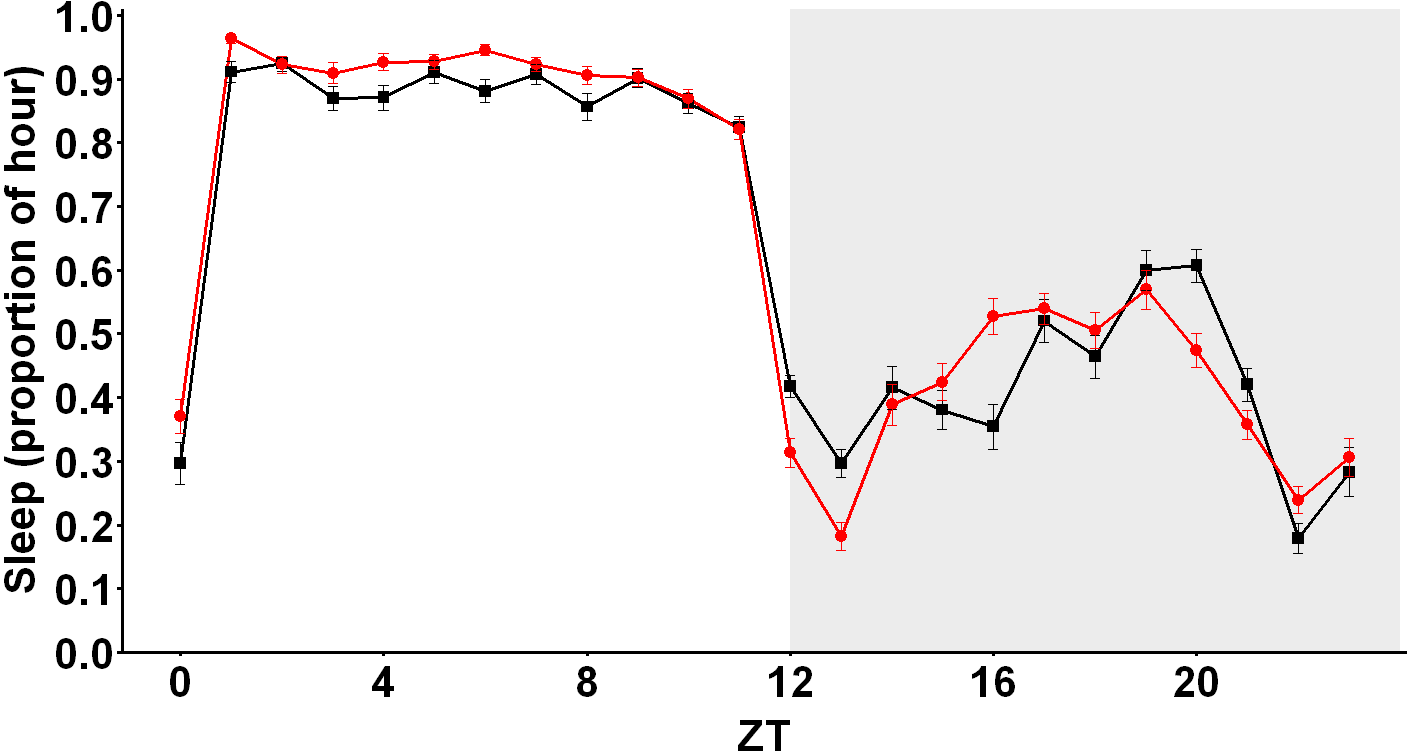

In [39]:
#Split-Plot ANOVA - baseline total sleep hourly - males
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Male"), dv=.(Sleep), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
#post-hoc t-tests - baseline total sleep hourly - males
p_adjust_all_hour_sleep_proportion_male <- All_Hour_Baseline_Stats%>%filter(Sex=="Male")%>%group_by(start_hour, Animal_ID)%>%
    summarize(Sleep=mean(Sleep), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Sleep~Animal_Type, var.equal=TRUE)%>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_sleep_proportion_male
#Plot - baseline total sleep hourly - males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_Sleep_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Male"), c("wild_type Male","Dexras1 KO Male"))
  ggsave("Plots/BASELINE_Sleep_One_Hour_Line_Plot_M.png",width=30, height=16,units = "cm")
  

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,2.346452,1.451006e-01,,0.01165335
2,start_hour,23,368,159.191950,1.452233e-175,*,0.90147365
3,Animal_Type:start_hour,23,368,5.321519,4.473425e-13,*,0.23421801


`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Sleep,C57,Dexras1KO,9,9,-1.16400066,16,2.61e-01,0.4176000
2,1,Sleep,C57,Dexras1KO,9,9,-2.84251655,16,1.18e-02,0.0768000
3,2,Sleep,C57,Dexras1KO,9,9,-1.34699934,16,1.97e-01,0.3960000
4,3,Sleep,C57,Dexras1KO,9,9,-0.05608694,16,9.56e-01,0.9680000
5,4,Sleep,C57,Dexras1KO,9,9,-2.15431624,16,4.68e-02,0.1604571
6,5,Sleep,C57,Dexras1KO,9,9,-2.30109352,16,3.52e-02,0.1408000
7,6,Sleep,C57,Dexras1KO,9,9,-1.24766154,16,2.30e-01,0.4176000
8,7,Sleep,C57,Dexras1KO,9,9,0.81374058,16,4.28e-01,0.6420000
9,8,Sleep,C57,Dexras1KO,9,9,-0.09731823,16,9.24e-01,0.9680000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


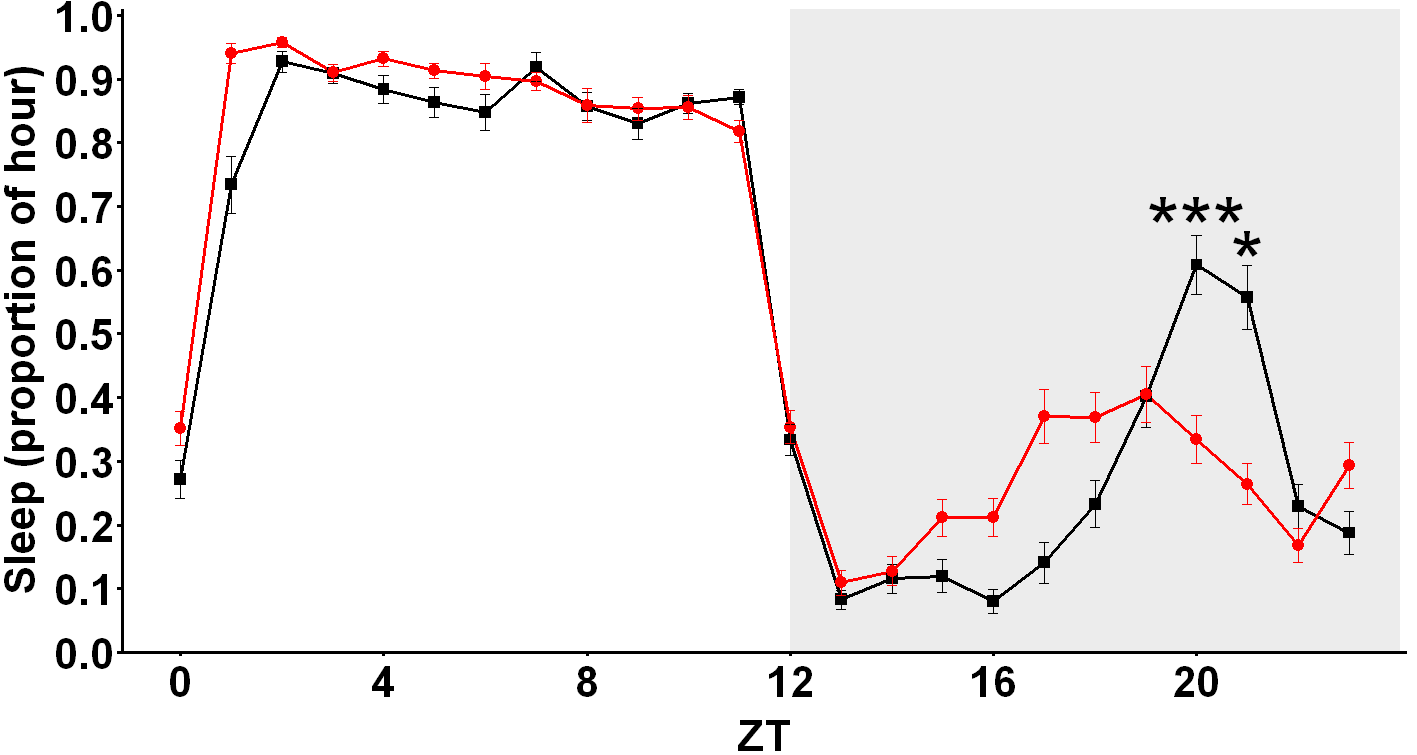

In [40]:
#Split-Plot ANOVA - baseline total sleep hourly - females
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Female"), dv=.(Sleep), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
#post-hoc t-tests - baseline total sleep hourly - females
p_adjust_all_hour_sleep_proportion_female <- All_Hour_Baseline_Stats%>%ungroup()%>%filter(Sex=="Female")%>%group_by(start_hour, Animal_ID)%>%
    summarize(Sleep=mean(Sleep), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Sleep~Animal_Type, var.equal=TRUE)%>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_sleep_proportion_female
#Plot - baseline total sleep hourly - females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_Sleep_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Female"), c("wild_type Female","Dexras1 KO Female"))+
    annotate("text",x=20, y=.669, label="***", angle=0, size=18)+
    annotate("text",x=21, y=.615, label="*", angle=0, size=18)
  ggsave("Plots/BASELINE_Sleep_One_Hour_Line_Plot_F.png",width=30, height=16,units = "cm")
  

## <center> Baseline Number of Bouts (Hourly) Plotted

We will create a graphing function to make plotting number of bouts (hourly) easier:

In [41]:
All_Hour_Baseline_NBouts_Figure <- function(Data, label1){
    Data %>%group_by(hour=start_hour, Animal_Type)%>% # for an average of the animal over the 7 days of baseline recording
      summarize(mean=mean(Bouts), sd=std.error(Bouts))%>% 
      ggplot(aes(x=hour, y=mean))+
      coord_cartesian(xlim = c(0, 23), clip = "off")+
      annotate("rect", xmin=12, xmax=24, ymin=-Inf, ymax=Inf, fill="#ECECEC")+
      labs(x="ZT", y="Number of Sleep Bouts/Hour")+
      geom_line(size=1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type), size=3)+
      scale_y_continuous(breaks=c(0,2,4,6,8,10),expand=expansion(mult=c(0,0.01)),limits = c(0,10.5))+
      geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type),width=.2)+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=-0.1),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(),
      legend.position="none")+
      scale_x_continuous(breaks=c(0,4,8,12,16,20))+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)
  }

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


$ANOVA
                  Effect DFn DFd         F            p p<.05        ges
2            Animal_Type   1  34  1.518859 2.262469e-01       0.01740700
3             start_hour  23 782 19.386321 9.848724e-62     * 0.25599196
4 Animal_Type:start_hour  23 782  2.760036 2.056459e-05     * 0.04669803

$`Mauchly's Test for Sphericity`
                  Effect            W            p p<.05
3             start_hour 1.105746e-11 1.913881e-32     *
4 Animal_Type:start_hour 1.105746e-11 1.913881e-32     *

$`Sphericity Corrections`
                  Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_hour 0.1620891 6.250058e-12         * 0.1845327
4 Animal_Type:start_hour 0.1620891 3.388135e-02         * 0.1845327
         p[HF] p[HF]<.05
3 2.801730e-13         *
4 2.733493e-02         *

`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Bouts,C57,Dexras1KO,18,18,-0.3880975,34,0.70000,0.8000000
2,1,Bouts,C57,Dexras1KO,18,18,1.8749970,34,0.06940,0.2944000
3,2,Bouts,C57,Dexras1KO,18,18,-0.5028811,34,0.61800,0.7806316
4,3,Bouts,C57,Dexras1KO,18,18,0.0000000,34,1.00000,1.0000000
5,4,Bouts,C57,Dexras1KO,18,18,1.5983279,34,0.11900,0.3160000
6,5,Bouts,C57,Dexras1KO,18,18,-0.5554862,34,0.58200,0.7760000
7,6,Bouts,C57,Dexras1KO,18,18,0.8882955,34,0.38100,0.5715000
8,7,Bouts,C57,Dexras1KO,18,18,-0.4551258,34,0.65200,0.7824000
9,8,Bouts,C57,Dexras1KO,18,18,1.4449864,34,0.15800,0.3160000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


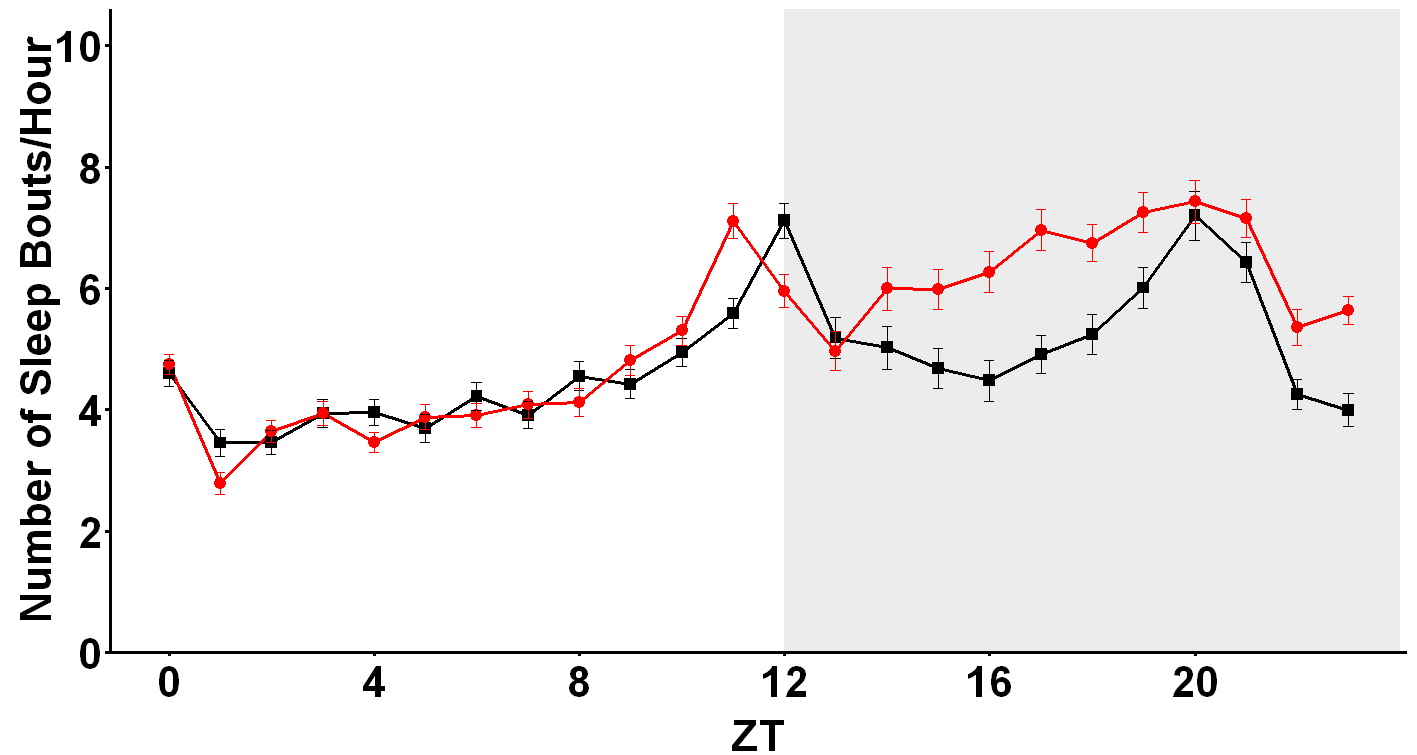

In [42]:
#Split-Plot ANOVA - baseline number of bouts (hourly) - both sexes 
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour)),dv=.(Bouts), wid=.(Animal_ID), within=.(start_hour), between=.(Animal_Type))
#post-hoc t-tests - baseline number of bouts (hourly) - both sexes 
p_adjust_all_hour_nbouts_baseline <- All_Hour_Baseline_Stats%>%
    group_by(start_hour, Animal_ID)%>%
    summarize(Bouts=mean(Bouts), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Bouts~Animal_Type, var.equal=TRUE) %>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_nbouts_baseline
#Plot - baseline number of bouts (hourly) - both sexes 
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_NBouts_Figure(All_Hour_Baseline_Stats, c("wild_type","Dexras1 KO"))
  ggsave("Plots/BASELINE_NBouts_One_Hour_Line_Plot.png",width=30, height=16,units = "cm")
  

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,0.342678,5.664530e-01,,0.006033602
2,start_hour,23,368,39.948694,1.920778e-85,*,0.641466402
3,Animal_Type:start_hour,23,368,3.034376,5.517589e-06,*,0.119638728


`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Bouts,C57,Dexras1KO,9,9,0.97590007,16,0.34400,0.5504000
2,1,Bouts,C57,Dexras1KO,9,9,1.98333561,16,0.06480,0.2007000
3,2,Bouts,C57,Dexras1KO,9,9,0.40655781,16,0.69000,0.8715789
4,3,Bouts,C57,Dexras1KO,9,9,0.08644734,16,0.93200,0.9725217
5,4,Bouts,C57,Dexras1KO,9,9,1.96574437,16,0.06690,0.2007000
6,5,Bouts,C57,Dexras1KO,9,9,0.00000000,16,1.00000,1.0000000
7,6,Bouts,C57,Dexras1KO,9,9,1.52000000,16,0.14800,0.3100000
8,7,Bouts,C57,Dexras1KO,9,9,-0.16511455,16,0.87100,0.9725217
9,8,Bouts,C57,Dexras1KO,9,9,2.27567482,16,0.03700,0.1740000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


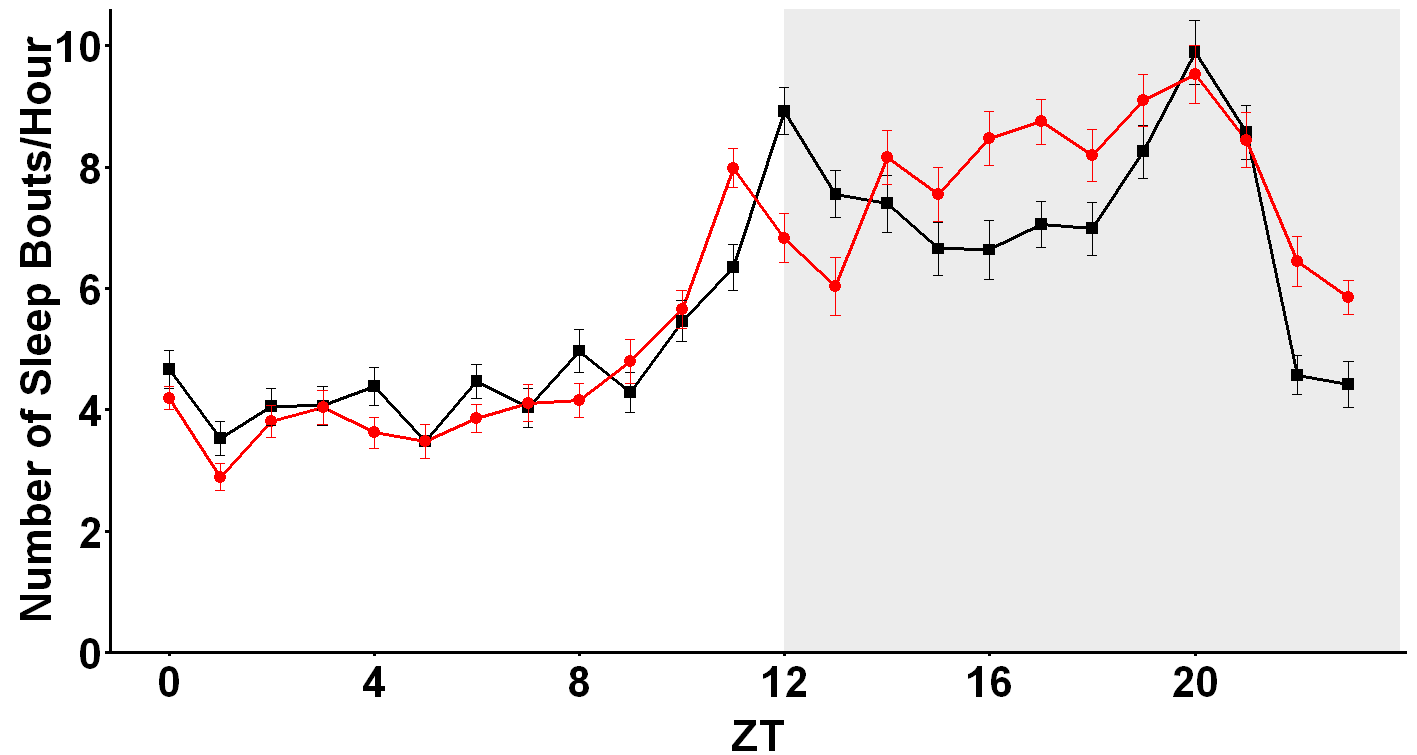

In [43]:
#Split-Plot ANOVA - baseline number of bouts (hourly) - males
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Male"), dv=.(Bouts), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
#post-hoc t-tests - baseline number of bouts (hourly) - males
p_adjust_all_hour_nbouts_baseline_male <- All_Hour_Baseline_Stats%>%filter(Sex=="Male")%>%
  group_by(start_hour, Animal_ID)%>%
    summarize(Bouts=mean(Bouts), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Bouts~Animal_Type, var.equal=TRUE) %>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_nbouts_baseline_male
#Plot - baseline number of bouts (hourly) - males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_NBouts_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Male"), c("wild_type Male","Dexras1 KO Male"))
  ggsave("Plots/BASELINE_NBouts_One_Hour_Line_Plot_M.png",width=30, height=16,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,4.055917,6.114918e-02,,0.07559275
2,start_hour,23,368,5.916117,6.335055e-15,*,0.20030592
3,Animal_Type:start_hour,23,368,1.997408,4.564718e-03,*,0.07797289


`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Bouts,C57,Dexras1KO,9,9,-1.36414064,16,0.1910,0.4584000
2,1,Bouts,C57,Dexras1KO,9,9,1.07279781,16,0.2990,0.5520000
3,2,Bouts,C57,Dexras1KO,9,9,-1.71404348,16,0.1060,0.2826667
4,3,Bouts,C57,Dexras1KO,9,9,-0.07591896,16,0.9400,0.9790000
5,4,Bouts,C57,Dexras1KO,9,9,0.49645078,16,0.6260,0.8184000
6,5,Bouts,C57,Dexras1KO,9,9,-0.77069288,16,0.4520,0.6780000
7,6,Bouts,C57,Dexras1KO,9,9,0.02710883,16,0.9790,0.9790000
8,7,Bouts,C57,Dexras1KO,9,9,-0.43872680,16,0.6670,0.8184000
9,8,Bouts,C57,Dexras1KO,9,9,0.13588631,16,0.8940,0.9752727


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


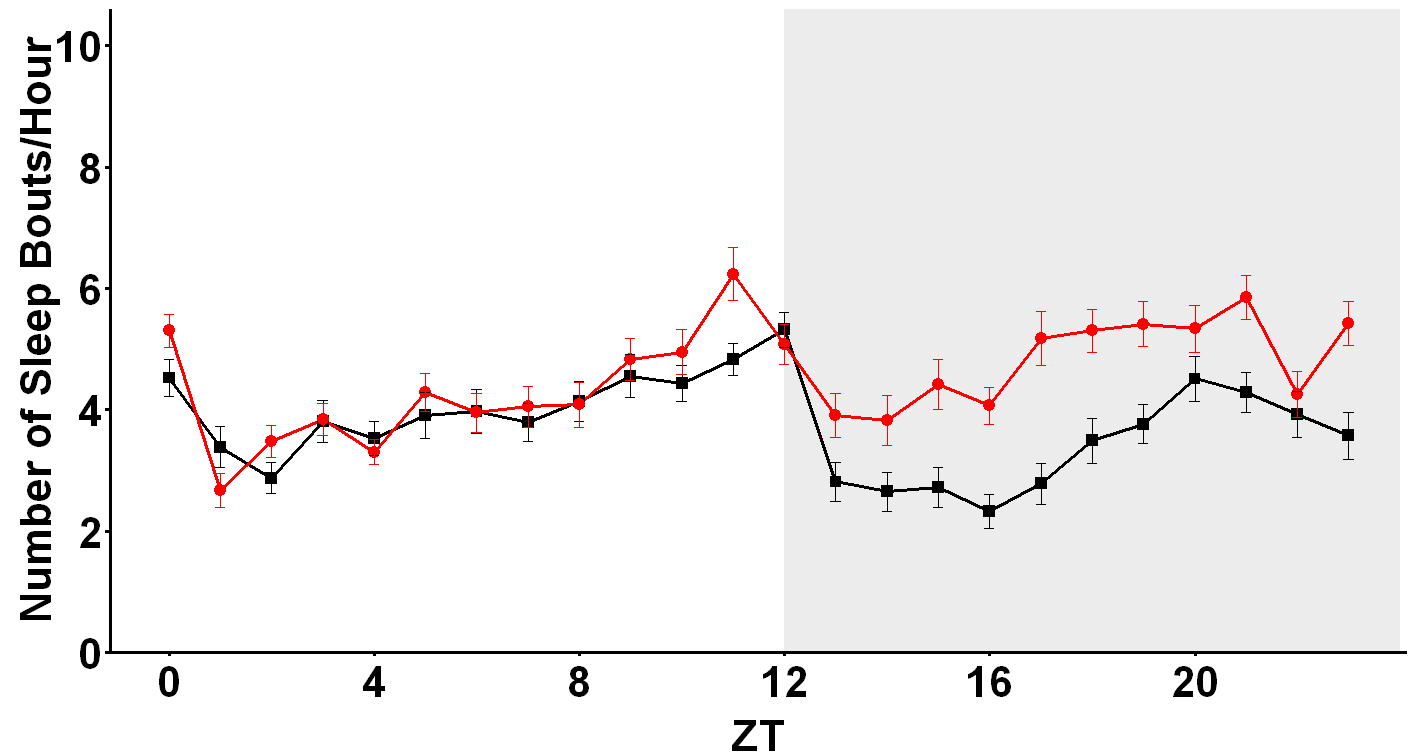

In [44]:
 #Split-Plot ANOVA - baseline number of bouts (hourly) - females
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Female"), dv=.(Bouts), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
  #post-hoc t-tests - baseline number of bouts (hourly) - females
p_adjust_all_hour_nbouts_baseline_female <- All_Hour_Baseline_Stats%>%filter(Sex=="Female")%>%
    group_by(start_hour, Animal_ID)%>%
    summarize(Bouts=mean(Bouts), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(Bouts~Animal_Type, var.equal=TRUE) %>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_nbouts_baseline_female
#Plot - baseline number of bouts (hourly) - females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_NBouts_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Female"), c("wild_type Female","Dexras1 KO Female"))
  ggsave("Plots/BASELINE_NBouts_One_Hour_Line_Plot_F.png",width=30, height=16,units = "cm")

## <center> Baseline Bout Lengths (Hourly) Plotted

We will create a graphing function to make plotting sexes easier:

In [45]:
 All_Hour_Baseline_LBouts_Figure <- function(Data, label1){
    Data %>%group_by(hour=start_hour, Animal_Type)%>%
      summarize(mean=mean(LengthBouts), sd=std.error(LengthBouts))%>%
      ggplot(aes(x=hour, y=mean))+
      coord_cartesian(xlim = c(0, 23), clip = "off")+
      annotate("rect", xmin=12, xmax=24, ymin=-Inf, ymax=Inf, fill="#ECECEC")+
      labs(x="ZT", y="Avg Length of Sleep Bouts (min)")+
      geom_line(size=1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type), size=3)+
      scale_y_continuous(breaks=c(0,10,20,30,40),expand=expansion(mult=c(0,0.01)),limits = c(0,40))+
      geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type),width=.2)+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=0.6, size=26),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(),
            legend.position="none")+
      scale_x_continuous(breaks=c(0,4,8,12,16,20))+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)
  }

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


$ANOVA
                  Effect DFn DFd           F             p p<.05         ges
2            Animal_Type   1  34   0.2185884  6.431004e-01       0.000506756
3             start_hour  23 782 121.5667760 7.181754e-240     * 0.767090920
4 Animal_Type:start_hour  23 782   2.5511795  9.193748e-05     * 0.064648908

$`Mauchly's Test for Sphericity`
                  Effect            W            p p<.05
3             start_hour 2.670295e-14 8.088794e-54     *
4 Animal_Type:start_hour 2.670295e-14 8.088794e-54     *

$`Sphericity Corrections`
                  Effect       GGe       p[GG] p[GG]<.05       HFe
3             start_hour 0.3269766 2.83701e-80         * 0.4289058
4 Animal_Type:start_hour 0.3269766 1.25986e-02         * 0.4289058
          p[HF] p[HF]<.05
3 1.825097e-104         *
4  5.815025e-03         *

`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,LengthBouts,C57,Dexras1KO,18,18,-1.6998753,34,0.09830,0.2949000
2,1,LengthBouts,C57,Dexras1KO,18,18,-2.8042462,34,0.00828,0.0496800
3,2,LengthBouts,C57,Dexras1KO,18,18,1.5067803,34,0.14100,0.3760000
4,3,LengthBouts,C57,Dexras1KO,18,18,1.0497499,34,0.30100,0.5160000
5,4,LengthBouts,C57,Dexras1KO,18,18,-0.7303507,34,0.47000,0.6517895
6,5,LengthBouts,C57,Dexras1KO,18,18,0.4838988,34,0.63200,0.7222857
7,6,LengthBouts,C57,Dexras1KO,18,18,-0.6558229,34,0.51600,0.6517895
8,7,LengthBouts,C57,Dexras1KO,18,18,0.6102484,34,0.54600,0.6552000
9,8,LengthBouts,C57,Dexras1KO,18,18,-1.0873568,34,0.28500,0.5160000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


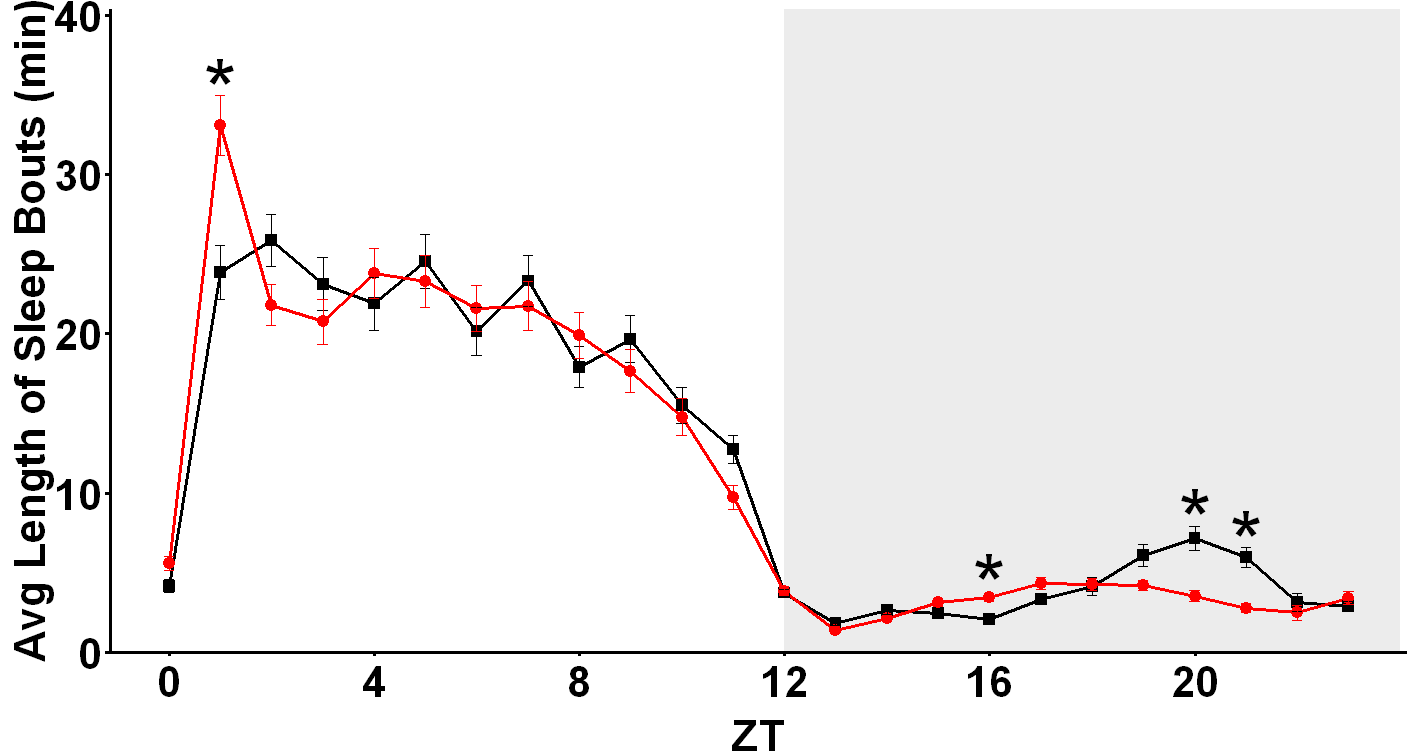

In [46]:
  #Split-Plot ANOVA - Baseline length of bouts (hourly) - both sexes
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour)), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_hour), between=.(Animal_Type))
  #Post hoc t-tests - Baseline length of bouts (hourly) - both sexes
p_adjust_all_hour_lbouts_baseline <- All_Hour_Baseline_Stats%>%
    group_by(start_hour, Animal_ID)%>%
    summarize(LengthBouts=mean(LengthBouts), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(LengthBouts~Animal_Type, var.equal=TRUE) %>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_lbouts_baseline
  #Plot - Baseline length of bouts (hourly) - both sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
  All_Hour_Baseline_LBouts_Figure(All_Hour_Baseline_Stats, c("wild_type","Dexras1 KO"))+
    annotate("text",x=1, y=35.4, label="*", angle=0, size=18)+
    annotate("text",x=16, y=4.3, label="*", angle=0, size=18)+
    annotate("text",x=20, y=8.4, label="*", angle=0, size=18)+
    annotate("text",x=21, y=7, label="*", angle=0, size=18)
  ggsave("Plots/BASELINE_LBouts_One_Hour_Line_Plot.png",width=30, height=16.07,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,0.3628051,5.553935e-01,,0.002029008
2,start_hour,23,368,76.9747654,2.331732e-125,*,0.814111255
3,Animal_Type:start_hour,23,368,1.0929964,3.500960e-01,,0.058546365


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


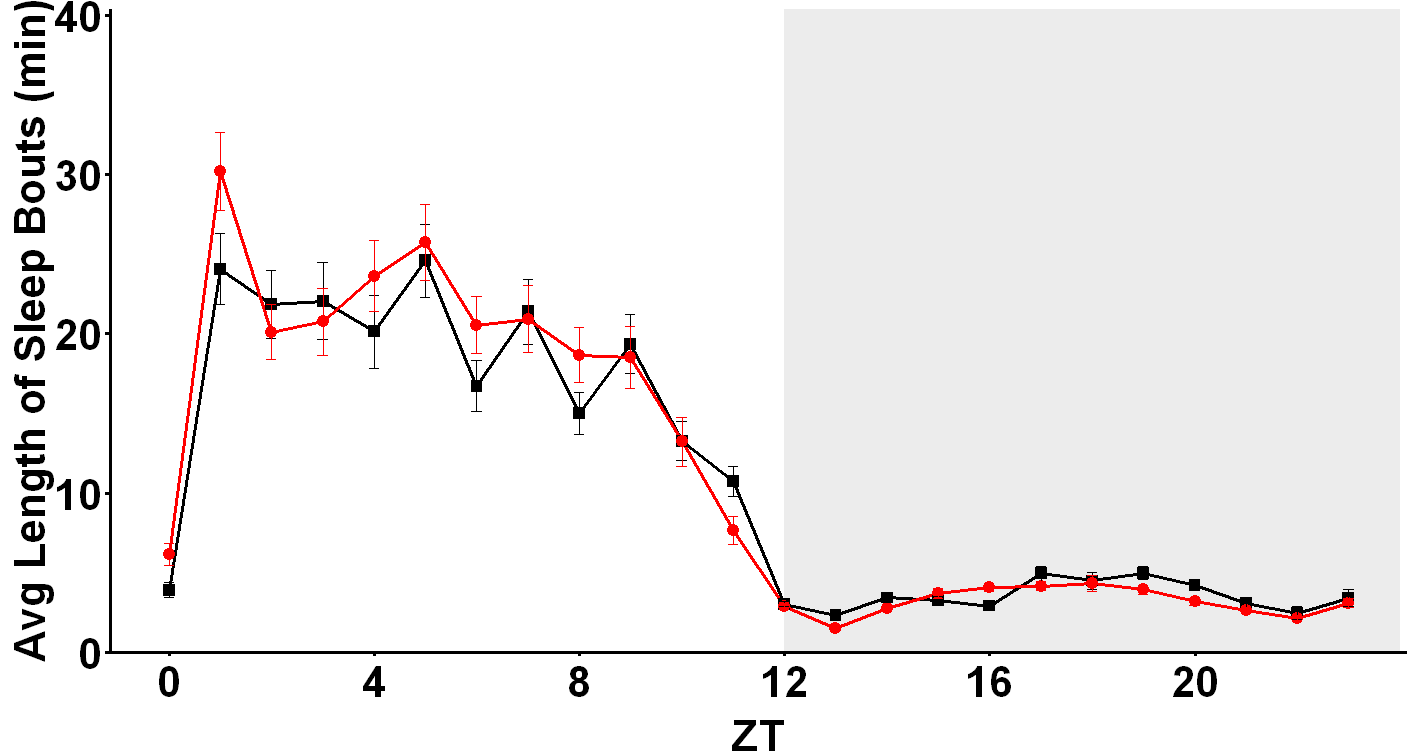

In [47]:
  #Split-Plot ANOVA - Baseline length of bouts (hourly) - males
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Male"), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
#Plot - Baseline length of bouts (hourly) - males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
All_Hour_Baseline_LBouts_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Male"), c("wild_type Male","Dexras1 KO Male"))
  ggsave("Plots/BASELINE_LBouts_One_Hour_Line_Plot_M.png",width=30, height=16.07,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,1.891209,1.880168e-01,,0.005895563
2,start_hour,23,368,54.819756,6.515211e-104,*,0.764945300
3,Animal_Type:start_hour,23,368,1.998149,4.544866e-03,*,0.106040118


`summarise()` has grouped output by 'start_hour', 'Animal_ID'. You can override using the `.groups` argument.


,start_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,LengthBouts,C57,Dexras1KO,9,9,-0.48453880,16,0.635000,0.8450526
2,1,LengthBouts,C57,Dexras1KO,9,9,-2.14070268,16,0.048000,0.2304000
3,2,LengthBouts,C57,Dexras1KO,9,9,1.69712251,16,0.109000,0.4360000
4,3,LengthBouts,C57,Dexras1KO,9,9,0.99466304,16,0.335000,0.6700000
5,4,LengthBouts,C57,Dexras1KO,9,9,-0.07947061,16,0.938000,0.9380000
6,5,LengthBouts,C57,Dexras1KO,9,9,1.05428207,16,0.307000,0.6698182
7,6,LengthBouts,C57,Dexras1KO,9,9,0.27736057,16,0.785000,0.8563636
8,7,LengthBouts,C57,Dexras1KO,9,9,0.66656164,16,0.515000,0.8240000
9,8,LengthBouts,C57,Dexras1KO,9,9,-0.12004195,16,0.906000,0.9380000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


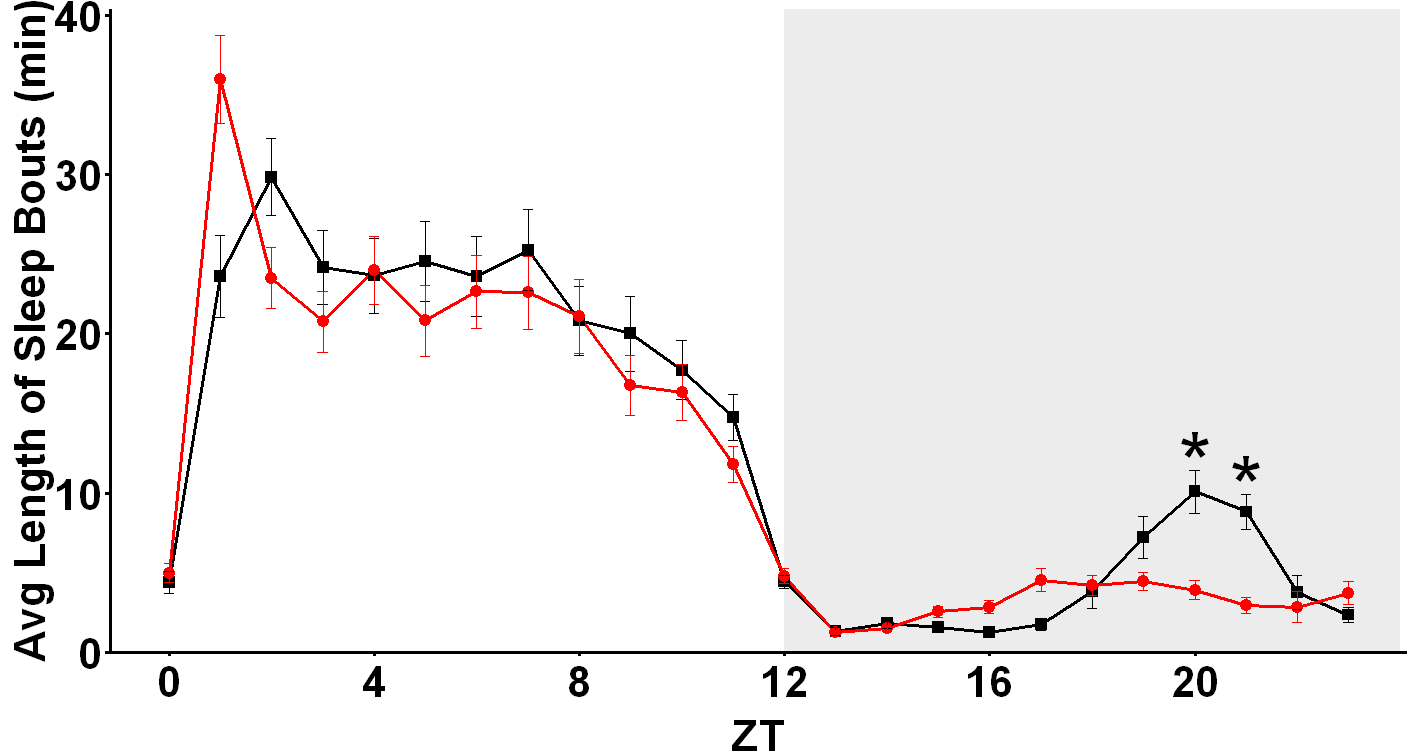

In [48]:
  #Split-Plot ANOVA - Baseline length of bouts (hourly) - females
ezANOVA(All_Hour_Baseline_Stats%>%mutate(start_hour=as.factor(start_hour))%>%filter(Sex=="Female"), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_hour),between=.(Animal_Type), type=1)
   #Post hoc t-tests - Baseline length of bouts (hourly) - females
p_adjust_all_hour_lbouts_baseline_female <- All_Hour_Baseline_Stats%>%filter(Sex=="Female")%>%
    group_by(start_hour, Animal_ID)%>%
    summarize(LengthBouts=mean(LengthBouts), Animal_Type)%>%
    distinct()%>%ungroup()%>%group_by(start_hour)%>%
    t_test(LengthBouts~Animal_Type, var.equal=TRUE) %>%
    adjust_pvalue(method = "BH")
p_adjust_all_hour_lbouts_baseline_female
  #Plots - Baseline length of bouts (hourly) - females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
   All_Hour_Baseline_LBouts_Figure(All_Hour_Baseline_Stats%>%filter(Sex=="Female"), c("wild_type Female","Dexras1 KO Female"))+
     annotate("text",x=20, y=12, label="*", angle=0, size=18)+
     annotate("text",x=21, y=10.5, label="*", angle=0, size=18)
  ggsave("Plots/BASELINE_LBouts_One_Hour_Line_Plot_F.png",width=30, height=16.07,units = "cm")

# <center> Baseline Sleep, Number of Bouts, and Length of Bouts in 6 Hour Bins

Having total sleep binned into one-hour intervals, we can simply sum up these hours to six-hour bins ,and add these to a new dataframe, which we will do later. However, we do need to define a new function for Number of Bouts, which will once again rely on the Sleep_Bout_PIR dataframes. Recall that when we defined number of bouts hourly, we stated that:
- If a bout falls within two hours, that is the difference between max_end and max_start (in hours) is 1, we will count the bout in both hours
 - If the difference between max_end and max_start is 2, we will count the bout in all three hours 

Also recall that max_start referred to the final bout starting in a given hour, and max_end is when that bout ended:

In [49]:
head(Merge) #From hourly data PIR1

,start_hour,Sum,max_start,max_end,end_hour
,<dttm>,<dbl>,<dttm>,<dttm>,<dttm>
1,2022-06-18 09:00:00,57.000000,2022-06-18 09:50:16,2022-06-18 10:40:36,2022-06-18 10:00:00
2,2022-06-18 10:00:00,70.833333,2022-06-18 10:41:06,2022-06-18 11:51:55,2022-06-18 11:00:00
3,2022-06-18 11:00:00,15.833333,2022-06-18 11:52:15,2022-06-18 12:08:05,2022-06-18 12:00:00
4,2022-06-18 12:00:00,38.666667,2022-06-18 12:56:44,2022-06-18 12:57:44,2022-06-18 12:00:00
5,2022-06-18 13:00:00,102.833333,2022-06-18 13:42:54,2022-06-18 14:48:23,2022-06-18 14:00:00
6,2022-06-18 14:00:00,7.666667,2022-06-18 14:54:53,2022-06-18 14:57:13,2022-06-18 14:00:00


If we simply summed up the number of bouts we calculated hourly into six-hour bins, we will be double counting bouts too often. When we decrease resolution to six-hours, it makes more sense to only double count bouts when they lie between two six-hour intervals. We would thus modify our statmenet to be:
 
 - If a bout falls within two six-hour intervals, we will count the bout in both six-hour intervals.
 
We can therefore define a function for number of bouts per 6 hours, but an example with PIR1 will make understanding the code easier. We will use Sleep_Bout_PIR1_Filtered:

In [50]:
head(Sleep_Bout_PIR1_Filtered)

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>
1,C57,Male,1,2022-06-18 09:03:37,1,L,2022-06-18 09:00:00,2022-06-18 09:04:17
2,C57,Male,1,2022-06-18 09:19:57,2,L,2022-06-18 09:00:00,2022-06-18 09:20:47
3,C57,Male,1,2022-06-18 09:29:16,2,L,2022-06-18 09:00:00,2022-06-18 09:30:06
4,C57,Male,1,2022-06-18 09:41:56,4,L,2022-06-18 09:00:00,2022-06-18 09:43:06
5,C57,Male,1,2022-06-18 09:45:26,6,L,2022-06-18 09:00:00,2022-06-18 09:46:56
6,C57,Male,1,2022-06-18 09:47:56,7,L,2022-06-18 09:00:00,2022-06-18 09:49:36


We will add a column, Six_Hour, which contains six hour intervals defined as 21:00:00 (>=9PM or <3AM), 03:00:00 (>=3AM and <9AM), 09:00:00 (>=9AM and <3PM), 15:00:00 (>=3PM and <9PM). The choice of these times is that 9AM to 9PM corresponded to lights on, and lights off corresponded to 9PM to 9AM. Therefore, the 09:00:00 and 15:00:00 intervals correspond with lights on, and the 21:00:00 and 03:00:00 intervals correspond with lights off:

In [51]:
head(Sleep_Bout_PIR1_Filtered%>%mutate(Six_Hour=case_when(
                                (as.numeric((hour(start_hour)))>=21|
                                   as.numeric((hour(start_hour)))<3) ~ "21:00:00", #defining a six-hour timepoint to 21:00:00
                                (as.numeric((hour(start_hour)))>=3&
                                   as.numeric((hour(start_hour)))<9) ~ "03:00:00", #defining a six-hour timepoint to 03:00:00
                                (as.numeric((hour(start_hour)))>=9&
                                   as.numeric((hour(start_hour)))<15) ~ "09:00:00", #defining a six-hour timepoint to 09:00:00
                                (as.numeric((hour(start_hour)))>=15&
                                   as.numeric((hour(start_hour)))<21) ~ "15:00:00")))

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End,Six_Hour
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>,<chr>
1,C57,Male,1,2022-06-18 09:03:37,1,L,2022-06-18 09:00:00,2022-06-18 09:04:17,09:00:00
2,C57,Male,1,2022-06-18 09:19:57,2,L,2022-06-18 09:00:00,2022-06-18 09:20:47,09:00:00
3,C57,Male,1,2022-06-18 09:29:16,2,L,2022-06-18 09:00:00,2022-06-18 09:30:06,09:00:00
4,C57,Male,1,2022-06-18 09:41:56,4,L,2022-06-18 09:00:00,2022-06-18 09:43:06,09:00:00
5,C57,Male,1,2022-06-18 09:45:26,6,L,2022-06-18 09:00:00,2022-06-18 09:46:56,09:00:00
6,C57,Male,1,2022-06-18 09:47:56,7,L,2022-06-18 09:00:00,2022-06-18 09:49:36,09:00:00


Now, we want to sum bouts that lie within a six-hour interval. The Six_Hour column above does not have a date associated with it. So we need to group the data by Six_Hour and by date. One way to do this is to group by Six_Hour and the date portion of start_hour (so excluding the time). The problem with this is that we have an interval "21:00:00" which lies between two dates (>=9PM or <3AM) - e.g. 2022-06-18 and 2022-06-19 below:

In [52]:
(Sleep_Bout_PIR1_Filtered%>%mutate(Six_Hour=case_when(
                                (as.numeric((hour(start_hour)))>=21|
                                   as.numeric((hour(start_hour)))<3) ~ "21:00:00", #defining a six-hour timepoint to 21:00:00
                                (as.numeric((hour(start_hour)))>=3&
                                   as.numeric((hour(start_hour)))<9) ~ "03:00:00", #defining a six-hour timepoint to 03:00:00
                                (as.numeric((hour(start_hour)))>=9&
                                   as.numeric((hour(start_hour)))<15) ~ "09:00:00", #defining a six-hour timepoint to 09:00:00
                                (as.numeric((hour(start_hour)))>=15&
                                   as.numeric((hour(start_hour)))<21) ~ "15:00:00")))[44:63,]

,Strain,Sex,Number,Start,Duration,LightDark,start_hour,End,Six_Hour
,<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<chr>,<dttm>,<chr>
44,C57,Male,1,2022-06-18 20:37:21,230,L,2022-06-18 20:00:00,2022-06-18 21:16:11,15:00:00
45,C57,Male,1,2022-06-18 21:17:00,8,D,2022-06-18 21:00:00,2022-06-18 21:18:50,21:00:00
46,C57,Male,1,2022-06-18 21:23:40,1,D,2022-06-18 21:00:00,2022-06-18 21:24:20,21:00:00
47,C57,Male,1,2022-06-18 21:33:40,1,D,2022-06-18 21:00:00,2022-06-18 21:34:20,21:00:00
48,C57,Male,1,2022-06-18 22:06:50,5,D,2022-06-18 22:00:00,2022-06-18 22:08:10,21:00:00
49,C57,Male,1,2022-06-18 22:10:20,1,D,2022-06-18 22:00:00,2022-06-18 22:11:00,21:00:00
50,C57,Male,1,2022-06-18 22:28:30,1,D,2022-06-18 22:00:00,2022-06-18 22:29:10,21:00:00
51,C57,Male,1,2022-06-18 22:41:00,1,D,2022-06-18 22:00:00,2022-06-18 22:41:40,21:00:00
52,C57,Male,1,2022-06-18 22:42:50,19,D,2022-06-18 22:00:00,2022-06-18 22:46:30,21:00:00


To solve this problem, we can subtract 3 hours from start_hour to shift dates back, and use this for grouping by:

In [53]:
(Sleep_Bout_PIR1_Filtered%>%
      mutate(Six_Hour=case_when((as.numeric((hour(start_hour)))>=21|
                                   as.numeric((hour(start_hour)))<3) ~ "21:00:00", #defining a six-hour timepoint to 21:00:00
                                (as.numeric((hour(start_hour)))>=3&
                                   as.numeric((hour(start_hour)))<9) ~ "03:00:00", #defining a six-hour timepoint to 03:00:00
                                (as.numeric((hour(start_hour)))>=9&
                                   as.numeric((hour(start_hour)))<15) ~ "09:00:00", #defining a six-hour timepoint to 09:00:00
                                (as.numeric((hour(start_hour)))>=15&
                                   as.numeric((hour(start_hour)))<21) ~ "15:00:00"))%>% #defining a six-hour timepoint to 15:00:00
      group_by(start_hour=as.POSIXct(paste(as.character(date((ymd_hms(start_hour))-hours("3"))),Six_Hour))))[44:63,] #redefine start_hour by subtracting 3 hours from start_hour and add the time from Six_Hour, group by this
    #-hours("3") subtract 3 hours to ensure proper grouping of 6-hour intervals into the correct days

Strain,Sex,Number,Start,Duration,LightDark,start_hour,End,Six_Hour
<chr>,<chr>,<chr>,<dttm>,<dbl>,<chr>,<dttm>,<dttm>,<chr>
C57,Male,1,2022-06-18 20:37:21,230,L,2022-06-18 15:00:00,2022-06-18 21:16:11,15:00:00
C57,Male,1,2022-06-18 21:17:00,8,D,2022-06-18 21:00:00,2022-06-18 21:18:50,21:00:00
C57,Male,1,2022-06-18 21:23:40,1,D,2022-06-18 21:00:00,2022-06-18 21:24:20,21:00:00
C57,Male,1,2022-06-18 21:33:40,1,D,2022-06-18 21:00:00,2022-06-18 21:34:20,21:00:00
C57,Male,1,2022-06-18 22:06:50,5,D,2022-06-18 21:00:00,2022-06-18 22:08:10,21:00:00
C57,Male,1,2022-06-18 22:10:20,1,D,2022-06-18 21:00:00,2022-06-18 22:11:00,21:00:00
C57,Male,1,2022-06-18 22:28:30,1,D,2022-06-18 21:00:00,2022-06-18 22:29:10,21:00:00
C57,Male,1,2022-06-18 22:41:00,1,D,2022-06-18 21:00:00,2022-06-18 22:41:40,21:00:00
C57,Male,1,2022-06-18 22:42:50,19,D,2022-06-18 21:00:00,2022-06-18 22:46:30,21:00:00


We have thus shifted the dates so that the interval lies within 2022-06-18. With this information, we can define our function:

In [54]:
 Six_Hour_Number_Bouts<- function(PIR){  #using Sleep_Bout_PIR dataframes
    PIRQ <- PIR %>% filter(ymd_hms(Start)>=ymd_hms("2022-06-18T09:00:00") & 
                             ymd_hms(Start)<=ymd_hms("2022-06-28T21:00:00") &
                             !(ymd_hms(start_hour)>=ymd_hms("2022-06-25T09:00:00") & 
                                 ymd_hms(start_hour)<ymd_hms("2022-06-25T15:00:00")))%>% #filtering for baseline and post-deprivation data
      mutate(Six_Hour=case_when((as.numeric((hour(start_hour)))>=21|
                                   as.numeric((hour(start_hour)))<3) ~ "21:00:00", #defining a six-hour timepoint to 21:00:00
                                (as.numeric((hour(start_hour)))>=3&
                                   as.numeric((hour(start_hour)))<9) ~ "03:00:00", #defining a six-hour timepoint to 03:00:00
                                (as.numeric((hour(start_hour)))>=9&
                                   as.numeric((hour(start_hour)))<15) ~ "09:00:00", #defining a six-hour timepoint to 09:00:00
                                (as.numeric((hour(start_hour)))>=15&
                                   as.numeric((hour(start_hour)))<21) ~ "15:00:00"))%>% #defining a six-hour timepoint to 15:00:00
      group_by(start_hour=as.POSIXct(paste(as.character(date((ymd_hms(start_hour))-hours("3"))),Six_Hour)))%>% #redefine start_hour by subtracting 3 hours from start_hour and add the time from Six_Hour, group by this
     # -hours("3") subtract 3 hours to ensure proper grouping of 6-hour intervals into the correct days 
     summarise(number_bouts=n(), max_start=max(Start),max_end=max(End))%>% #defining when the final bout begins and ends for the six-hour interval; also defining number of bouts (n()) that start within a six-hour interval
      mutate(start_hour=as_datetime(start_hour, tz="America/New_York"), #converting character dates into datetimes
             max_start=ymd_hms(max_start, tz="America/New_York"),
             max_end=ymd_hms(max_end, tz="America/New_York"))
    
    All_Hour <- data.frame(start_hour=as_datetime((seq(from=as.POSIXct("2022-06-18 09:00:00"), 
                                                       by=60*60*6, 
                                                       to=as.POSIXct("2022-06-28 21:00:00"))), tz="America/New_York")) #in case a six-hour interval is missing, define all six-hour intervals
    
    Merge <- left_join(All_Hour,  PIRQ, by="start_hour") #left join our data to include all six-hour intervals
    Merge$number_bouts[is.na(Merge$number_bouts)]<-0 #if present, replace NA values from missing six-hour interval data into 0s

            NumberBouts <- Merge$number_bouts #Define NumberBouts, which will be appended when adding bouts to the next six-hour interval
    
    FalseIfNA <- function(x){ #If missing max_end or max_start values because six-hour interval data was missing
      ifelse(is.na(x), FALSE, x) #explicitly setting this to FALSE to prevent errors from running the if statement below
    }
    
    for (i in 1:nrow(Merge)){
      
      if(FalseIfNA(as.numeric(format(Merge$max_end[i], format="%H"))-
                   as.numeric(format(Merge$start_hour[i+1], format="%H"))>=0)){ #if the final bout ends in the next six-hour interval
        NumberBouts[i+1] <- NumberBouts[i+1]+1 #add a bout to the next six-hour interval
      } 
      
      else(NumberBouts[i])
      
    }
    #NumberBouts[14] <- 0
    NumberBouts[! NumberBouts %in% c(NA)]
    
  }

We can then define a function that includes the number of bouts per animal, and we can sum up total hourly sleep into six-hour intervals:

In [55]:
 Six_Hour <- All_Hour %>%mutate(start_hour=(mid_hour-minutes("30")))%>%
    mutate(Six_Hour=case_when((as.numeric((hour(start_hour)))>=21|
                                 as.numeric((hour(start_hour)))<3) ~ "21:00:00", #defining a six-hour timepoint to 21:00:00
                              (as.numeric((hour(start_hour)))>=3&
                                 as.numeric((hour(start_hour)))<9) ~ "03:00:00",  #defining a six-hour timepoint to 03:00:00
                              (as.numeric((hour(start_hour)))>=9&
                                 as.numeric((hour(start_hour)))<15) ~ "09:00:00", #defining a six-hour timepoint to 09:00:00
                              (as.numeric((hour(start_hour)))>=15&
                                 as.numeric((hour(start_hour)))<21) ~ "15:00:00"))%>% #defining a six-hour timepoint to 15:00:00
    group_by(start_hour=as.POSIXct(paste(as.character(date((ymd_hms(start_hour))-hours("3"))),Six_Hour)))%>% #redefine start_hour by subtracting 3 hours from start_hour and add the time from Six_Hour, group by this
     # -hours("3") subtract 3 hours to ensure proper grouping of 6-hour intervals into the correct days 
    summarise_at(vars(c(3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73)), sum)%>% #only sum columns from All_Hour with total hourly sleep data
    mutate(C57_Male_1_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR1), #run Six_Hour_Number_Bouts on Sleep_Bout_PIR dataframes
           Dexras1KO_Male_1_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR2),
           C57_Male_2_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR3),
           Dexras1KO_Male_2_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR4),
           C57_Male_3_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR5),
           Dexras1KO_Male_3_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR6),
           C57_Male_4_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR7),
           Dexras1KO_Male_4_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR8),
           C57_Male_5_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR9),
           Dexras1KO_Male_5_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR10),
           C57_Male_6_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR11),
           Dexras1KO_Male_6_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR12),
           C57_Female_1_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR13),
           Dexras1KO_Female_1_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR14),
           C57_Female_2_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR15),
           Dexras1KO_Female_2_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR16),
           C57_Female_3_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR17),
           Dexras1KO_Female_3_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR18),
           C57_Female_4_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR19),
           Dexras1KO_Female_4_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR20),
           C57_Female_5_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR21),
           Dexras1KO_Female_5_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR22),
           C57_Female_6_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR23),
           Dexras1KO_Female_6_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR24),
           C57_Male_7_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR25),
           Dexras1KO_Male_7_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR26),
           C57_Male_8_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR27),
           Dexras1KO_Male_8_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR28),
           C57_Male_9_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR29),
           Dexras1KO_Male_9_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR30),
           C57_Female_7_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR31),
           Dexras1KO_Female_7_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR32),
           C57_Female_8_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR33),
           Dexras1KO_Female_8_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR34),
           C57_Female_9_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR35),
           Dexras1KO_Female_9_Bouts=Six_Hour_Number_Bouts(Sleep_Bout_PIR36),
           LightDark=ifelse(hms(format(start_hour, format="%H:%M:%S"))>=hms("09:00:00")&
                              hms(format(start_hour, format="%H:%M:%S"))<hms("21:00:00"),"L","D"),
           mid_hour=start_hour+hours("3"))
head(Six_Hour)

start_hour,C57_Male_1_Sleep,Dexras1KO_Male_1_Sleep,C57_Male_2_Sleep,Dexras1KO_Male_2_Sleep,C57_Male_3_Sleep,Dexras1KO_Male_3_Sleep,C57_Male_4_Sleep,Dexras1KO_Male_4_Sleep,C57_Male_5_Sleep,...,C57_Male_9_Bouts,Dexras1KO_Male_9_Bouts,C57_Female_7_Bouts,Dexras1KO_Female_7_Bouts,C57_Female_8_Bouts,Dexras1KO_Female_8_Bouts,C57_Female_9_Bouts,Dexras1KO_Female_9_Bouts,LightDark,mid_hour
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>
2022-06-18 09:00:00,292.8333,295.1167,295.1167,323.28333,279.9500,291.7833,289.58333,298.41667,248.7333,...,36,16,15,17,25,24,24,11,L,2022-06-18 12:00:00
2022-06-18 15:00:00,242.8167,306.0500,319.2000,291.03333,328.8833,314.0333,302.25000,318.95000,295.3000,...,42,30,30,19,26,37,22,25,L,2022-06-18 18:00:00
2022-06-18 21:00:00,84.5500,125.0000,162.5500,63.51667,142.0000,197.1833,47.33333,81.28333,164.3000,...,58,46,5,24,9,27,16,16,D,2022-06-19 00:00:00
2022-06-19 03:00:00,199.0167,106.5500,106.5167,145.83333,137.0000,130.8333,59.33333,93.18333,171.0000,...,53,55,12,47,10,46,14,28,D,2022-06-19 06:00:00
2022-06-19 09:00:00,288.6167,279.8500,293.1167,310.56667,289.5667,310.3333,265.33333,329.50000,278.7167,...,35,17,12,17,18,25,20,19,L,2022-06-19 12:00:00
2022-06-19 15:00:00,242.5833,283.8500,307.7500,297.43333,305.6833,311.7500,321.83333,297.35000,330.9667,...,36,37,26,28,31,39,18,29,L,2022-06-19 18:00:00


## <center> Daily Total Basline Sleep - 6 Hour Bins - Line Graphs

We have baseline data for the 36 mice spanning 7 days. Using the Six_Hour dataframe, we can plot total sleep and compare Dexras1 KO and C57 wild-type mice. To do this, we create a graphing function to make plotting males and females easier:

In [56]:
Sleep_Baseline <- function(HOUR, label1, Sex1, Sex2){ #If only one sex is to be plotted, specify the same sex for Sex1 and Sex2
      HOUR%>%
        filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00")&
                 ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>% #only keep baseline data
        pivot_longer(cols=c(2:73), names_to="Animal", values_to="Variable_Name")%>%
        separate(col="Animal", into=c("Animal_Type", "Sex", "Number", "Variable"), sep = "_")%>%
        pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
        group_by(mid_hour,Animal_Type)%>%mutate(Sleep=Sleep/360, #sleep is a proportion of 6 hours, or 360 minutes
                                                LengthBouts=Sleep/Bouts)%>%  #Length of Bouts is the quotient of total sleep and number of bouts
        filter(Sex==Sex1|Sex==Sex2)%>% 
        summarise(meanSleep=mean(Sleep), sdSleep=std.error(Sleep), 
                  meanBouts=mean(Bouts), sdBouts=std.error(Bouts),
                  meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts))%>%
        distinct()%>%
        ggplot(aes(x=mid_hour, y=meanSleep))+
        scale_x_datetime(breaks=c(ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-24T09:00:00", tz="America/New_York")), labels=c(0,1,2,3,4,5,6))+
        scale_y_continuous(breaks=c(0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1),limits = c(0,1),expand=expansion(mult=c(0,0.01)))+
        geom_rect(xmin = -Inf,
                  xmax=ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-18T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-19T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-20T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-21T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-22T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-23T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-24T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-24T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-25T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_line(size = 1.1,aes(color=Animal_Type))+
        geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
        geom_errorbar(aes(ymax=meanSleep+sdSleep, ymin=meanSleep-sdSleep, color=Animal_Type),width=6000)+
        labs(x="Baseline Day", y="Sleep (proportion of 6 hours)")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1, color="black"),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position = "none")+
        scale_color_manual(values=c("black", "red"), labels=label1)+
        scale_shape_manual(values=c("square", "circle"), labels=label1)+
        coord_cartesian(ylim = c(0, 1), clip = "off")
    }

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


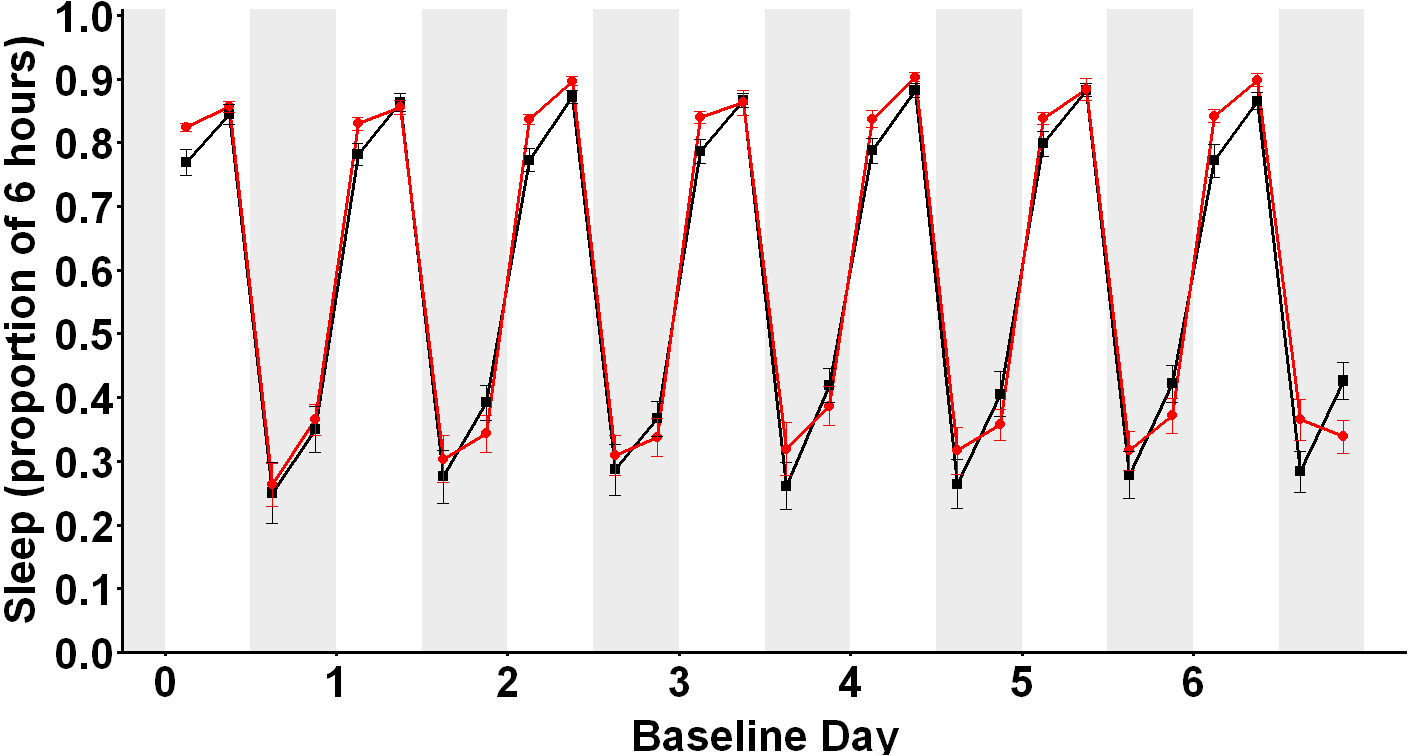

In [57]:
#Line Graph - Total Baseline 6-Hour Sleep - Both Sexes 
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
Sleep_Baseline(HOUR=Six_Hour,
                   label1=c("wild-type", "Dexras1 KO"), Sex1="Male", Sex2="Female")
    ggsave("Plots/BASELINE_7_DAY_Sleep_Line_Plot.png",width=30, height=16,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


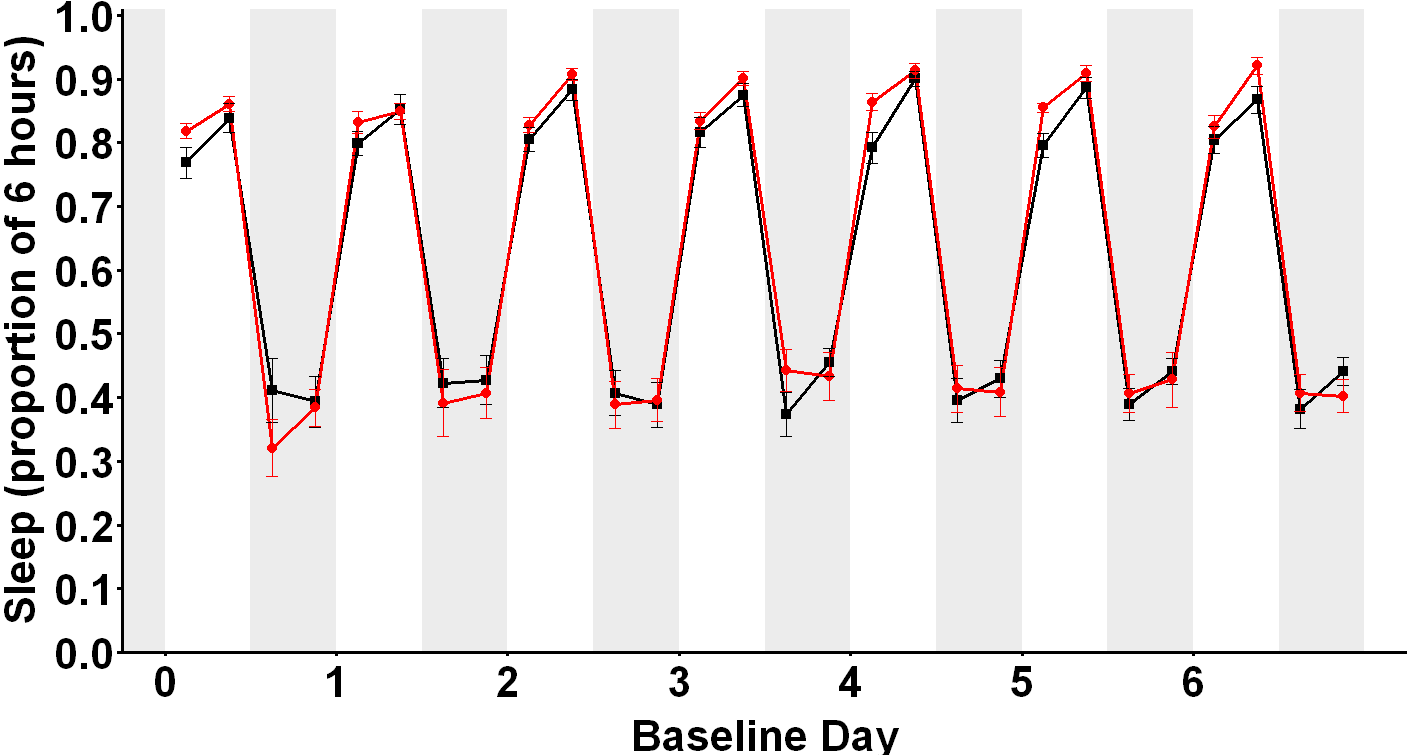

In [58]:
#Line Graph - Total Baseline 6-Hour Sleep - Males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
    Sleep_Baseline(HOUR=Six_Hour, Sex1="Male", Sex2="Male",
                   label1=c("wild-type Male", "Dexras1 KO Male"))
    ggsave("Plots/BASELINE_7_DAY_Sleep_Line_Plot_M.png",width=30, height=16,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


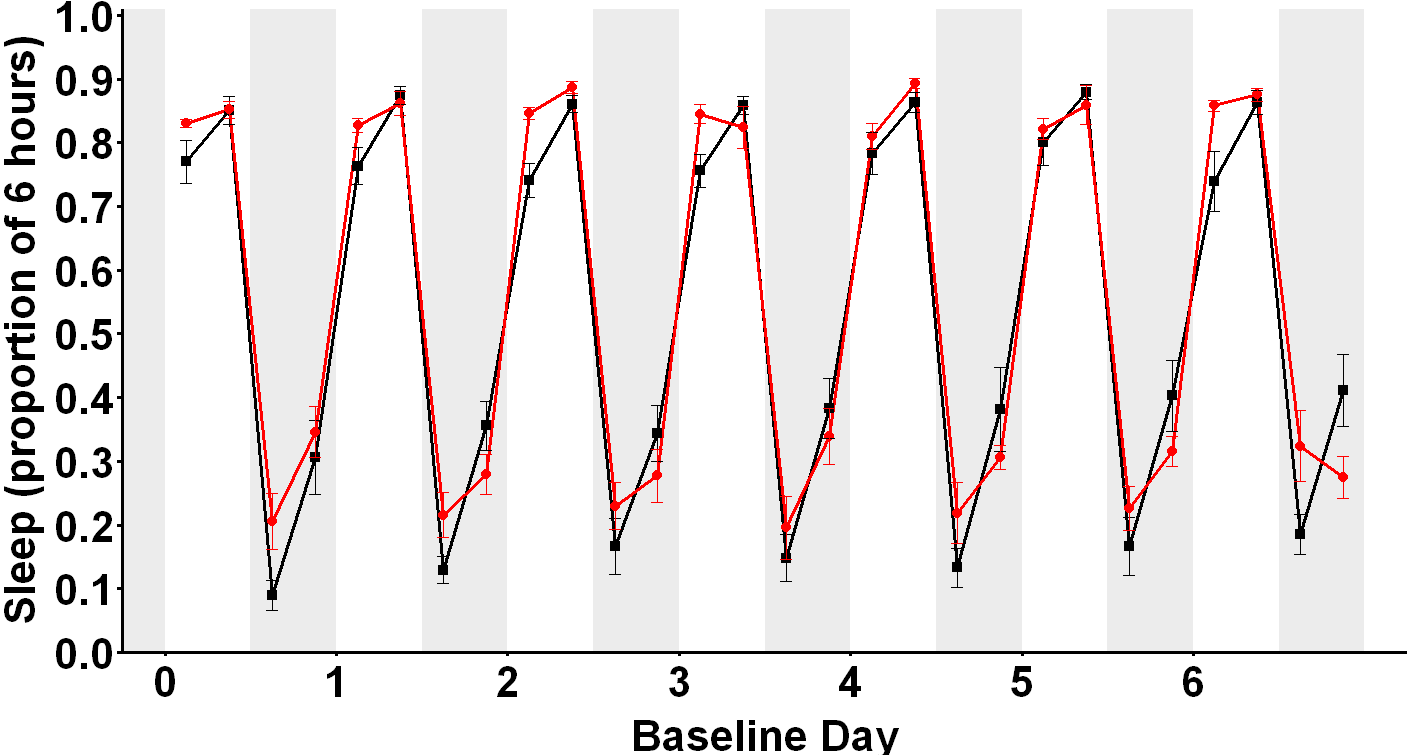

In [59]:
#Line Graph - Total Baseline 6-Hour Sleep - Females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)    
Sleep_Baseline(HOUR=Six_Hour,Sex1="Female", Sex2="Female",
                   label1=c("wild-type Female", "Dexras1 KO Female"))
    ggsave("Plots/BASELINE_7_DAY_Sleep_Line_Plot_F.png",width=30, height=16,units = "cm")

## <center> Daily Basline Number of Bouts - 6 Hour Bins - Line Graphs

We can also plot baseline number of bouts over the 7 days:

In [60]:
 NBouts_Baseline <- function(HOUR, label1, Sex1, Sex2){ #If only one sex is to be plotted, specify the same sex for Sex1 and Sex2
      HOUR%>%
        filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00")&
                 ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>% #only keep baseline data
        pivot_longer(cols=c(2:73), names_to="Animal", values_to="Variable_Name")%>%
        separate(col="Animal", into=c("Animal_Type", "Sex", "Number", "Variable"), sep = "_")%>%
        pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
        group_by(mid_hour,Animal_Type)%>%mutate(Sleep=Sleep/360, #sleep is a proportion of 6 hours, or 360 minutes
                                                LengthBouts=Sleep/Bouts)%>% #Length of Bouts is the quotient of total sleep and number of bouts
        filter(Sex==Sex1|Sex==Sex2)%>%
        summarise(meanSleep=mean(Sleep), sdSleep=std.error(Sleep), 
                  meanBouts=mean(Bouts), sdBouts=std.error(Bouts),
                  meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts))%>%
        distinct()%>%
        ggplot(aes(x=mid_hour, y=meanBouts))+
        scale_x_datetime(breaks=c(ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-24T09:00:00", tz="America/New_York")), labels=c(0,1,2,3,4,5,6))+
        scale_y_continuous(breaks=c(0,20,40,60),limits = c(0,60),expand=expansion(mult=c(0,0.01)))+
        geom_rect(xmin = -Inf,
                  xmax=ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-18T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-19T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-20T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-21T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-22T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-23T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-24T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-24T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-25T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_line(size = 1.1,aes(color=Animal_Type))+
        geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
        geom_errorbar(aes(ymax=meanBouts+sdBouts, ymin=meanBouts-sdBouts, color=Animal_Type),width=6000)+
        labs(x="Baseline Day", y="Number of Sleep Bouts/Six Hours")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1, color="black"),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position="none")+
        scale_color_manual(values=c("black", "red"), labels=label1)+
        scale_shape_manual(values=c("square", "circle"), labels=label1)+
        coord_cartesian(ylim = c(0, 60), clip = "off")
    }

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


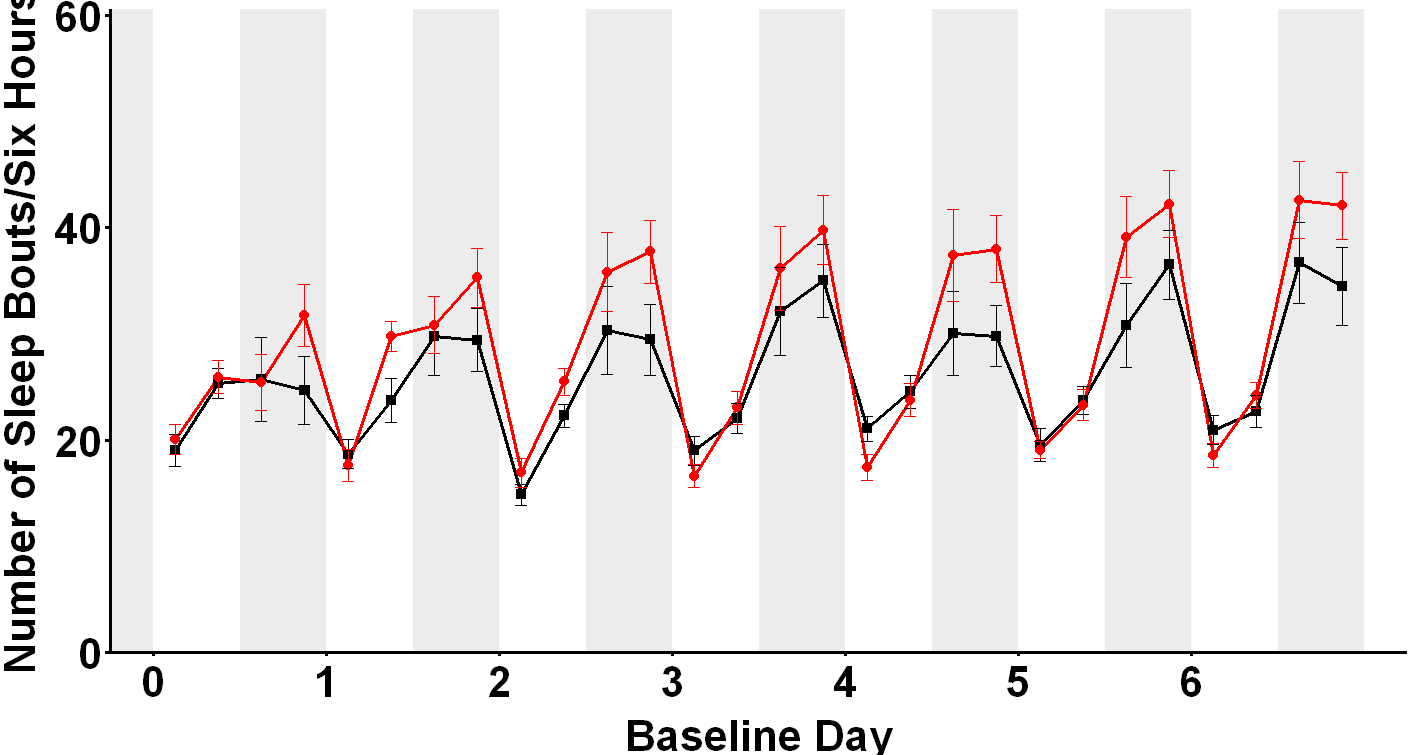

In [61]:
#Line Graph - Baseline Number of Sleep Bouts 6-Hour - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)    
NBouts_Baseline(HOUR=Six_Hour,
                   label1=c("wild-type", "Dexras1 KO"), Sex1="Male", Sex2="Female")
    ggsave("Plots/BASELINE_7_DAY_NBouts_Line_Plot.png",width=30, height=16.55,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


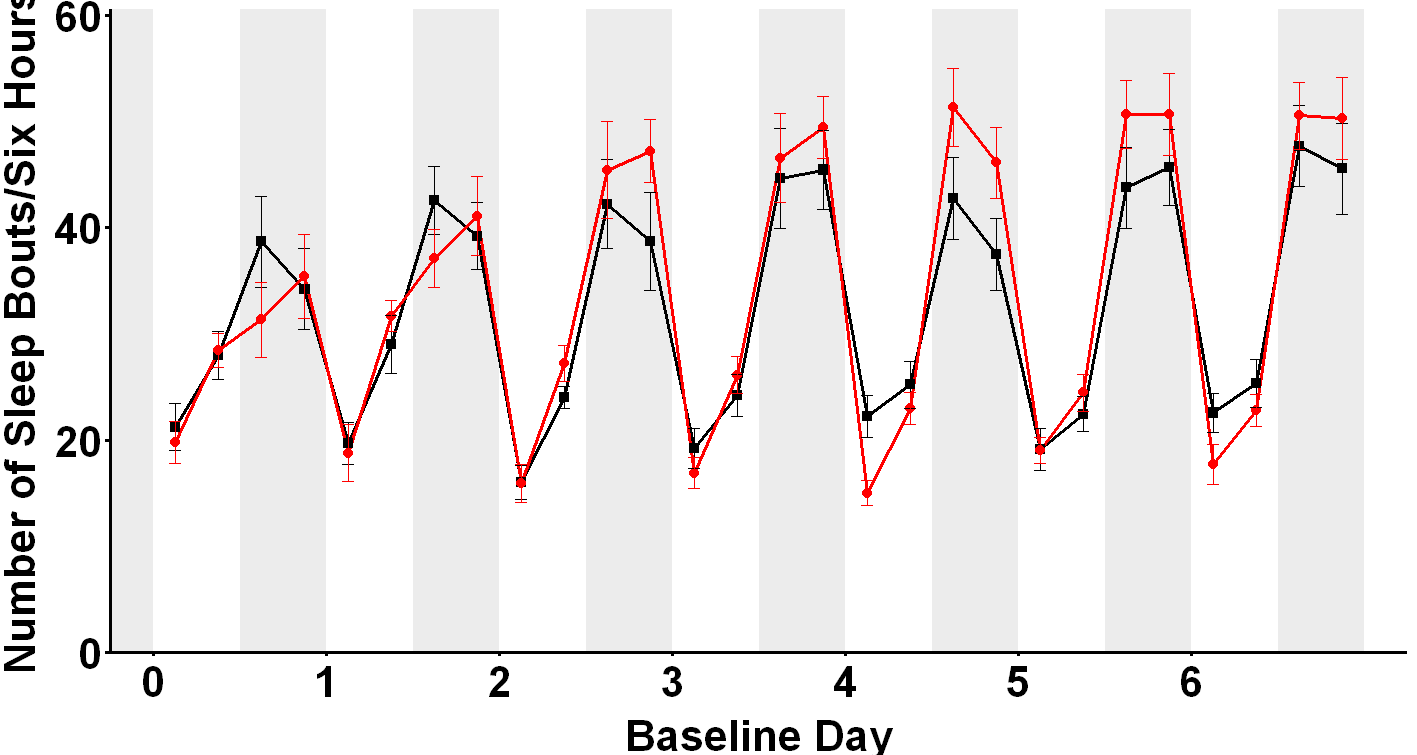

In [62]:
#Line Graph - Baseline Number of Sleep Bouts 6-Hour - Males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)    
 NBouts_Baseline(HOUR=Six_Hour, Sex1="Male", Sex2="Male",
                   label1=c("wild-type Male", "Dexras1 KO Male"))
    ggsave("Plots/BASELINE_7_DAY_NBouts_Line_Plot_M.png",width=30, height=16.55,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


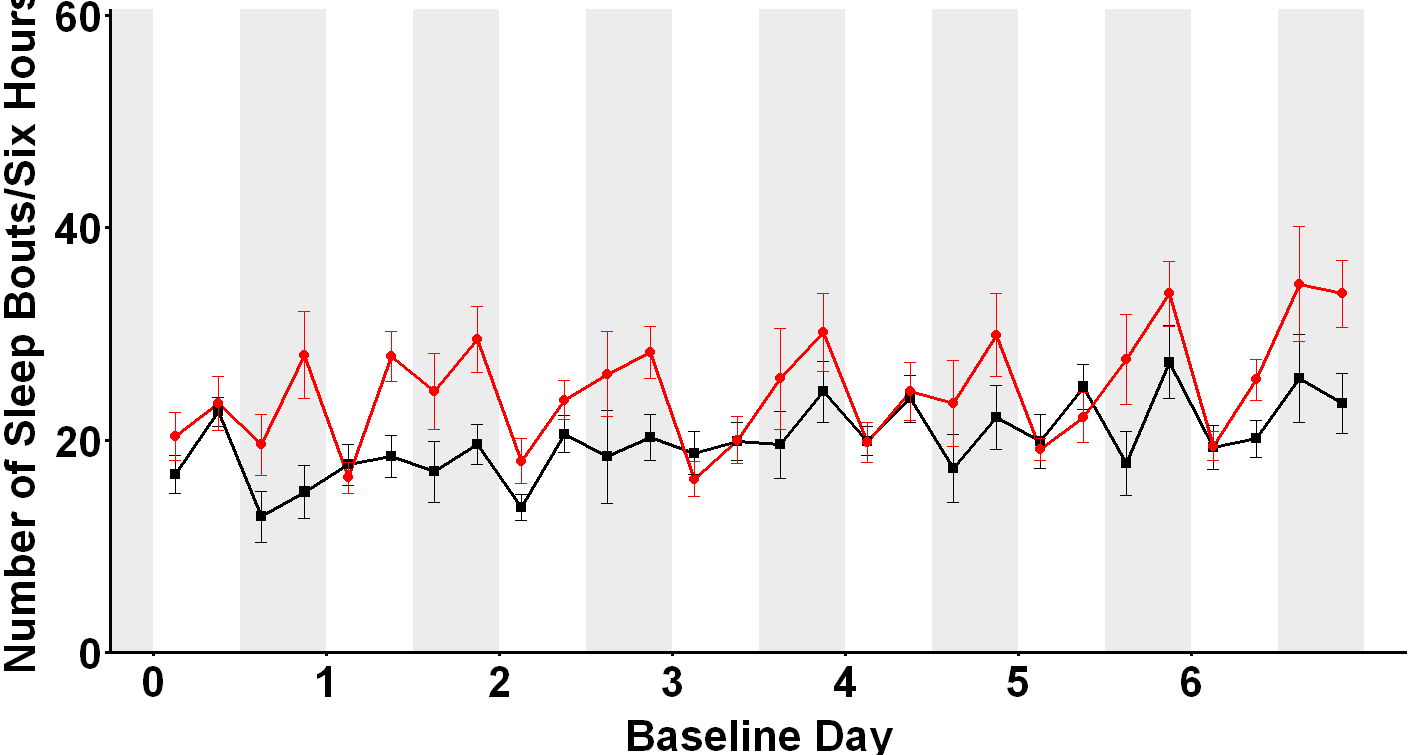

In [63]:
#Line Graph - Baseline Number of Sleep Bouts 6-Hour - Females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)   
NBouts_Baseline(HOUR=Six_Hour,Sex1="Female", Sex2="Female",
                   label1=c("wild-type Female", "Dexras1 KO Female"))
    ggsave("Plots/BASELINE_7_DAY_NBouts_Line_Plot_F.png",width=30, height=16.55,units = "cm")

## <center> Daily Baseline Length of Bouts - 6 Hour Bins - Line Graphs

We can also graph daily baseline length of bouts:

In [64]:
LBouts_Baseline <- function(HOUR, label1, Sex1, Sex2){ #If only one sex is to be plotted, specify the same sex for Sex1 and Sex2
      HOUR%>%
        filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00")&
                 ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>% #only keep baseline data
        pivot_longer(cols=c(2:73), names_to="Animal", values_to="Variable_Name")%>%
        separate(col="Animal", into=c("Animal_Type", "Sex", "Number", "Variable"), sep = "_")%>%
        pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
        group_by(mid_hour,Animal_Type)%>%mutate(LengthBouts=Sleep/Bouts, #Length of Bouts is the quotient of total sleep and number of bouts
                                                Sleep=Sleep/360)%>% #sleep is a proportion of 6 hours, or 360 minutes
        filter(Sex==Sex1|Sex==Sex2)%>%
        summarise(meanSleep=mean(Sleep), sdSleep=std.error(Sleep), 
                  meanBouts=mean(Bouts), sdBouts=std.error(Bouts),
                  meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts))%>%
        distinct()%>%
        ggplot(aes(x=mid_hour, y=meanBoutLength))+
        scale_x_datetime(breaks=c(ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),
                                  ymd_hms("2022-06-24T09:00:00", tz="America/New_York")), labels=c(0,1,2,3,4,5,6))+
        scale_y_continuous(breaks=c(0,10,20,30),limits = c(0,31),expand=expansion(mult=c(0,0.01)))+
        geom_rect(xmin = -Inf,
                  xmax=ymd_hms("2022-06-18T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-18T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-19T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-19T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-20T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-20T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-21T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-21T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-22T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-22T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-23T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-23T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-24T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_rect(xmin = ymd_hms("2022-06-24T21:00:00", tz="America/New_York"),
                  xmax=ymd_hms("2022-06-25T09:00:00", tz="America/New_York"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_line(size = 1.1,aes(color=Animal_Type))+
        geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
        geom_errorbar(aes(ymax=meanBoutLength+sdBoutLength, ymin=meanBoutLength-sdBoutLength, color=Animal_Type),width=6000)+
        labs(x="Baseline Day", y="Avg Length of Sleep Bouts (min)")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1, color="black"),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position = "none")+
        scale_color_manual(values=c("black", "red"), labels=label1)+
        scale_shape_manual(values=c("square", "circle"), labels=label1)+
        coord_cartesian(ylim = c(0, 31), clip = "off")
    }

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


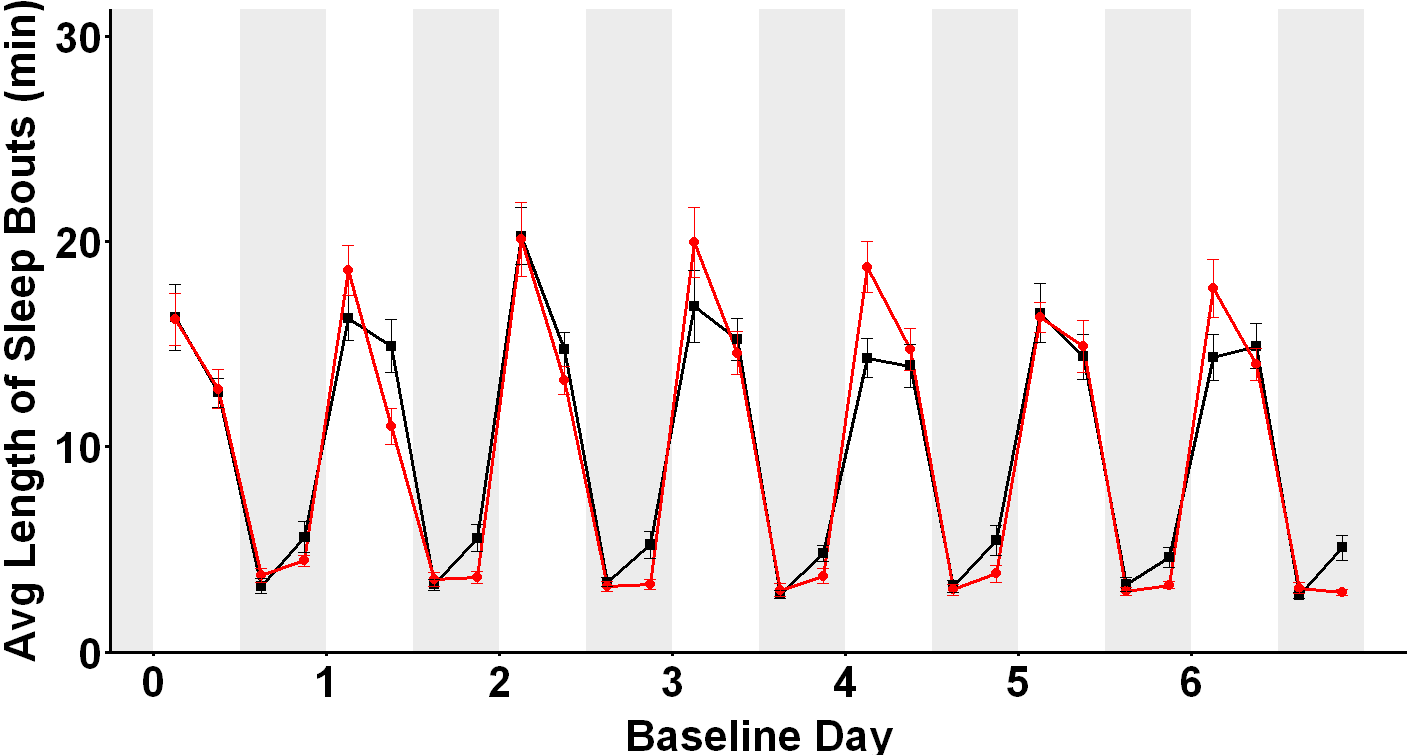

In [65]:
#Line Graph - Baseline Length of Sleep Bouts 6-Hour - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
LBouts_Baseline(HOUR=Six_Hour,
                    label1=c("wild-type", "Dexras1 KO"), Sex1="Male", Sex2="Female")
    ggsave("Plots/BASELINE_7_DAY_LBouts_Line_Plot.png",width=30, height=16.07,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


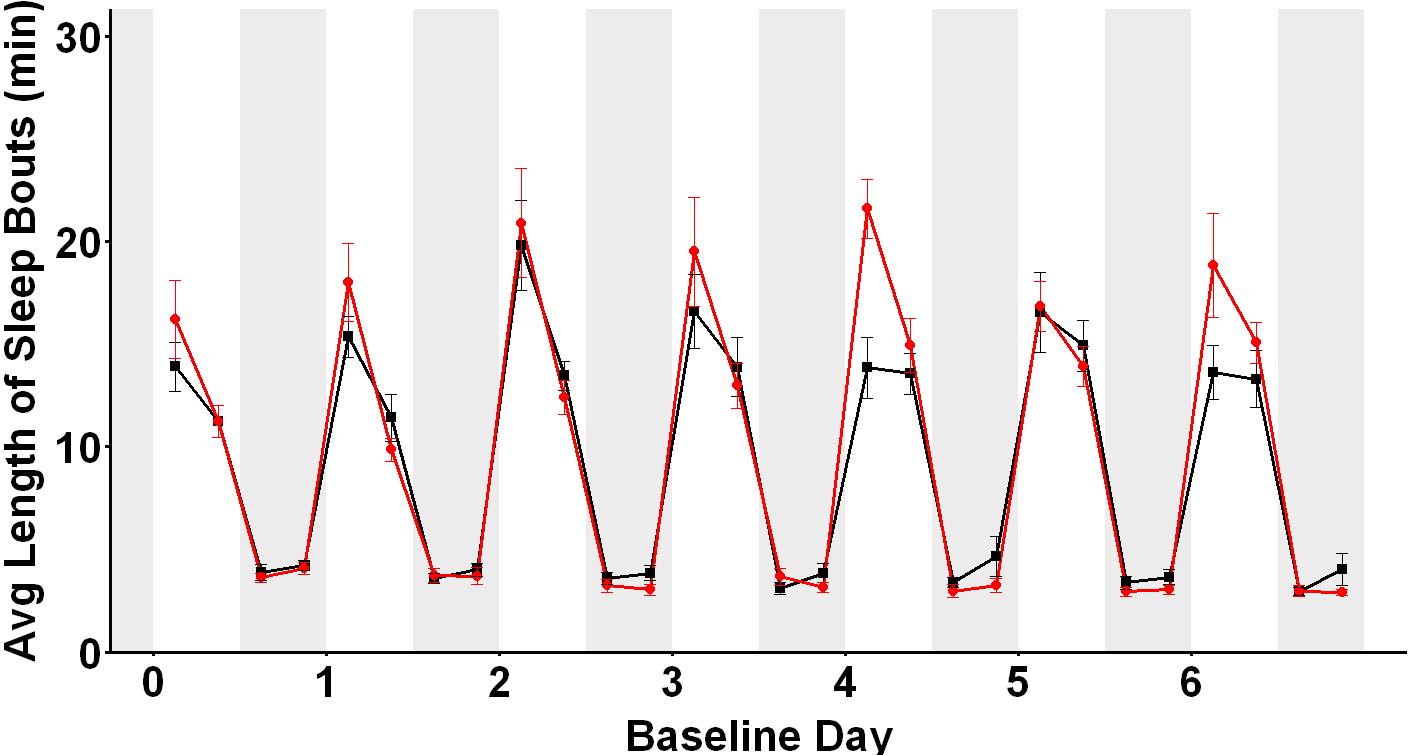

In [66]:
#Line Graph - Baseline Length of Sleep Bouts 6-Hour - Males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
LBouts_Baseline(HOUR=Six_Hour, Sex1="Male", Sex2="Male",
                    label1=c("wild-type Male", "Dexras1 KO Male"))
    ggsave("Plots/BASELINE_7_DAY_LBouts_Line_Plot_M.png",width=30, height=16.07,units = "cm")

`summarise()` has grouped output by 'mid_hour'. You can override using the `.groups` argument.


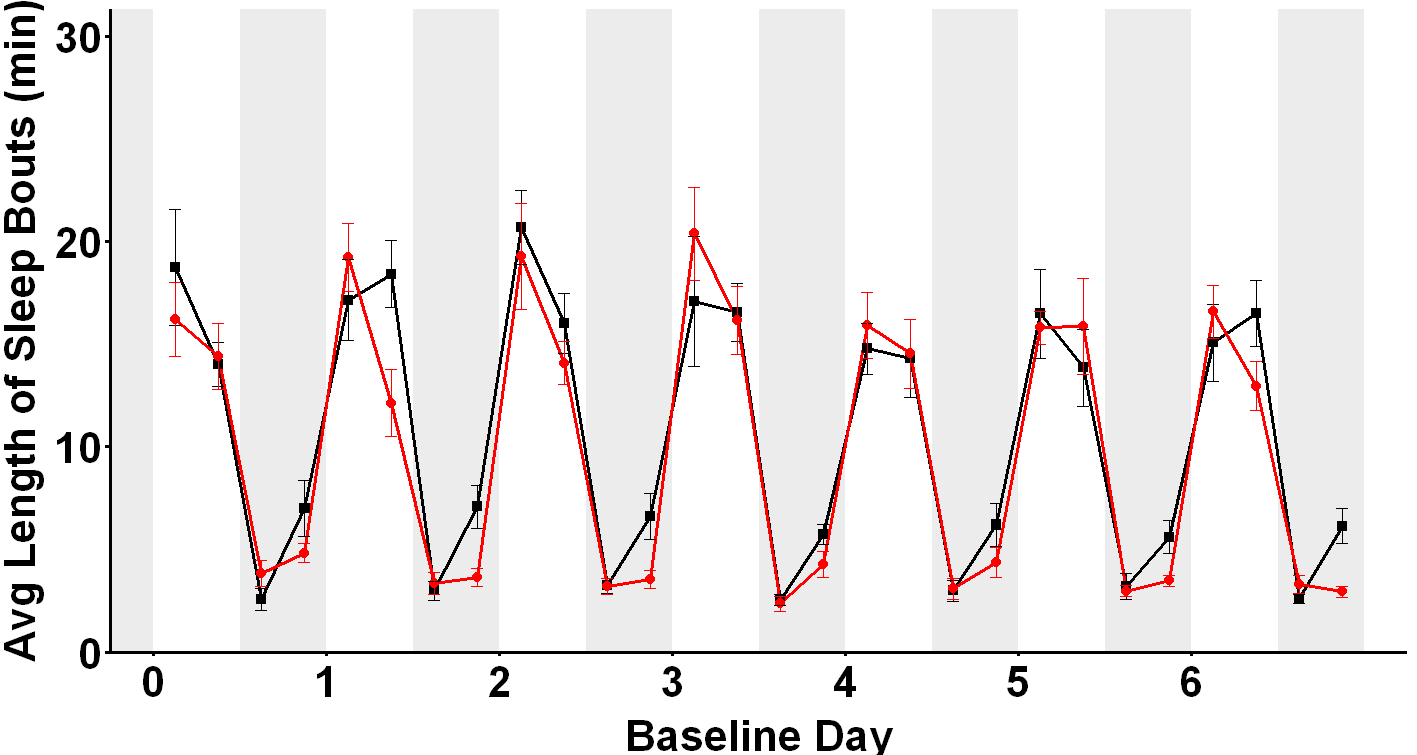

In [67]:
#Line Graph - Baseline Length of Sleep Bouts 6-Hour - Females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
LBouts_Baseline(HOUR=Six_Hour,Sex1="Female", Sex2="Female",
                    label1=c("wild-type Female", "Dexras1 KO Female"))
    ggsave("Plots/BASELINE_7_DAY_LBouts_Line_Plot_F.png",width=30, height=16.07,units = "cm")

# <center> Averaging the 7 days of Baseline Data: Bar Graphs

We can further summarize the 6 hour bins by averaging the data over the 7 days and plotting bar graphs. Let us take a look at the Six_Hour dataframe again:

In [68]:
head(Six_Hour)

start_hour,C57_Male_1_Sleep,Dexras1KO_Male_1_Sleep,C57_Male_2_Sleep,Dexras1KO_Male_2_Sleep,C57_Male_3_Sleep,Dexras1KO_Male_3_Sleep,C57_Male_4_Sleep,Dexras1KO_Male_4_Sleep,C57_Male_5_Sleep,...,C57_Male_9_Bouts,Dexras1KO_Male_9_Bouts,C57_Female_7_Bouts,Dexras1KO_Female_7_Bouts,C57_Female_8_Bouts,Dexras1KO_Female_8_Bouts,C57_Female_9_Bouts,Dexras1KO_Female_9_Bouts,LightDark,mid_hour
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>
2022-06-18 09:00:00,292.8333,295.1167,295.1167,323.28333,279.9500,291.7833,289.58333,298.41667,248.7333,...,36,16,15,17,25,24,24,11,L,2022-06-18 12:00:00
2022-06-18 15:00:00,242.8167,306.0500,319.2000,291.03333,328.8833,314.0333,302.25000,318.95000,295.3000,...,42,30,30,19,26,37,22,25,L,2022-06-18 18:00:00
2022-06-18 21:00:00,84.5500,125.0000,162.5500,63.51667,142.0000,197.1833,47.33333,81.28333,164.3000,...,58,46,5,24,9,27,16,16,D,2022-06-19 00:00:00
2022-06-19 03:00:00,199.0167,106.5500,106.5167,145.83333,137.0000,130.8333,59.33333,93.18333,171.0000,...,53,55,12,47,10,46,14,28,D,2022-06-19 06:00:00
2022-06-19 09:00:00,288.6167,279.8500,293.1167,310.56667,289.5667,310.3333,265.33333,329.50000,278.7167,...,35,17,12,17,18,25,20,19,L,2022-06-19 12:00:00
2022-06-19 15:00:00,242.5833,283.8500,307.7500,297.43333,305.6833,311.7500,321.83333,297.35000,330.9667,...,36,37,26,28,31,39,18,29,L,2022-06-19 18:00:00


Baseline recordings were taken for 7 days, after which animals were sleep deprived for 6 hours, and placed back in the cabinets for post-deprivation recordings. Right now, we are only interested in averaging the 7 days of baseline data. We want to retain the post-deprivation data because we will analyze it in the next section. We also want to convert the wide data of Six_Hour into long format for statistics:

In [69]:
head(Six_Hour%>%
      pivot_longer(cols=c(2:73), names_to="Animal", values_to="Variable_Name")%>%
      separate(col="Animal", into=c("Animal", "Variable"), sep="_(?=[^_]+$)")%>%
      pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
      mutate(Animal_ID=Animal, LengthBouts=Sleep/Bouts)%>%
      separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep="_")%>%
      filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & #keep all baseline data
               ymd_hms(start_hour)<=ymd_hms("2022-06-28T15:00:00"))%>% #keep post-deprivation data
      filter(!(ymd_hms(start_hour)==ymd_hms("2022-06-25T09:00:00")))) # exclude sleep deprivation interval, which was for 6 hours

start_hour,LightDark,mid_hour,Animal_Type,Sex,Number,Sleep,Bouts,Animal_ID,LengthBouts
<dttm>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
2022-06-18 09:00:00,L,2022-06-18 12:00:00,C57,Male,1,292.8333,22,C57_Male_1,13.31061
2022-06-18 09:00:00,L,2022-06-18 12:00:00,Dexras1KO,Male,1,295.1167,20,Dexras1KO_Male_1,14.75583
2022-06-18 09:00:00,L,2022-06-18 12:00:00,C57,Male,2,295.1167,20,C57_Male_2,14.75583
2022-06-18 09:00:00,L,2022-06-18 12:00:00,Dexras1KO,Male,2,323.2833,11,Dexras1KO_Male_2,29.38939
2022-06-18 09:00:00,L,2022-06-18 12:00:00,C57,Male,3,279.9500,15,C57_Male_3,18.66333
2022-06-18 09:00:00,L,2022-06-18 12:00:00,Dexras1KO,Male,3,291.7833,17,Dexras1KO_Male_3,17.16373


 We can take an average of the 7 days by defining a variable, start_pivot, which will place all 7 baseline days on the day before deprivation occurs (2022-06-24). The post-deprivation days will also be added to this variable, but their values will be unchanged. We will then group by start_pivot, and take the mean sleep, number of bouts, and length of bouts. In this way, we will take the mean of the 7 days of baseline interval data without changing the post-deprivation data:

In [70]:
Six_Hour_Pivot <- Six_Hour%>%
      pivot_longer(cols=c(2:73), names_to="Animal", values_to="Variable_Name")%>%
      separate(col="Animal", into=c("Animal", "Variable"), sep="_(?=[^_]+$)")%>%
      pivot_wider(names_from = "Variable", values_from="Variable_Name")%>%
      mutate(Animal_ID=Animal, LengthBouts=Sleep/Bouts)%>%
      separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep="_")%>%
      filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & #keep all baseline data
               ymd_hms(start_hour)<=ymd_hms("2022-06-28T15:00:00"))%>% #keep post-deprivation data
      filter(!(ymd_hms(start_hour)==ymd_hms("2022-06-25T09:00:00")))%>% # exclude sleep deprivation interval, which was for 6 hours
      mutate(start_pivot=c(rep(c(rep(ymd_hms("2022-06-24T09:00:00"),36), #repeat 36 times, one per animal
                                 rep(ymd_hms("2022-06-24T15:00:00"),36), #repeat 36 times, one per animal
                                 rep(ymd_hms("2022-06-24T21:00:00"),36), #repeat 36 times, one per animal
                                 rep(ymd_hms("2022-06-25T03:00:00"),36)),#repeat 36 times, one per animal
                                                                         7), #repeat these repetitions 7 times, since there are 7 baseline days in total
                           as.character(start_hour[1009:1476])))%>% #The variable does not change the post-deprivation dates and times
      group_by(start_pivot, Animal_Type, Animal_ID)%>%summarise( #group by start_pivot to take the mean of six-hour baseline intervals, while leaving post-deprivation data unchanged
        Sleep=mean(Sleep),
        Bouts=mean(Bouts),
        LengthBouts=mean(LengthBouts), Sex)%>%
      mutate(Animal_Type=as.factor(Animal_Type), start_pivot=as.factor(start_pivot), 
             Animal_ID=as.factor(Animal_ID))%>%distinct()
head(Six_Hour_Pivot)

`summarise()` has grouped output by 'start_pivot', 'Animal_Type', 'Animal_ID'. You can override using the `.groups` argument.


start_pivot,Animal_Type,Animal_ID,Sleep,Bouts,LengthBouts,Sex
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
2022-06-24 09:00:00,C57,C57_Female_1,266.4024,15.28571,19.80571,Female
2022-06-24 09:00:00,C57,C57_Female_2,262.4262,20.42857,13.55254,Female
2022-06-24 09:00:00,C57,C57_Female_3,244.2786,21.42857,15.61767,Female
2022-06-24 09:00:00,C57,C57_Female_4,284.2976,17.14286,17.69511,Female
2022-06-24 09:00:00,C57,C57_Female_5,304.5714,17.85714,17.42390,Female
2022-06-24 09:00:00,C57,C57_Female_6,258.7500,14.14286,20.98409,Female


We can then use the averaged 7 days of baseline data to create bar graphs for total sleep, number of bouts and bout lengths:

## <center> Daily Total Baseline Sleep - 6 Hour Bins - Bar Graphs

In [71]:
Sleep_Bar_Baseline <- function(Data, label1){
      Data %>% 
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"))%>% #keep only baseline data for these graphs
        mutate(Sleep=Sleep/360)%>%
        group_by(start_pivot, Animal_Type)%>%
        summarize(mean=mean(Sleep), sd=std.error(Sleep))%>%
        ggplot(aes(x=start_pivot, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 2.5,
                  xmax=4.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_x_discrete(labels=c("0-6", "6-12", "12-18", "18-24"))+
        scale_y_continuous(breaks=c(0,.1, .2,.3,.4,.5, .6,.7, .8,.9,1),expand=expansion(mult=c(0,0.01)),limits=c(0,1))+
        labs(x="ZT Hour Interval", y="Sleep (proportion of 6 hours)")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position = "none")
    }

Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd           F            p p<.05         ges
2             Animal_Type   1  34   0.8321019 3.680884e-01       0.009626972
3             start_pivot   3 102 508.2907181 3.591004e-61     * 0.900118988
4 Animal_Type:start_pivot   3 102   2.5851597 5.727524e-02       0.043825738

$`Mauchly's Test for Sphericity`
                   Effect         W            p p<.05
3             start_pivot 0.3152187 4.264439e-07     *
4 Animal_Type:start_pivot 0.3152187 4.264439e-07     *

$`Sphericity Corrections`
                   Effect     GGe        p[GG] p[GG]<.05       HFe        p[HF]
3             start_pivot 0.61715 1.031301e-38         * 0.6511517 1.040246e-40
4 Animal_Type:start_pivot 0.61715 8.739875e-02           0.6511517 8.420173e-02
  p[HF]<.05
3         *
4

`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


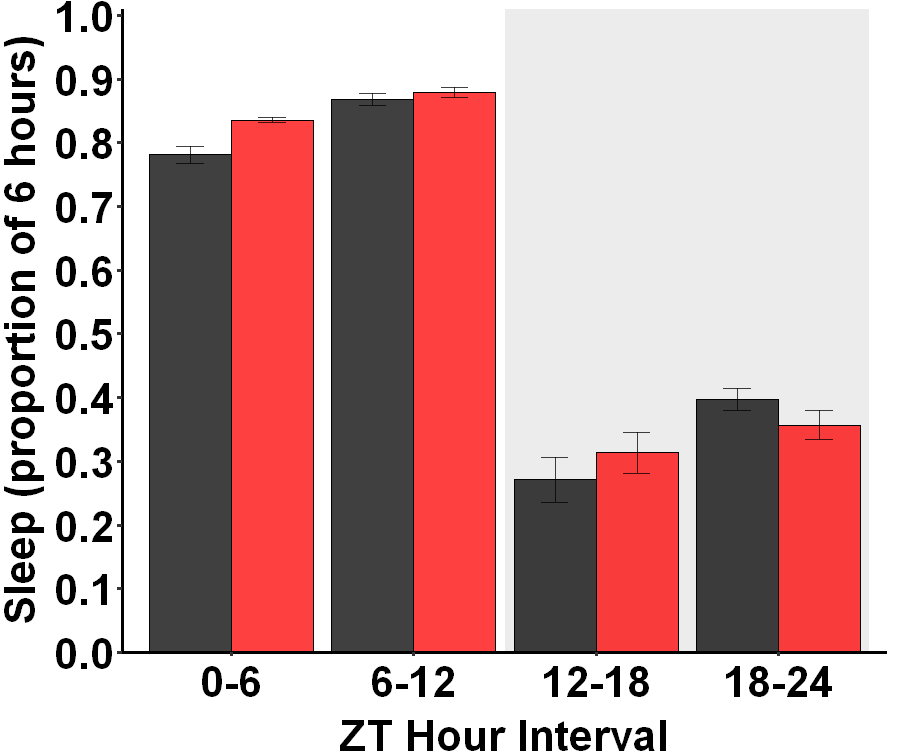

In [72]:
#Split-plot ANOVA - Baseline Total Sleep 6-Hour - Both Sexes
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")), dv=.(Sleep), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Bar Graph - Baseline Total Sleep 6-Hour - Both Sexes
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54) 
Sleep_Bar_Baseline(Six_Hour_Pivot,c("wild_type", "Dexras1 KO") )
    ggsave("Plots/BaseLine_SLeep_Bar_Interval.png",width=19, height=16,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd           F            p p<.05        ges
2             Animal_Type   1  16   0.2968515 5.933767e-01       0.00666722
3             start_pivot   3  48 285.3913679 1.372888e-30     * 0.91925136
4 Animal_Type:start_pivot   3  48   0.6726801 5.730057e-01       0.02613166

$`Mauchly's Test for Sphericity`
                   Effect         W          p p<.05
3             start_pivot 0.3775879 0.01380607     *
4 Animal_Type:start_pivot 0.3775879 0.01380607     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.7412633 3.018828e-23         * 0.8663348
4 Animal_Type:start_pivot 0.7412633 5.318433e-01           0.8663348
         p[HF] p[HF]<.05
3 8.488646e-27         *
4 5.531921e-01

`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


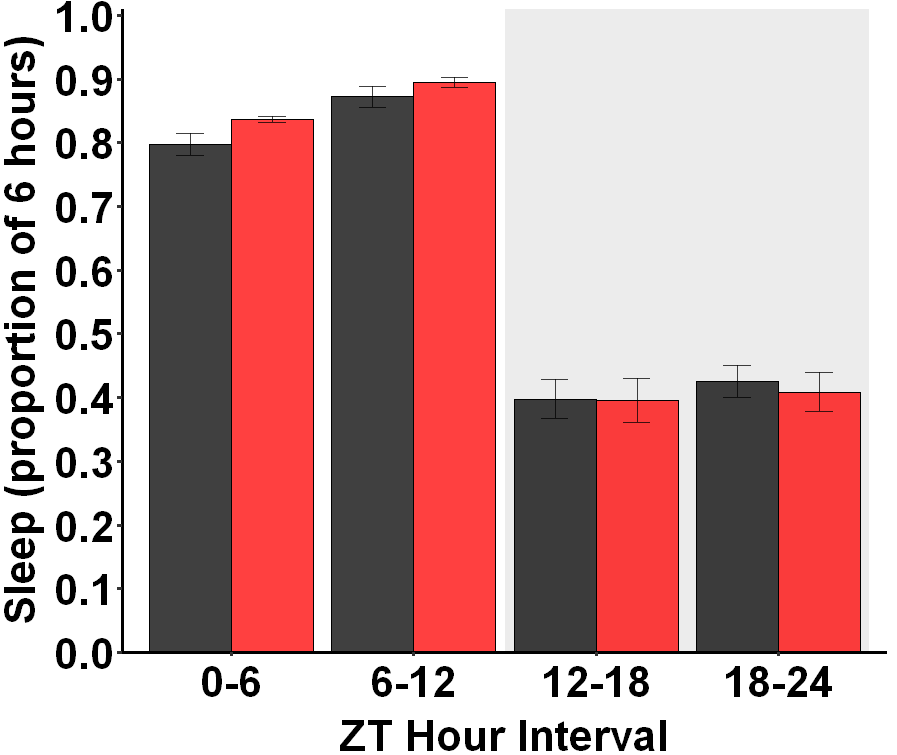

In [73]:
#split Plot ANOVA - Baseline Total Sleep 6-Hour - Males 
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Male"), dv=.(Sleep), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Bar Graph - Baseline Total Sleep 6-Hour - Males
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)  
Sleep_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Male"),c("wild_type Male", "Dexras1 KO Male") )
    ggsave("Plots/BaseLine_SLeep_Bar_Interval_M.png",width=19, height=16,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd          F            p p<.05        ges
2             Animal_Type   1  16   2.346452 1.451006e-01       0.03569689
3             start_pivot   3  48 514.237361 1.796645e-36     * 0.96004327
4 Animal_Type:start_pivot   3  48   5.366329 2.874265e-03     * 0.20046995

$`Mauchly's Test for Sphericity`
                   Effect         W          p p<.05
3             start_pivot 0.4059753 0.02124453     *
4 Animal_Type:start_pivot 0.4059753 0.02124453     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.6904134 7.242027e-26         * 0.7947845
4 Animal_Type:start_pivot 0.6904134 8.953099e-03         * 0.7947845
         p[HF] p[HF]<.05
3 1.913735e-29         *
4 6.088657e-03         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,start_pivot,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-06-24 09:00:00,Animal_Type,1,16,11.333000,0.004,*,4.15e-01,0.016
2,2022-06-24 15:00:00,Animal_Type,1,16,0.000319,0.986,,1.99e-05,0.986
3,2022-06-24 21:00:00,Animal_Type,1,16,3.909000,0.066,,1.96e-01,0.088
4,2022-06-25 03:00:00,Animal_Type,1,16,4.094000,0.060,,2.04e-01,0.088


`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


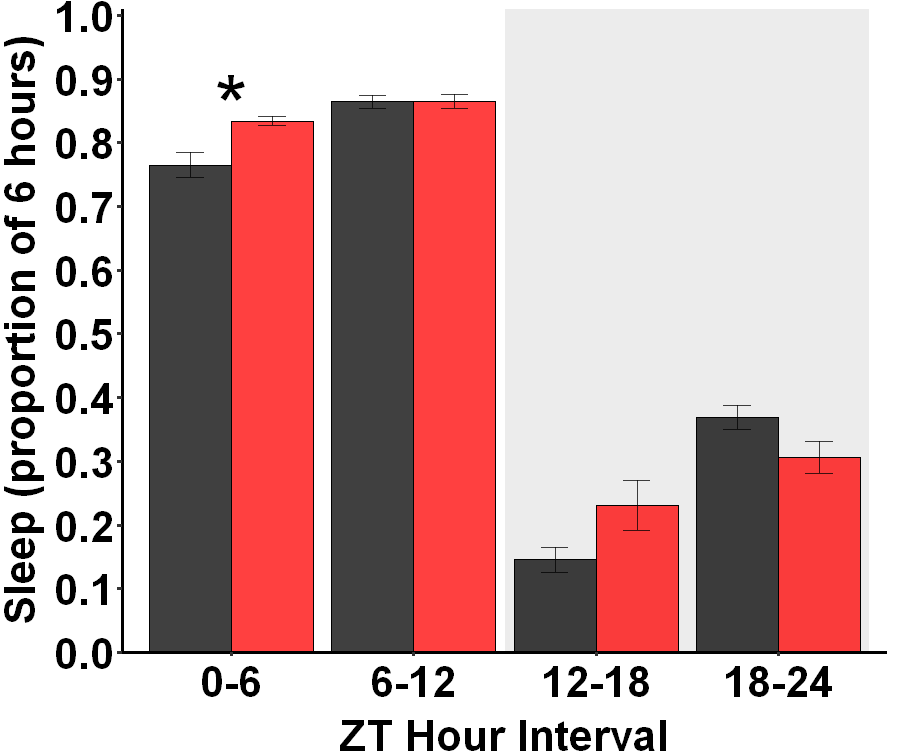

In [74]:
#split-plot ANOVA - Baseline Total Sleep 6-Hour - Females
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female"), dv=.(Sleep), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Post hoc tests - Baseline Total Sleep 6-Hour - Females
p_adjust_bar_sleep_female <- Six_Hour_Pivot%>%
      filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female")%>%
      group_by(start_pivot)%>%
      anova_test(dv = Sleep, wid = Animal_ID, between = Animal_Type)%>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
    p_adjust_bar_sleep_female
#Bar Graph - Baseline Total Sleep 6-Hour - Females 
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54) 
Sleep_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Female"),c("wild_type Female", "Dexras1 KO Female") )+
      annotate("text",x=1, y=.86, label="*", angle=0, size=18)
    ggsave("Plots/BaseLine_SLeep_Bar_Interval_F.png",width=19, height=16,units = "cm")
    

## <center> Daily Baseline Number of Bouts- 6 Hour Bins - Bar Graphs

In [75]:
NBouts_Bar_Baseline <- function(Data, label1){
      Data %>% 
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"))%>%
        mutate(Sleep=Sleep/360)%>%
        group_by(start_pivot, Animal_Type)%>%
        summarize(mean=mean(Bouts), sd=std.error(Bouts))%>%
        ggplot(aes(x=start_pivot, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 2.5,
                  xmax=4.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_x_discrete(labels=c("0-6", "6-12", "12-18", "18-24"))+
        scale_y_continuous(breaks=c(0,20,40,60),expand=expansion(mult=c(0,0.01)),limits=c(0,60))+
        labs(x="ZT Hour Interval", y="Number of Sleep Bouts/Six Hours")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank())
    }

Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd         F            p p<.05        ges
2             Animal_Type   1  34  1.513495 2.270509e-01       0.02571865
3             start_pivot   3 102 42.872077 5.213342e-18     * 0.33914527
4 Animal_Type:start_pivot   3 102  2.122841 1.019345e-01       0.02478134

$`Mauchly's Test for Sphericity`
                   Effect          W            p p<.05
3             start_pivot 0.04865827 1.007947e-19     *
4 Animal_Type:start_pivot 0.04865827 1.007947e-19     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.4174956 7.777736e-09         * 0.4258546
4 Animal_Type:start_pivot 0.4174956 1.483707e-01           0.4258546
         p[HF] p[HF]<.05
3 5.732141e-09         *
4 1.477171e-01

`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


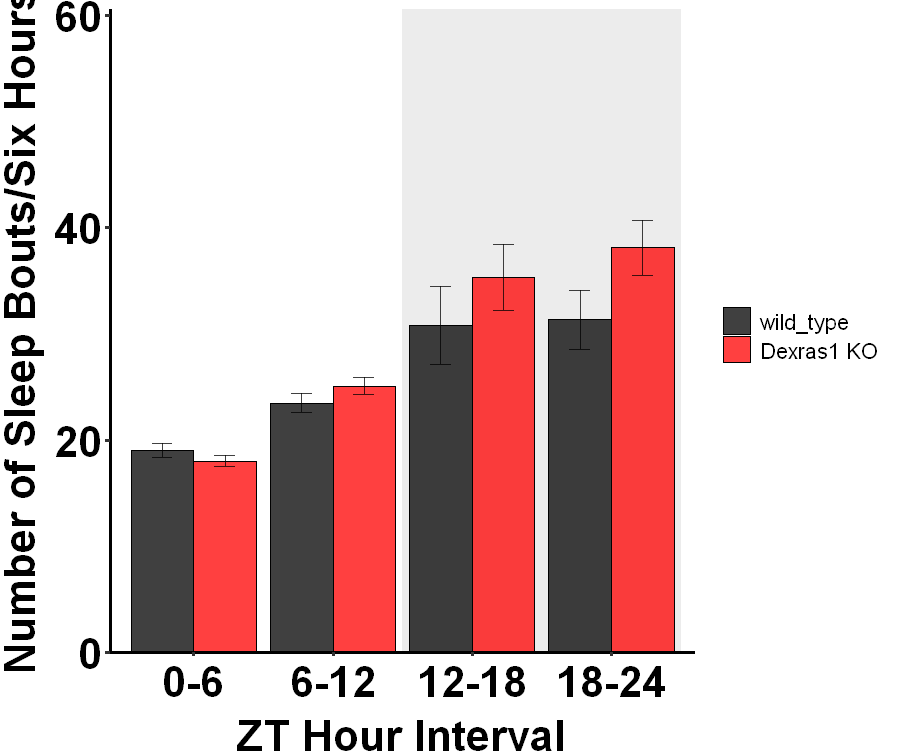

In [76]:
#split-plot ANOVA - Baseline Number of Sleep Bouts 6-Hour - Both Sexes
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")), dv=.(Bouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Bar graph - Baseline Number of Sleep Bouts 6-Hour - Both Sexes
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)     
NBouts_Bar_Baseline(Six_Hour_Pivot,c("wild_type", "Dexras1 KO") )
    ggsave("Plots/BaseLine_NBouts_Bar_Interval.png",width=19, height=16,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd           F            p p<.05        ges
2             Animal_Type   1  16   0.2821024 6.026224e-01       0.00998675
3             start_pivot   3  48 128.5475901 6.074024e-23     * 0.77465225
4 Animal_Type:start_pivot   3  48   1.8046352 1.589271e-01       0.04603736

$`Mauchly's Test for Sphericity`
                   Effect         W            p p<.05
3             start_pivot 0.1697782 8.917316e-05     *
4 Animal_Type:start_pivot 0.1697782 8.917316e-05     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.5348639 2.830759e-13         * 0.5853269
4 Animal_Type:start_pivot 0.5348639 1.891876e-01           0.5853269
         p[HF] p[HF]<.05
3 2.509949e-14         *
4 1.861104e-01

`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


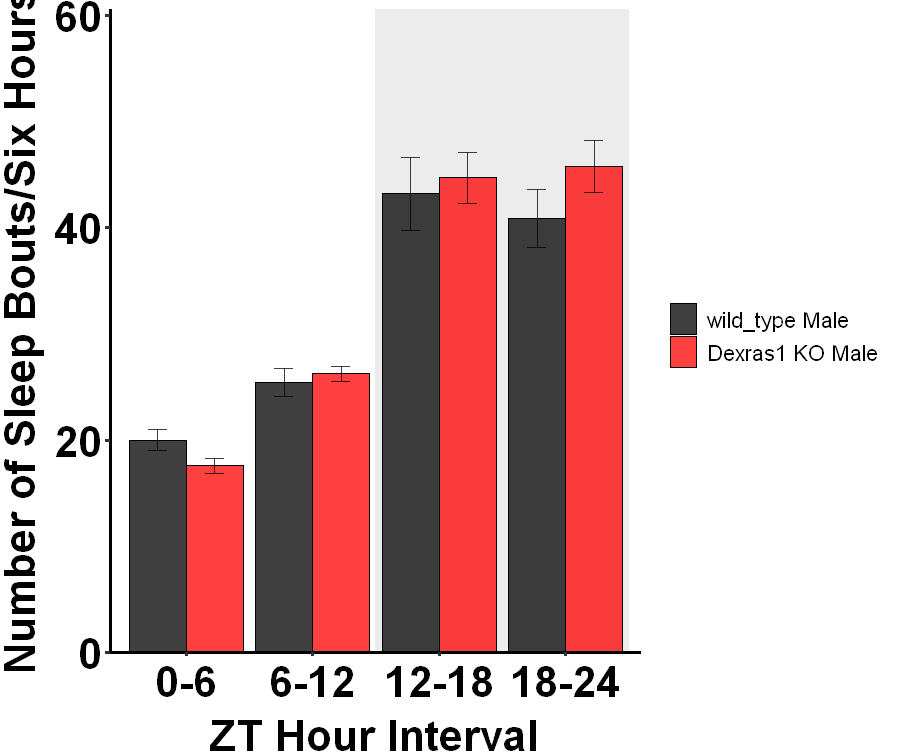

In [77]:
#split-plot ANOVA - Baseline Number of Sleep Bouts 6-Hour - Males
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Male"), dv=.(Bouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Bar graph - Baseline Number of Sleep Bouts 6-Hour - Males    
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54) 
NBouts_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Male"),c("wild_type Male", "Dexras1 KO Male") )
    ggsave("Plots/BaseLine_NBouts_Bar_Interval_M.png",width=19, height=16,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd        F            p p<.05        ges
2             Animal_Type   1  16 4.170548 5.797346e-02       0.14073482
3             start_pivot   3  48 9.541378 4.724565e-05     * 0.18142063
4 Animal_Type:start_pivot   3  48 3.616700 1.960226e-02     * 0.07749867

$`Mauchly's Test for Sphericity`
                   Effect         W            p p<.05
3             start_pivot 0.2287549 0.0006126735     *
4 Animal_Type:start_pivot 0.2287549 0.0006126735     *

$`Sphericity Corrections`
                   Effect       GGe       p[GG] p[GG]<.05       HFe
3             start_pivot 0.5743125 0.001125906         * 0.6371511
4 Animal_Type:start_pivot 0.5743125 0.046303404         * 0.6371511
         p[HF] p[HF]<.05
3 0.0007017299         *
4 0.0407371884         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,start_pivot,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-06-24 09:00:00,Animal_Type,1,16,0.218,0.647,,0.013,0.647
2,2022-06-24 15:00:00,Animal_Type,1,16,2.182,0.159,,0.120,0.212
3,2022-06-24 21:00:00,Animal_Type,1,16,2.763,0.116,,0.147,0.212
4,2022-06-25 03:00:00,Animal_Type,1,16,7.195,0.016,*,0.310,0.064


`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


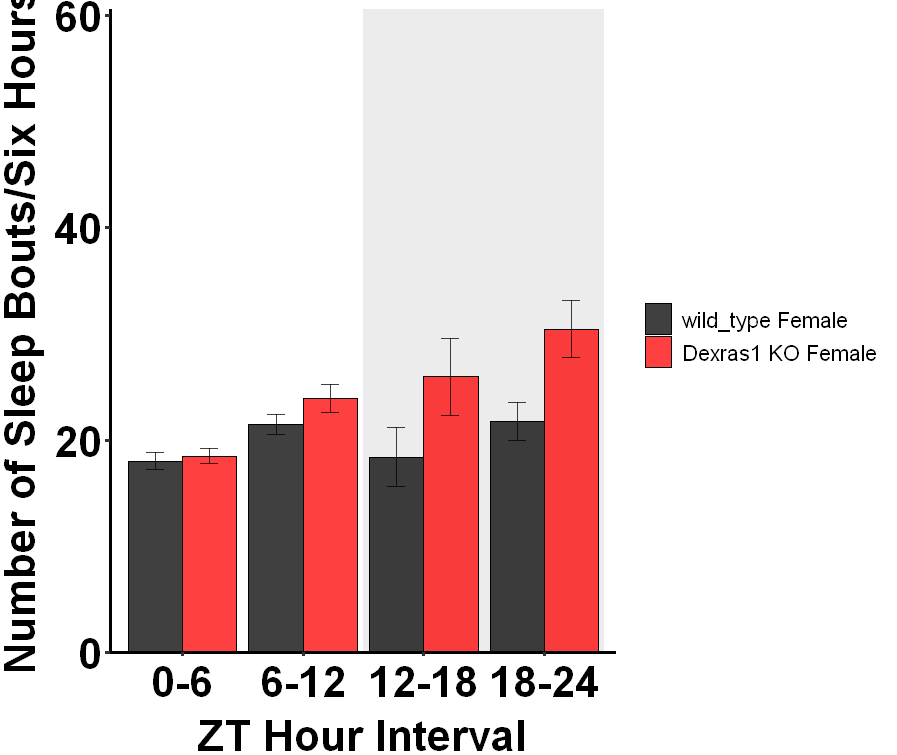

In [78]:
#split-plot ANOVA - Baseline Number of Sleep Bouts 6-Hour - Females
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female"), dv=.(Bouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#post-hoc tests - Baseline Number of Sleep Bouts 6-Hour - Females 
p_adjust_bar_nbouts_female <- Six_Hour_Pivot%>%
      filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female")%>%
      group_by(start_pivot)%>%
      anova_test(dv = Bouts, wid = Animal_ID, between = Animal_Type)%>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
p_adjust_bar_nbouts_female
#Bar Graph- Baseline Number of Sleep Bouts 6-Hour - Females
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)     
NBouts_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Female"),c("wild_type Female", "Dexras1 KO Female") )
    ggsave("Plots/BaseLine_NBouts_Bar_Interval_F.png",width=19, height=16,units = "cm")

## <center> Daily Baseline Length of Bouts- 6 Hour Bins - Bar Graphs

In [79]:
LBouts_Bar_Baseline <- function(Data, label1){
      Data %>% 
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"))%>%
        mutate(Sleep=Sleep/360)%>%
        group_by(start_pivot, Animal_Type)%>%
        summarize(mean=mean(LengthBouts), sd=std.error(LengthBouts))%>%
        ggplot(aes(x=start_pivot, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 2.5,
                  xmax=4.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_x_discrete(labels=c("0-6", "6-12", "12-18", "18-24"))+
        scale_y_continuous(breaks=c(0,10,20,30),expand=expansion(mult=c(0,0.01)),limits=c(0,31))+
        labs(x="ZT Hour Interval", y="Average Length of Sleep Bouts/Six Hours (minutes)")+
        theme_bw()+
        theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank())
    }

Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd            F            p p<.05         ges
2             Animal_Type   1  34   0.07776114 7.820438e-01       0.001002755
3             start_pivot   3 102 647.27852964 3.194333e-66     * 0.914400872
4 Animal_Type:start_pivot   3 102   7.08072774 2.271656e-04     * 0.104630064

$`Mauchly's Test for Sphericity`
                   Effect         W          p p<.05
3             start_pivot 0.6646962 0.02024725     *
4 Animal_Type:start_pivot 0.6646962 0.02024725     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.8375851 7.025437e-56         * 0.9098545
4 Animal_Type:start_pivot 0.8375851 5.873292e-04         * 0.9098545
         p[HF] p[HF]<.05
3 1.754015e-60         *
4 3.845425e-04         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,start_pivot,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-06-24 09:00:00,Animal_Type,1,34,4.734,0.037,*,0.122,0.0740000
2,2022-06-24 15:00:00,Animal_Type,1,34,0.974,0.331,,0.028,0.4413333
3,2022-06-24 21:00:00,Animal_Type,1,34,0.111,0.741,,0.003,0.7410000
4,2022-06-25 03:00:00,Animal_Type,1,34,11.270,0.002,*,0.249,0.0080000


`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


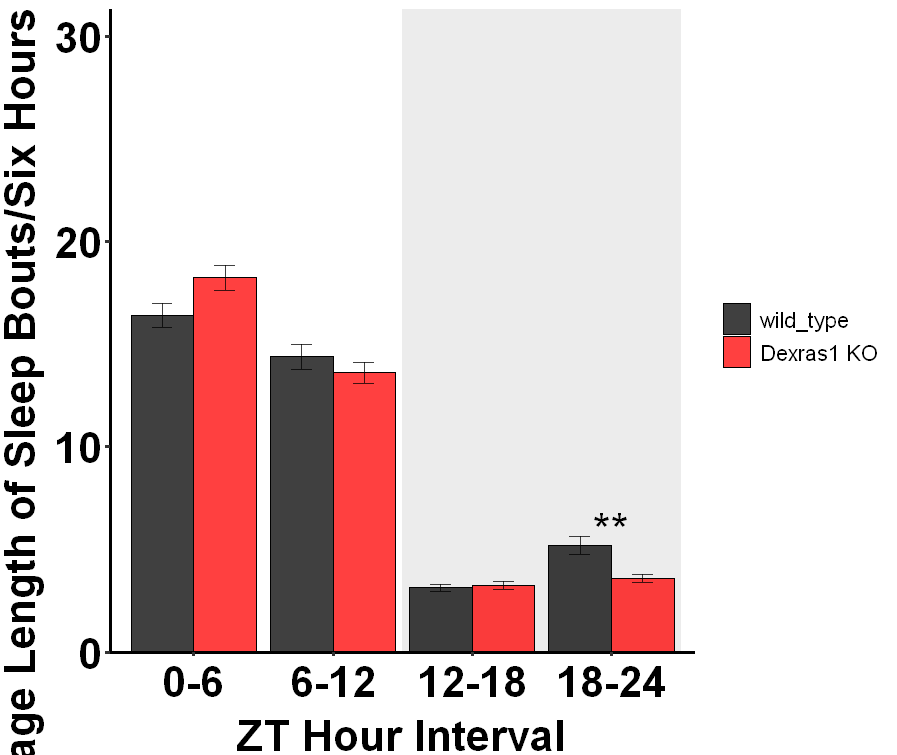

In [80]:
#split-plot ANOVA - Baseline Length of Sleep Bouts 6-Hour - Both Sexes
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Post hoc tests - Baseline Length of Sleep Bouts 6-Hour - Both Sexes    
p_adjust_bar_lbouts <- Six_Hour_Pivot%>%
      filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"))%>%
      group_by(start_pivot)%>%
      anova_test(dv = LengthBouts, wid = Animal_ID, between = Animal_Type)%>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
p_adjust_bar_lbouts
#bar Graph - Baseline Length of Sleep Bouts 6-Hour - Both Sexes    
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)     
LBouts_Bar_Baseline(Six_Hour_Pivot,c("wild_type", "Dexras1 KO") )+
      annotate("text",x=4, y=6, label="**", angle=0, size=10)
    ggsave("Plots/BaseLine_LBouts_Bar_Interval.png",width=19, height=16,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd          F            p p<.05        ges
2             Animal_Type   1  16   1.333414 2.651543e-01       0.02792349
3             start_pivot   3  48 354.809184 9.535317e-33     * 0.93561660
4 Animal_Type:start_pivot   3  48   5.840796 1.743470e-03     * 0.19304212

$`Mauchly's Test for Sphericity`
                   Effect         W           p p<.05
3             start_pivot 0.2926238 0.002901647     *
4 Animal_Type:start_pivot 0.2926238 0.002901647     *

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.7046579 9.948865e-24         * 0.8146692
4 Animal_Type:start_pivot 0.7046579 5.875224e-03         * 0.8146692
         p[HF] p[HF]<.05
3 4.326457e-27         *
4 3.727117e-03         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,start_pivot,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-06-24 09:00:00,Animal_Type,1,16,6.929,0.018,*,0.302,0.072
2,2022-06-24 15:00:00,Animal_Type,1,16,0.057,0.815,,0.004,0.815
3,2022-06-24 21:00:00,Animal_Type,1,16,0.104,0.751,,0.006,0.815
4,2022-06-25 03:00:00,Animal_Type,1,16,2.480,0.135,,0.134,0.270


`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


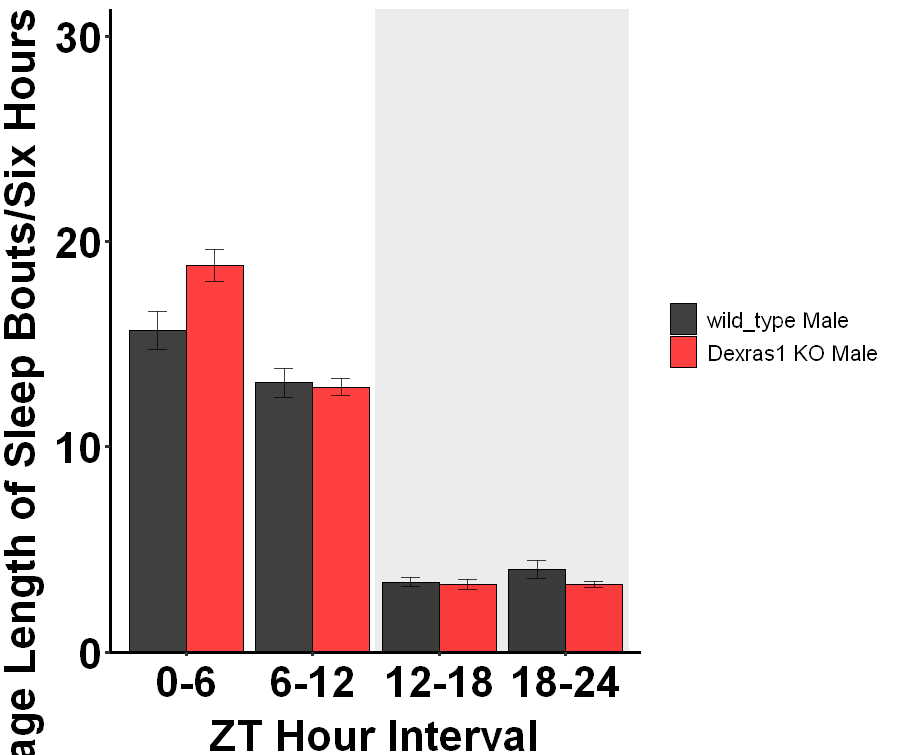

In [81]:
#split-plot ANOVA - Baseline Length of Sleep Bouts 6-Hour - Males
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Male"), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Post hoc tests - Baseline Length of Sleep Bouts 6-Hour - Males
p_adjust_bar_lbouts_male <- Six_Hour_Pivot%>%
      filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Male")%>%
      group_by(start_pivot)%>%
      anova_test(dv = LengthBouts, wid = Animal_ID, between = Animal_Type)%>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
p_adjust_bar_lbouts_male
#bar Graph - Baseline Length of Sleep Bouts 6-Hour - Males
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)       
LBouts_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Male"),c("wild_type Male", "Dexras1 KO Male") )
    ggsave("Plots/BaseLine_LBouts_Bar_Interval_M.png",width=19, height=16,units = "cm")
    

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."
Warning message:
"You have removed one or more levels from variable "start_pivot". Refactoring for ANOVA."


$ANOVA
                   Effect DFn DFd          F            p p<.05        ges
2             Animal_Type   1  16   1.437512 2.479987e-01       0.04300868
3             start_pivot   3  48 370.474070 3.535396e-33     * 0.92046028
4 Animal_Type:start_pivot   3  48   3.595229 2.008399e-02     * 0.10096407

$`Mauchly's Test for Sphericity`
                   Effect         W         p p<.05
3             start_pivot 0.5678103 0.1396342      
4 Animal_Type:start_pivot 0.5678103 0.1396342      

$`Sphericity Corrections`
                   Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot 0.7441491 2.949828e-25         * 0.8704429
4 Animal_Type:start_pivot 0.7441491 3.341173e-02         * 0.8704429
         p[HF] p[HF]<.05
3 3.612815e-29         *
4 2.596181e-02         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,start_pivot,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-06-24 09:00:00,Animal_Type,1,16,0.175,0.681,,0.011,0.6810000
2,2022-06-24 15:00:00,Animal_Type,1,16,1.295,0.272,,0.075,0.5440000
3,2022-06-24 21:00:00,Animal_Type,1,16,0.559,0.466,,0.034,0.6213333
4,2022-06-25 03:00:00,Animal_Type,1,16,15.147,0.001,*,0.486,0.0040000


`summarise()` has grouped output by 'start_pivot'. You can override using the `.groups` argument.


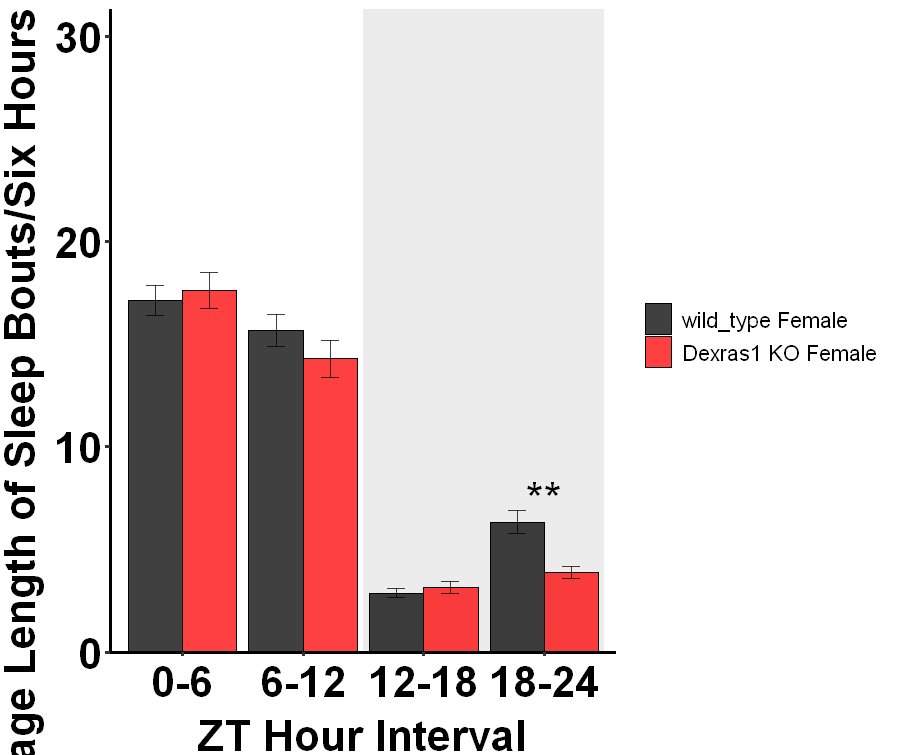

In [82]:
#split-plot ANOVA - Baseline Length of Sleep Bouts 6-Hour - Females
ezANOVA(Six_Hour_Pivot%>%filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female"), dv=.(LengthBouts), wid=.(Animal_ID), within=.(start_pivot), between=.(Animal_Type))
#Post hoc tests - Baseline Length of Sleep Bouts 6-Hour - Females    
p_adjust_bar_lbouts_female <- Six_Hour_Pivot%>%
      filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00"), Sex=="Female")%>%
      group_by(start_pivot)%>%
      anova_test(dv = LengthBouts, wid = Animal_ID, between = Animal_Type)%>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
   p_adjust_bar_lbouts_female
#Bar graph - Baseline Length of Sleep Bouts 6-Hour - Females
options(repr.plot.width=19/2.54, repr.plot.height=16/2.54)       
    LBouts_Bar_Baseline(Six_Hour_Pivot%>%filter(Sex=="Female"),c("wild_type Female", "Dexras1 KO Female") )+
      annotate("text",x=4, y=7.5, label="**", angle=0, size=10)
    ggsave("Plots/BaseLine_LBouts_Bar_Interval_F.png",width=19, height=16,units = "cm")

# <center> Sleep Deprivation Analysis: Sleep, Number of Bouts, and Length of Bouts in 6 Hour Bins - Line Graphs

Baseline recordings were taken for 7 days, after which animals were sleep deprived for 6 hours, and placed back in the cabinets for post-deprivation recordings. We will analyze the effects of sleep deprivation on Dexras1 KO Vs C57 wild-type mice. To have an indication of sleep deprivation differences, we can plot a line graph of the hours following sleep deprivation. We can plot the average baseline data into the same line graphs for completeness using the Six_Hour_Pivot dataframe:

In [83]:
head(Six_Hour_Pivot)

start_pivot,Animal_Type,Animal_ID,Sleep,Bouts,LengthBouts,Sex
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
2022-06-24 09:00:00,C57,C57_Female_1,266.4024,15.28571,19.80571,Female
2022-06-24 09:00:00,C57,C57_Female_2,262.4262,20.42857,13.55254,Female
2022-06-24 09:00:00,C57,C57_Female_3,244.2786,21.42857,15.61767,Female
2022-06-24 09:00:00,C57,C57_Female_4,284.2976,17.14286,17.69511,Female
2022-06-24 09:00:00,C57,C57_Female_5,304.5714,17.85714,17.42390,Female
2022-06-24 09:00:00,C57,C57_Female_6,258.7500,14.14286,20.98409,Female


## <center> Sleep Deprivation - Total Sleep in 6 Hour Intervals - Line Graphs

In [84]:
Sleep_Line <- function(HOUR, label1){
  rbind(HOUR%>%mutate(mid_hour=ymd_hms(start_pivot)+hours(3))%>%
      group_by(Animal_Type, mid_hour)%>%
      summarize(meanSleep=mean(Sleep/360), sdSleep=std.error(Sleep/360),
                meanBouts=mean(Bouts),sdBouts=std.error(Bouts),
                meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts)),
              data.frame(Animal_Type=c("C57", "Dexras1KO"), 
                             mid_hour=c(ymd_hms("2022-06-25T12:00:00"),
                                        ymd_hms("2022-06-25T12:00:00")),
                             meanSleep=c(NA, NA),sdSleep=c(NA, NA),
                             meanBouts=c(NA, NA),sdBouts=c(NA, NA),
                             meanBoutLength=c(NA, NA),sdBoutLength=c(NA, NA)))%>%
      ggplot(aes(x=mid_hour, y=meanSleep))+
      scale_x_datetime(breaks=c(ymd_hms("2022-06-24T09:00:00"),
                                ymd_hms("2022-06-25T09:00:00"),
                                ymd_hms("2022-06-26T09:00:00"),
                                ymd_hms("2022-06-27T09:00:00"),
                                ymd_hms("2022-06-28T09:00:00")), labels=c("Baseline",0,1,2,3))+
      scale_y_continuous(breaks=c(0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1),limits = c(0,1),expand=expansion(mult=c(0,0.01)))+
      geom_rect(xmin = -Inf,
                xmax=ymd_hms("2022-06-24T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-24T21:00:00"),
                xmax=ymd_hms("2022-06-25T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-25T21:00:00"),
                xmax=ymd_hms("2022-06-26T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-26T21:00:00"),
                xmax=ymd_hms("2022-06-27T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-27T21:00:00"),
                xmax=ymd_hms("2022-06-28T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
    geom_line(size = 1.1,aes(color=Animal_Type))+
    geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
    geom_errorbar(aes(ymax=meanSleep+sdSleep, ymin=meanSleep-sdSleep, color=Animal_Type),width=6000)+
    labs(x="Days Since Deprivation", y="Sleep (proportion of 6 hours)")+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=+1.8),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(),
            legend.position="none")+
    scale_color_manual(values=c("black", "red"), labels=label1)+
    scale_shape_manual(values=c("square", "circle"), labels=label1)+
    coord_cartesian(ylim = c(0, 1), clip = "off")+
    annotation_custom(textGrob("SD",gp=gpar(fontsize=18, fontface="bold")),xmin=ymd_hms("2022-06-25T12:00:00"),
                      xmax=ymd_hms("2022-06-25T12:00:00"),ymin=-.04, ymax=-.04)+
      geom_segment(y=-.0125, yend=-.0125, x=ymd_hms("2022-06-25T09:00:00"), 
               xend=ymd_hms("2022-06-25T15:00:00"), arrow=arrow(ends = "both", 
                                                                            length=unit(.3,"cm")), size=1)+
    geom_vline(xintercept=ymd_hms("2022-06-25T09:00:00"),linetype="longdash", size=1.1)+ 
      geom_vline(xintercept=ymd_hms("2022-06-25T15:00:00"), linetype="longdash", size=1.1)
  }

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


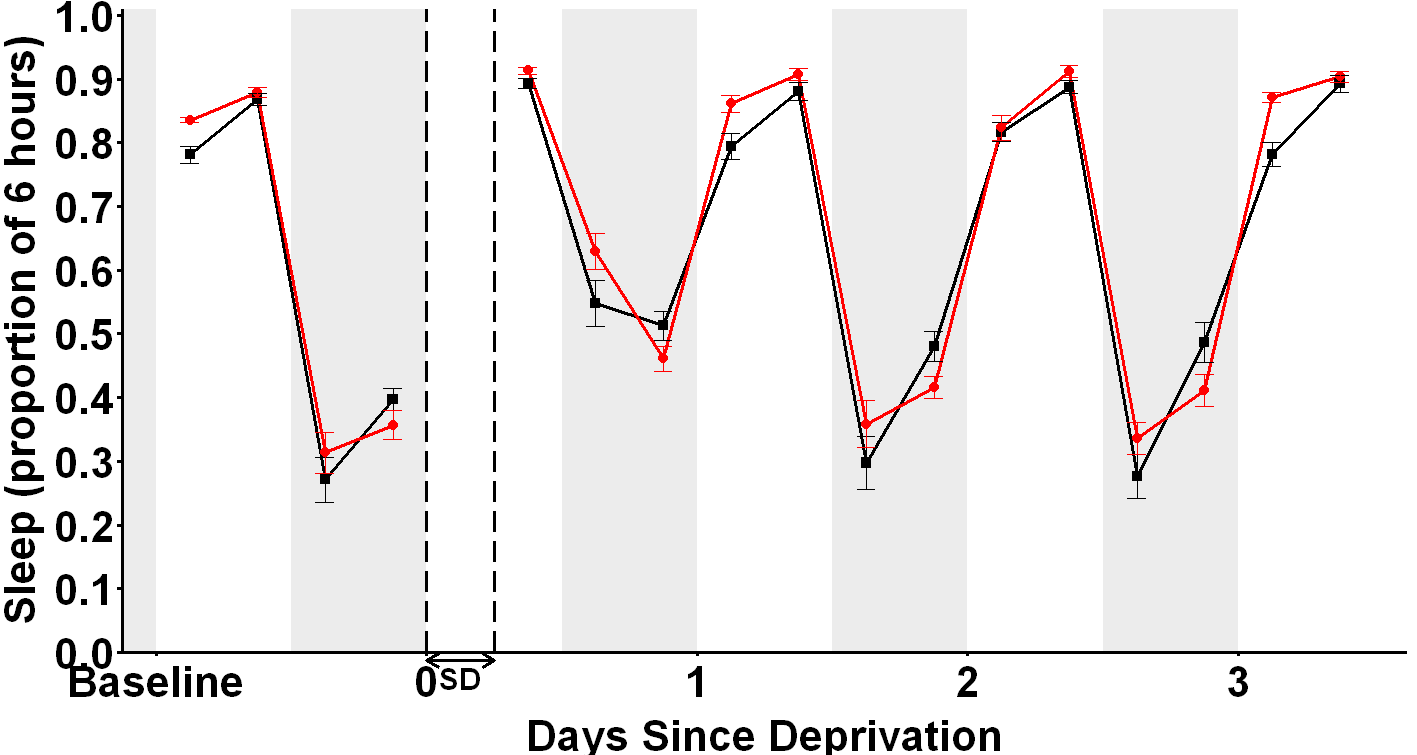

In [85]:
#Line Graph - Total Sleep 6 Hour -Deprivation - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
Sleep_Line(HOUR=Six_Hour_Pivot, 
              label1=c("wild-type", "Dexras1 KO"))
  ggsave("Plots/6H_LINE_DEPRIVATION.png",width=30, height=16,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


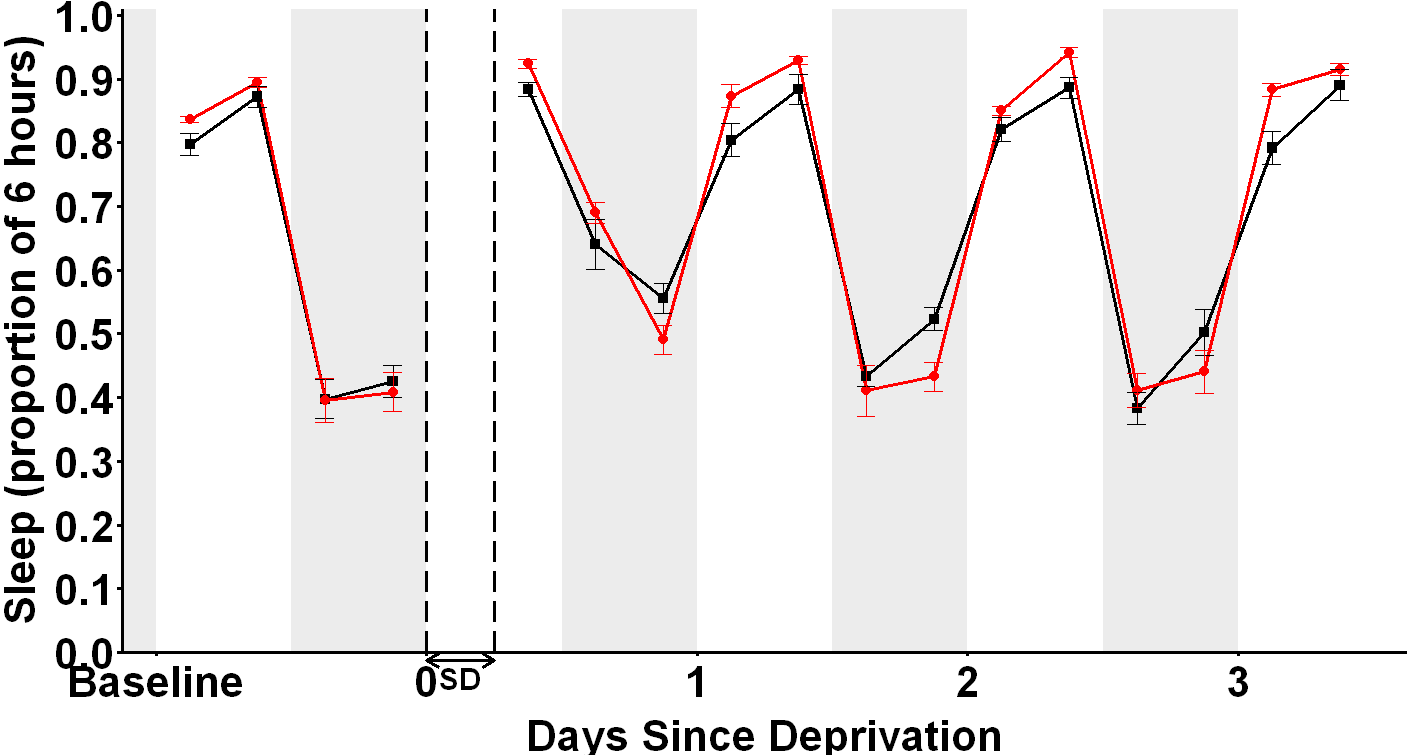

In [86]:
#Line Graph - Total Sleep 6 Hour -Deprivation - Males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
Sleep_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Male"), 
             label1=c("wild-type Male", "Dexras1 KO Male"))
  ggsave("Plots/6H_LINE_DEPRIVATION_M.png",width=30, height=16,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


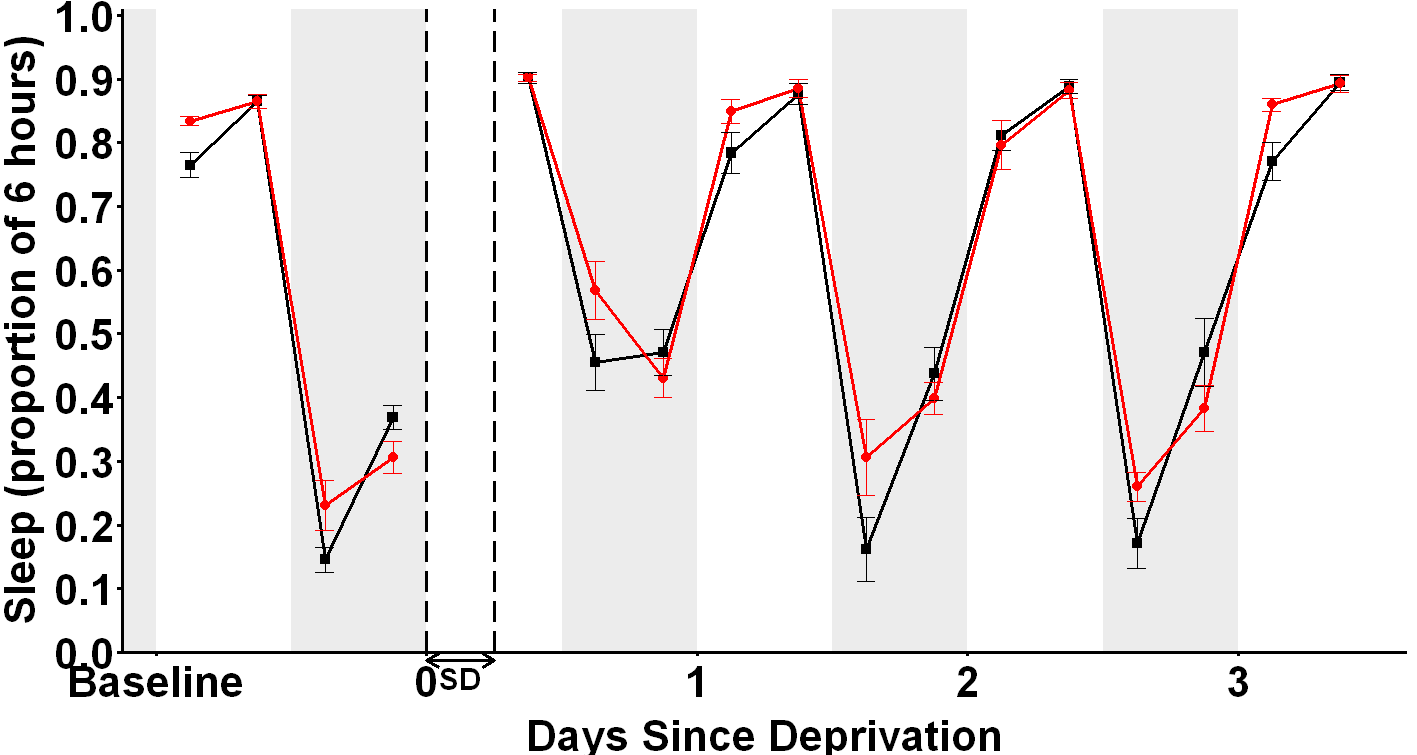

In [87]:
#Line Graph - Total Sleep 6 Hour -Deprivation - Females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54) 
Sleep_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Female"), 
             label1=c("wild-type Female", "Dexras1 KO Female"))
  ggsave("Plots/6H_LINE_DEPRIVATION_F.png",width=30, height=16,units = "cm")

## <center> Sleep Deprivation - Number of Bouts in 6 Hour Intervals - Line Graphs

In [88]:
NBouts_Line <- function(HOUR, label1){
    rbind(HOUR%>%mutate(mid_hour=ymd_hms(start_pivot)+hours(3))%>%
            group_by(Animal_Type, mid_hour)%>%
            summarize(meanSleep=mean(Sleep/360), sdSleep=std.error(Sleep/360),
                      meanBouts=mean(Bouts),sdBouts=std.error(Bouts),
                      meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts)),
          data.frame(Animal_Type=c("C57", "Dexras1KO"), 
                     mid_hour=c(ymd_hms("2022-06-25T12:00:00"),
                                ymd_hms("2022-06-25T12:00:00")),
                     meanSleep=c(NA, NA),sdSleep=c(NA, NA),
                     meanBouts=c(NA, NA),sdBouts=c(NA, NA),
                     meanBoutLength=c(NA, NA),sdBoutLength=c(NA, NA)))%>%
      ggplot(aes(x=mid_hour, y=meanBouts))+
      scale_x_datetime(breaks=c(ymd_hms("2022-06-24T09:00:00"),
                                ymd_hms("2022-06-25T09:00:00"),
                                ymd_hms("2022-06-26T09:00:00"),
                                ymd_hms("2022-06-27T09:00:00"),
                                ymd_hms("2022-06-28T09:00:00")), labels=c("Baseline",0,1,2,3))+
      scale_y_continuous(breaks=c(0,20,40,60),limits = c(0,64),expand=expansion(mult=c(0,0.01)))+
      geom_rect(xmin = -Inf,
                xmax=ymd_hms("2022-06-24T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-24T21:00:00"),
                xmax=ymd_hms("2022-06-25T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-25T21:00:00"),
                xmax=ymd_hms("2022-06-26T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-26T21:00:00"),
                xmax=ymd_hms("2022-06-27T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-27T21:00:00"),
                xmax=ymd_hms("2022-06-28T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_line(size = 1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
      geom_errorbar(aes(ymax=meanBouts+sdBouts, ymin=meanBouts-sdBouts, color=Animal_Type),width=6000)+
      labs(x="Days Since Deprivation", y="Number of Sleep Bouts/Six Hours")+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=+1.8),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(),
            legend.position = "none")+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)+
      coord_cartesian(ylim = c(0, 64), clip = "off")+
      annotation_custom(textGrob("SD",gp=gpar(fontsize=18, fontface="bold")),xmin=ymd_hms("2022-06-25T12:00:00"),
                        xmax=ymd_hms("2022-06-25T12:00:00"),ymin=-2.5, ymax=-2.5)+
      geom_segment(y=-.8, yend=-.8, x=ymd_hms("2022-06-25T09:00:00"), 
                   xend=ymd_hms("2022-06-25T15:00:00"), arrow=arrow(ends = "both", 
                                                                    length=unit(.3,"cm")), size=1)+
      geom_vline(xintercept=ymd_hms("2022-06-25T09:00:00"),linetype="longdash", size=1.1)+ 
      geom_vline(xintercept=ymd_hms("2022-06-25T15:00:00"), linetype="longdash", size=1.1)
  }

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


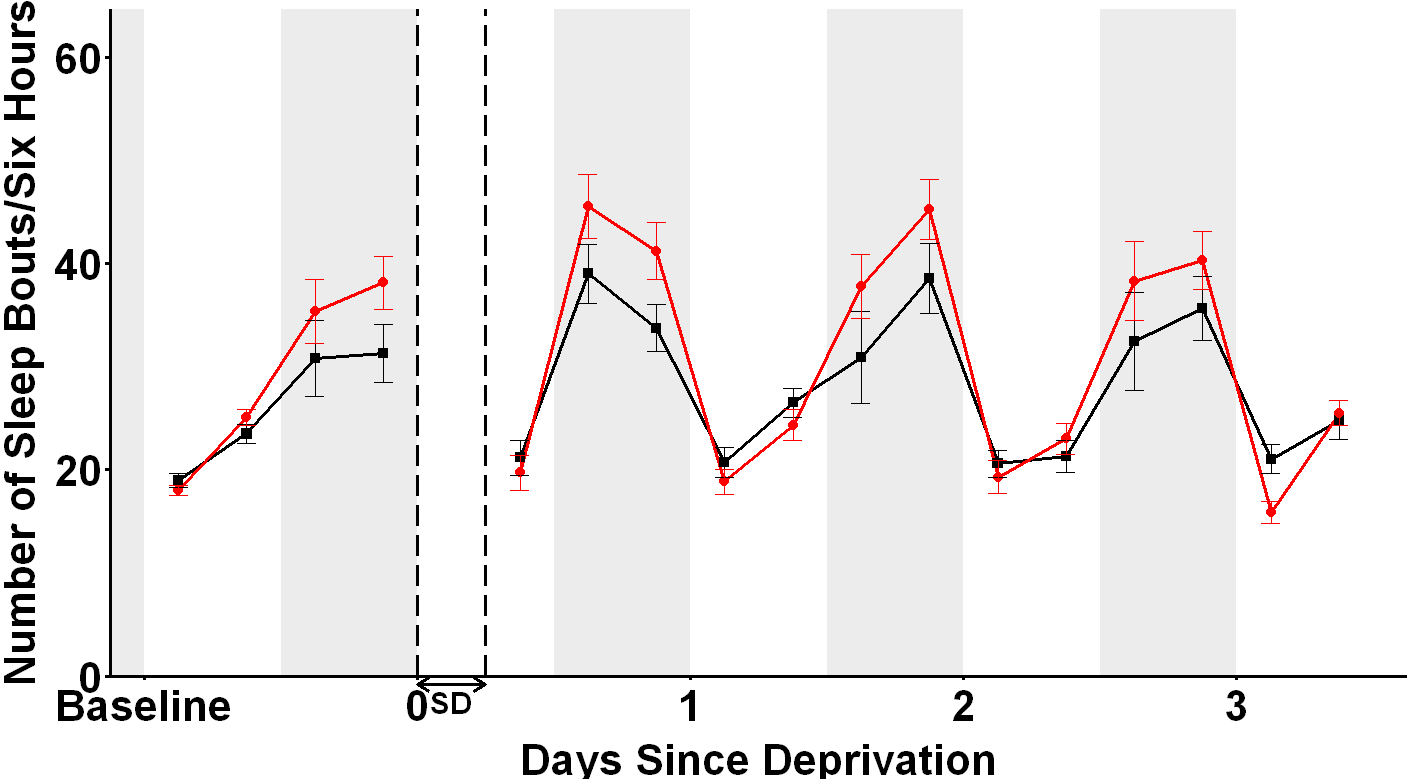

In [89]:
#Line Graph - Number of Bouts 6 Hour -Deprivation - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16.5/2.54)  
NBouts_Line(HOUR=Six_Hour_Pivot, 
             label1=c("wild-type", "Dexras1 KO"))
  ggsave("Plots/6H_DEPRIVATION_Number_Bouts_Line_Plot.png",width=30, height=16.5,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


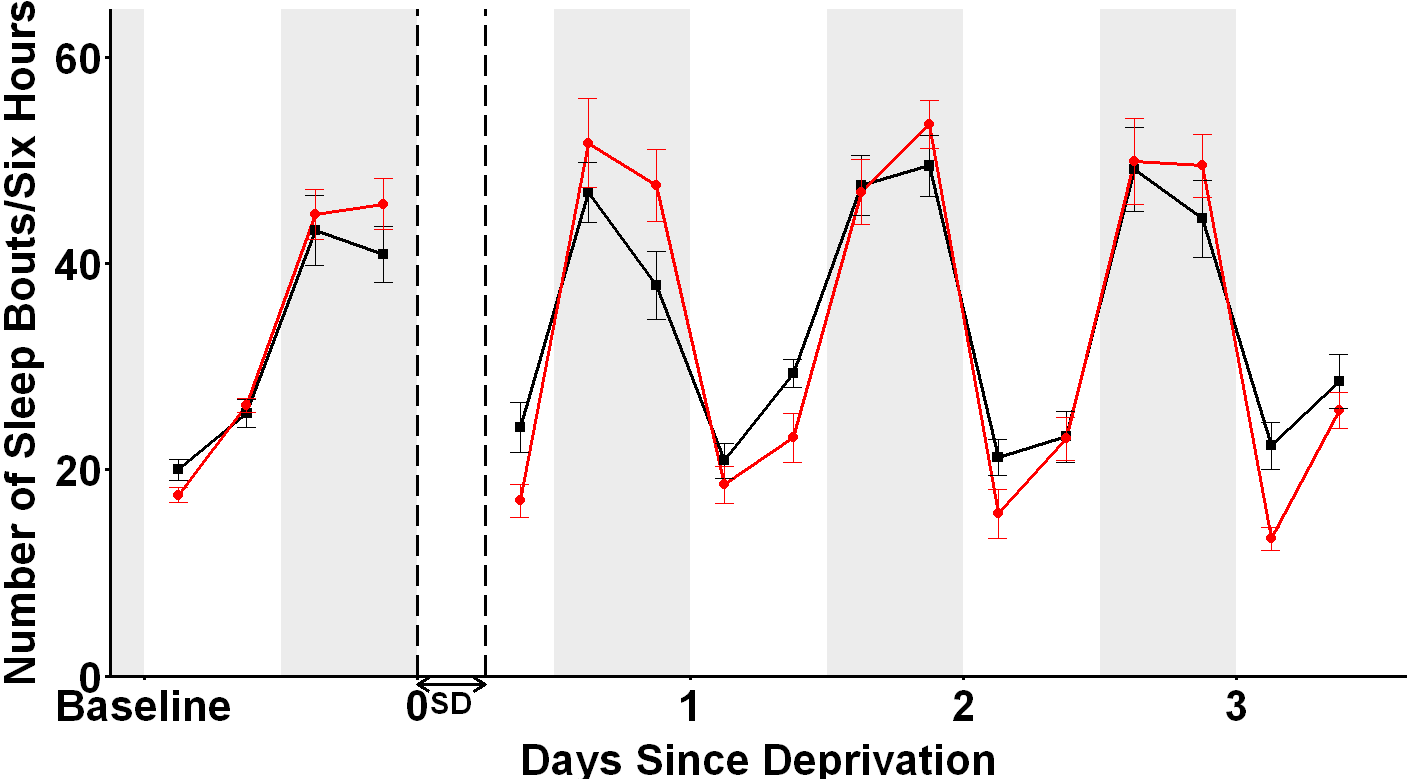

In [90]:
#Line Graph - Number of Bouts 6 Hour -Deprivation - Males
options(repr.plot.width=30/2.54, repr.plot.height=16.5/2.54)  
NBouts_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Male"), 
              label1=c("wild-type Male", "Dexras1 KO Male"))
  ggsave("Plots/6H_DEPRIVATION_Number_Bouts_Line_Plot_M.png",width=30, height=16.5,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


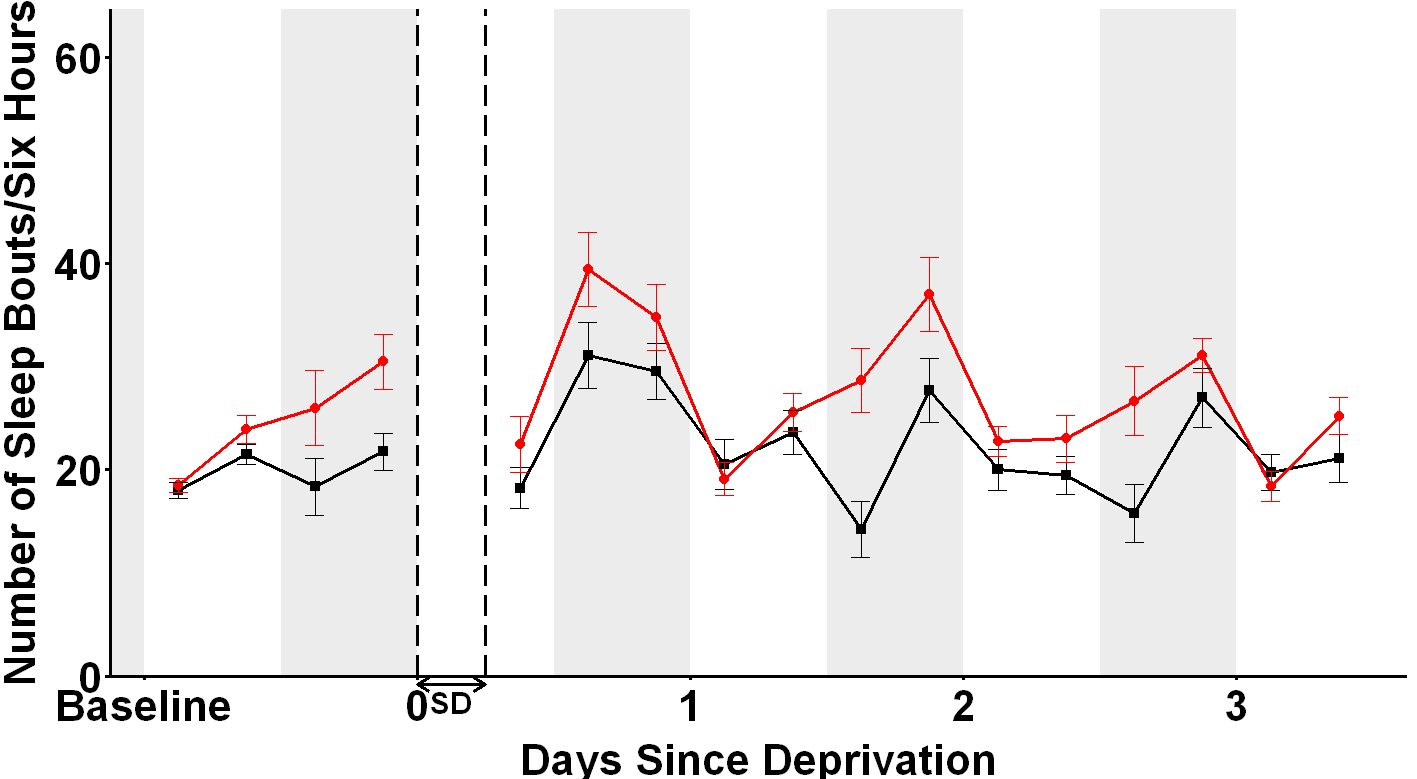

In [91]:
#Line Graph - Number of Bouts 6 Hour -Deprivation  - Females
options(repr.plot.width=30/2.54, repr.plot.height=16.5/2.54)  
NBouts_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Female"), 
              label1=c("wild-type Female", "Dexras1 KO Female"))
  ggsave("Plots/6H_DEPRIVATION_Number_Bouts_Line_Plot_F.png",width=30, height=16.5,units = "cm")

## <center> Sleep Deprivation - Length of Bouts in 6 Hour Intervals - Line Graphs

In [92]:
 BoutLength_Line<- function(HOUR, label1){
    rbind(HOUR%>%mutate(mid_hour=ymd_hms(start_pivot)+hours(3))%>%
            group_by(Animal_Type, mid_hour)%>%
            summarize(meanSleep=mean(Sleep/360), sdSleep=std.error(Sleep/360),
                      meanBouts=mean(Bouts),sdBouts=std.error(Bouts),
                      meanBoutLength=mean(LengthBouts), sdBoutLength=std.error(LengthBouts)),
          data.frame(Animal_Type=c("C57", "Dexras1KO"), 
                     mid_hour=c(ymd_hms("2022-06-25T12:00:00"),
                                ymd_hms("2022-06-25T12:00:00")),
                     meanSleep=c(NA, NA),sdSleep=c(NA, NA),
                     meanBouts=c(NA, NA),sdBouts=c(NA, NA),
                     meanBoutLength=c(NA, NA),sdBoutLength=c(NA, NA)))%>%
      ggplot(aes(x=mid_hour, y=meanBoutLength))+
      scale_x_datetime(breaks=c(ymd_hms("2022-06-24T09:00:00"),
                                ymd_hms("2022-06-25T09:00:00"),
                                ymd_hms("2022-06-26T09:00:00"),
                                ymd_hms("2022-06-27T09:00:00"),
                                ymd_hms("2022-06-28T09:00:00")), labels=c("Baseline",0,1,2,3))+
      scale_y_continuous(breaks=c(0,10,20,30,40,50),limits = c(0,41),expand=expansion(mult=c(0,0.01)))+
      geom_rect(xmin = -Inf,
                xmax=ymd_hms("2022-06-24T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-24T21:00:00"),
                xmax=ymd_hms("2022-06-25T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-25T21:00:00"),
                xmax=ymd_hms("2022-06-26T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-26T21:00:00"),
                xmax=ymd_hms("2022-06-27T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_rect(xmin = ymd_hms("2022-06-27T21:00:00"),
                xmax=ymd_hms("2022-06-28T09:00:00"),ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
      geom_line(size = 1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type ), size=2.5)+
      geom_errorbar(aes(ymax=meanBoutLength+sdBoutLength, ymin=meanBoutLength-sdBoutLength, color=Animal_Type),width=6000)+
      labs(x="Days Since Deprivation", y="Avg Length of Sleep Bouts (min)")+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=+1.8),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank(), 
            legend.position="none")+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)+
      coord_cartesian(ylim = c(0, 41), clip = "off")+
      annotation_custom(textGrob("SD",gp=gpar(fontsize=18, fontface="bold")),xmin=ymd_hms("2022-06-25T12:00:00"),
                        xmax=ymd_hms("2022-06-25T12:00:00"),ymin=-1.5, ymax=-1.5)+
      geom_segment(y=-0.5125, yend=-0.5125, x=ymd_hms("2022-06-25T09:00:00"), 
                   xend=ymd_hms("2022-06-25T15:00:00"), arrow=arrow(ends = "both", 
                                                                    length=unit(.3,"cm")), size=1)+
      geom_vline(xintercept=ymd_hms("2022-06-25T09:00:00"),linetype="longdash", size=1.1)+ 
      geom_vline(xintercept=ymd_hms("2022-06-25T15:00:00"), linetype="longdash", size=1.1)
  }

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


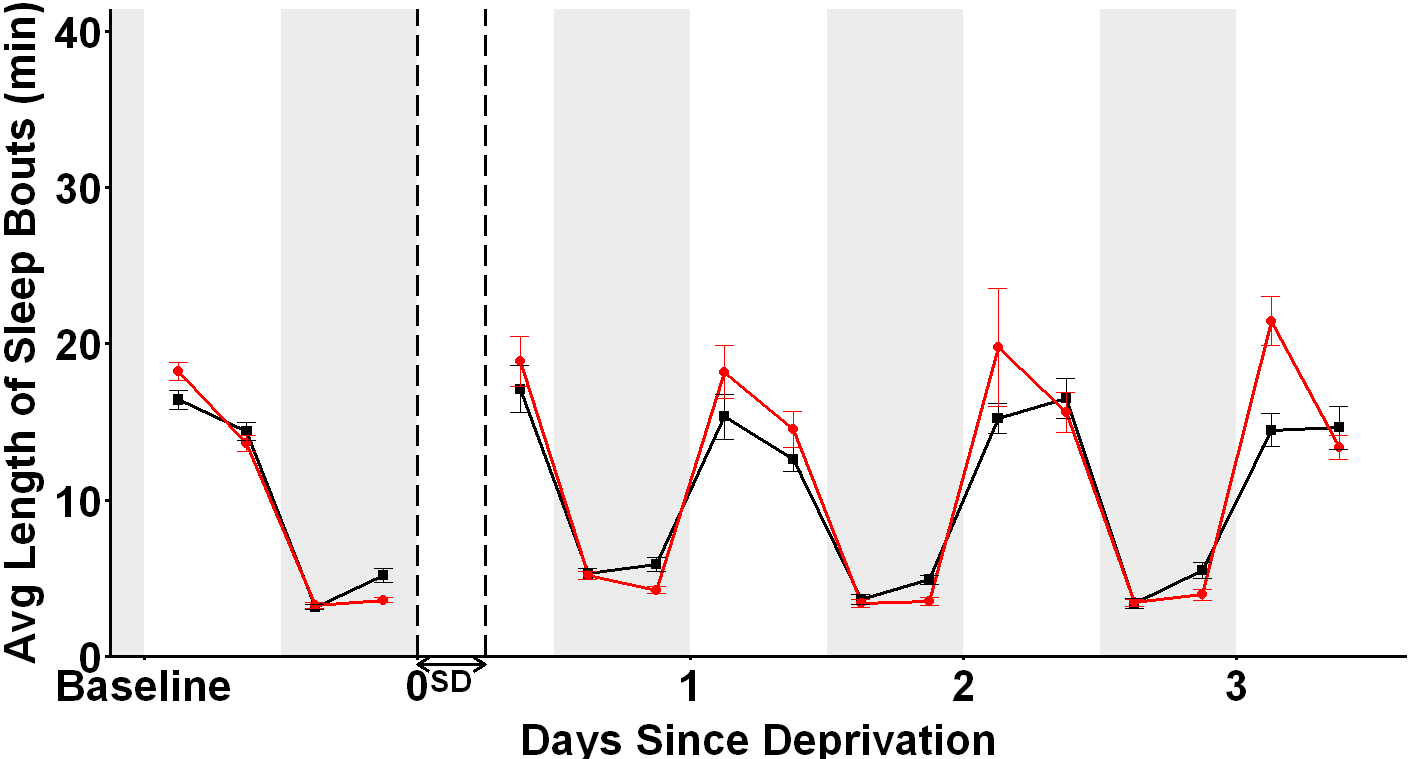

In [93]:
#Line Graph - Length of Bouts 6 Hour -Deprivation  - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16.07/2.54)   
BoutLength_Line(HOUR=Six_Hour_Pivot,
              label1=c("wild-type", "Dexras1 KO"))
  ggsave("Plots/6H_DEPRIVATION_Bout_Length_Line_Plot.png",width=30, height=16.07,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


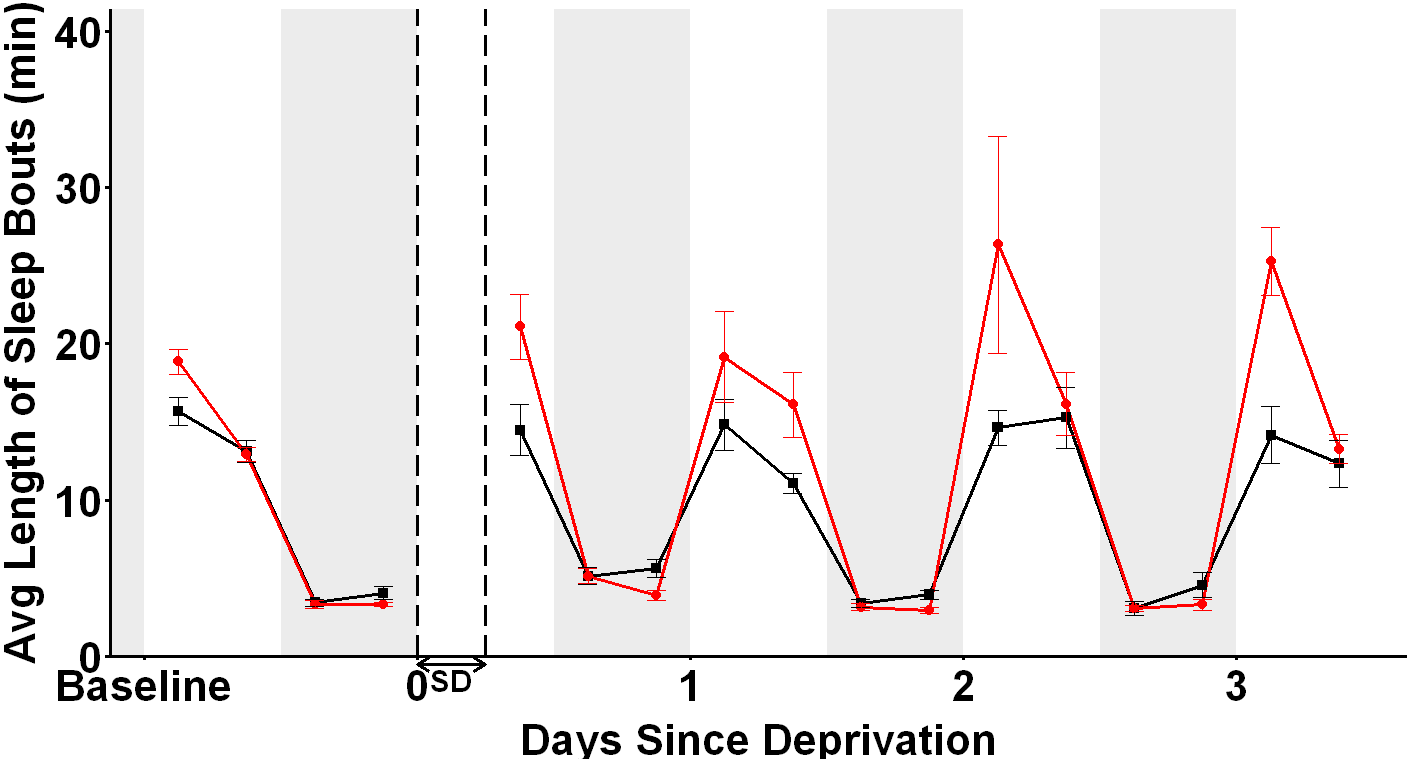

In [94]:
#Line Graph - Length of Bouts 6 Hour -Deprivation  - Males
options(repr.plot.width=30/2.54, repr.plot.height=16.07/2.54)   
BoutLength_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Male"),
                  label1=c("wild-type Male", "Dexras1 KO Male"))
  ggsave("Plots/6H_DEPRIVATION_Bout_Length_Line_Plot_M.png",width=30, height=16.07,units = "cm")

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


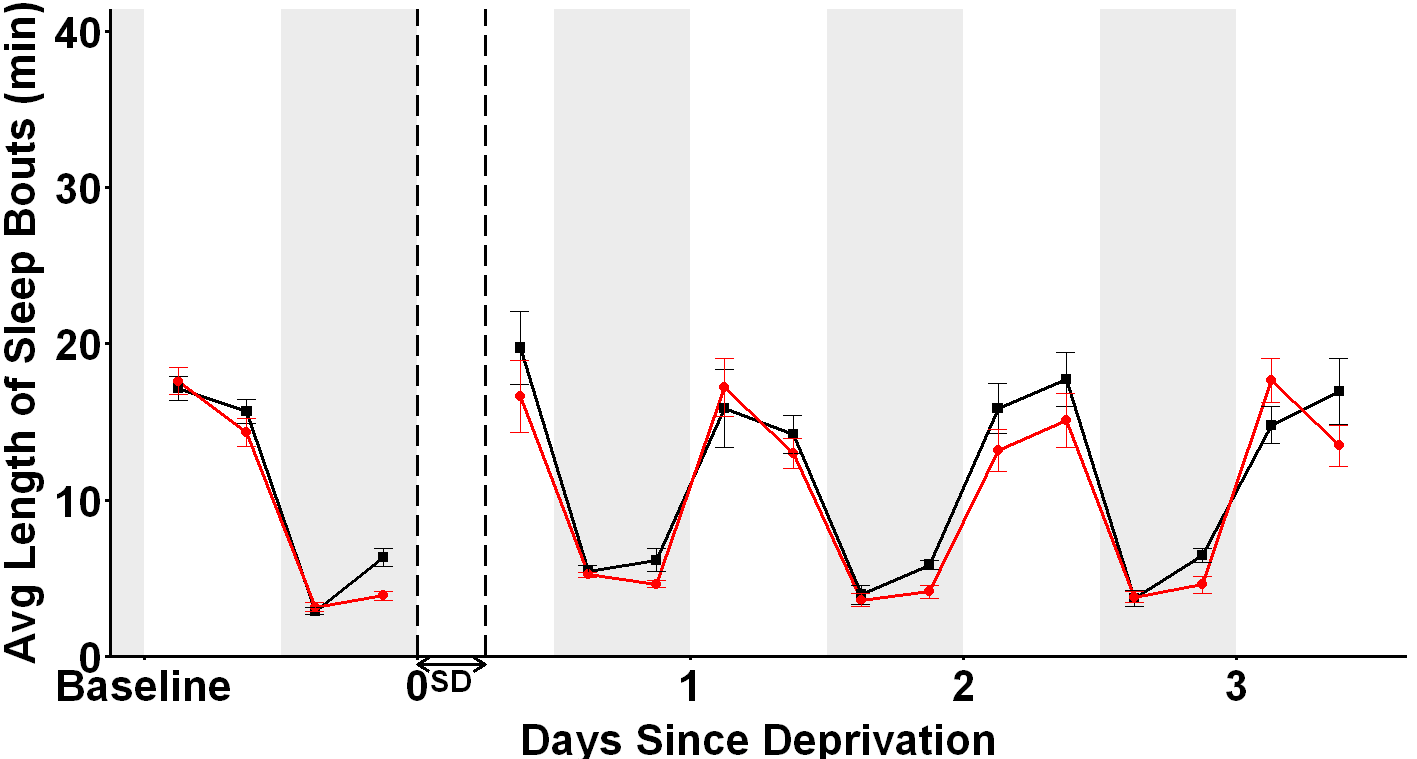

In [95]:
#Line Graph - Length of Bouts 6 Hour -Deprivation  - Females
options(repr.plot.width=30/2.54, repr.plot.height=16.07/2.54)   
BoutLength_Line(HOUR=Six_Hour_Pivot%>%filter(Sex=="Female"),
                  label1=c("wild-type Female", "Dexras1 KO Female"))
  ggsave("Plots/6H_DEPRIVATION_Bout_Length_Line_Plot_F.png",width=30, height=16.07,units = "cm")

# <center> Sleep Deprivation Analysis: Sleep, Number of Bouts, and Length of Bouts in 6 Hour Bins - Normalized Bar Graphs

Say we are comparing total sleep differences between Dexras1 KO and C57 wild-type mice during the first six-hour interval following sleep deprivation. The best comparison would be to normalize total sleep to the same interval from the baseline data. The best measure of baseline data would be an average of the 7 days of baseline recordings. We can produce bar graphs comparing Dexras1 KO and C57 wild-type mice using the Six_Hour_Pivot dataframe:

In [96]:
head(Six_Hour_Pivot)

start_pivot,Animal_Type,Animal_ID,Sleep,Bouts,LengthBouts,Sex
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
2022-06-24 09:00:00,C57,C57_Female_1,266.4024,15.28571,19.80571,Female
2022-06-24 09:00:00,C57,C57_Female_2,262.4262,20.42857,13.55254,Female
2022-06-24 09:00:00,C57,C57_Female_3,244.2786,21.42857,15.61767,Female
2022-06-24 09:00:00,C57,C57_Female_4,284.2976,17.14286,17.69511,Female
2022-06-24 09:00:00,C57,C57_Female_5,304.5714,17.85714,17.42390,Female
2022-06-24 09:00:00,C57,C57_Female_6,258.7500,14.14286,20.98409,Female


To run split-plot ANOVAs on these data, we need to make some modifications to Six_Hour_Pivot:

In [97]:
Stats_Data <- Six_Hour_Pivot%>%
    filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-26T09:00:00"))%>% #only including data up to 24 hours post-deprivation
    mutate(Sleep=Sleep/360, start_pivot_hour=hour(ymd_hms(start_pivot)), #extract from start_pivot only the hour
           relative=case_when(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")~"pre", #define a new variable to determine if the recording is pre- or post-deprivation
                              ymd_hms(start_pivot)>ymd_hms("2022-06-25T03:00:00")~"post"),
           start_pivot_hour=as.factor(case_when(start_pivot_hour==15~"0-6", #create new variable, start_pivot_hour which will tell how many hours have passed since deprivation
                                      start_pivot_hour==21~"6-12",
                                      start_pivot_hour==3~"12-18",
                                      start_pivot_hour==9~"18-24")))%>%
    group_by(start_pivot_hour, Animal_ID, Animal_Type, Sex)%>%
    summarize(relativeSleep=Sleep[relative=="post"]/Sleep[relative=="pre"], #define relativeSleep to normalize post-deprivation to baseline
              relativeNBouts=Bouts[relative=="post"]/Bouts[relative=="pre"], #define relativeNBouts to normalize post-deprivation to baseline
              relativeLBouts=LengthBouts[relative=="post"]/LengthBouts[relative=="pre"])%>% #define relativeLBouts to normalize post-deprivation to baseline
    ungroup()
head(Stats_Data)

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID', 'Animal_Type'. You can override using the `.groups` argument.


start_pivot_hour,Animal_ID,Animal_Type,Sex,relativeSleep,relativeNBouts,relativeLBouts
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
18-24,C57_Female_1,C57,Female,0.8357658,0.6542056,1.1241709
18-24,C57_Female_2,C57,Female,1.0700787,0.7832168,1.2950370
18-24,C57_Female_3,C57,Female,0.9577863,0.9800000,0.7133761
18-24,C57_Female_4,C57,Female,0.9487710,1.4583333,0.6097354
18-24,C57_Female_5,C57,Female,1.0213806,1.2880000,0.7762536
18-24,C57_Female_6,C57,Female,1.2061192,1.9797980,0.5311563


## <center> Sleep Deprivation - Total Sleep in 6 Hour Intervals - Bar Graphs

In [98]:
Six_Hour_Dep_Bar_Plot<- function(Data, label1){
        Data%>%
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-26T09:00:00"))%>% #only including data up to 24 hours post-deprivation
        mutate(Sleep=Sleep/360, start_pivot_hour=hour(ymd_hms(start_pivot)), #extract from start_pivot only the hour
               relative=case_when(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")~"pre",  #define a new variable to determine if the recording is pre- or post-deprivation
               ymd_hms(start_pivot)>ymd_hms("2022-06-25T03:00:00")~"post"),
               start_pivot_hour=case_when(start_pivot_hour==15~"0-6", #create new variable, start_pivot_hour which will tell how many hours have passed since deprivation
                                          start_pivot_hour==21~"6-12",
                                          start_pivot_hour==3~"12-18",
                                          start_pivot_hour==9~"18-24"))%>%
        group_by(start_pivot_hour, Animal_ID, Animal_Type)%>%
        summarize(relativeSleep=Sleep[relative=="post"]/Sleep[relative=="pre"])%>% #define relativeSleep to normalize post-deprivation to baseline
        ungroup()%>%
        group_by(start_pivot_hour, Animal_Type)%>%
        summarize(mean=mean(relativeSleep),
                  sd=std.error(relativeSleep))%>%
        ungroup()%>%
        mutate(start_pivot_hour=fct_relevel(c("0-6","0-6","12-18","12-18",
                                              "18-24","18-24","6-12","6-12"),c("0-6","6-12","12-18","18-24")))%>% #reorder levels to have "0-6" first when plotted
        ggplot(aes(x=start_pivot_hour, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 1.5,
                  xmax=3.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_hline(yintercept=1, linetype="dashed", size=3.5, color="black", alpha=1)+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_y_continuous(breaks=c(0,.5,1, 1.5, 2,2.5, 3, 3.5,3.5,4, 4.5),expand=expansion(mult=c(0,0.01)),limits=c(0,4.5))+
        labs(x="Time After Sleep Deprivation (Hours)", y="Proportion Sleep Relative to Baseline")+
        theme_bw()+
        theme(legend.text=element_text(size=13),
              axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position = "none")
    }
  

$ANOVA
                        Effect DFn DFd            F            p p<.05
2                  Animal_Type   1  34  0.026125210 8.725516e-01      
3             start_pivot_hour   3 102 31.647576212 1.522876e-14     *
4 Animal_Type:start_pivot_hour   3 102  0.007878225 9.990336e-01      
           ges
2 0.0002085423
3 0.4041001138
4 0.0001687836

$`Mauchly's Test for Sphericity`
                        Effect           W            p p<.05
3             start_pivot_hour 0.001710069 6.772312e-43     *
4 Animal_Type:start_pivot_hour 0.001710069 6.772312e-43     *

$`Sphericity Corrections`
                        Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.3661796 1.027088e-06         * 0.3692729
4 Animal_Type:start_pivot_hour 0.3661796 9.438601e-01           0.3692729
         p[HF] p[HF]<.05
3 9.397683e-07         *
4 9.450232e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


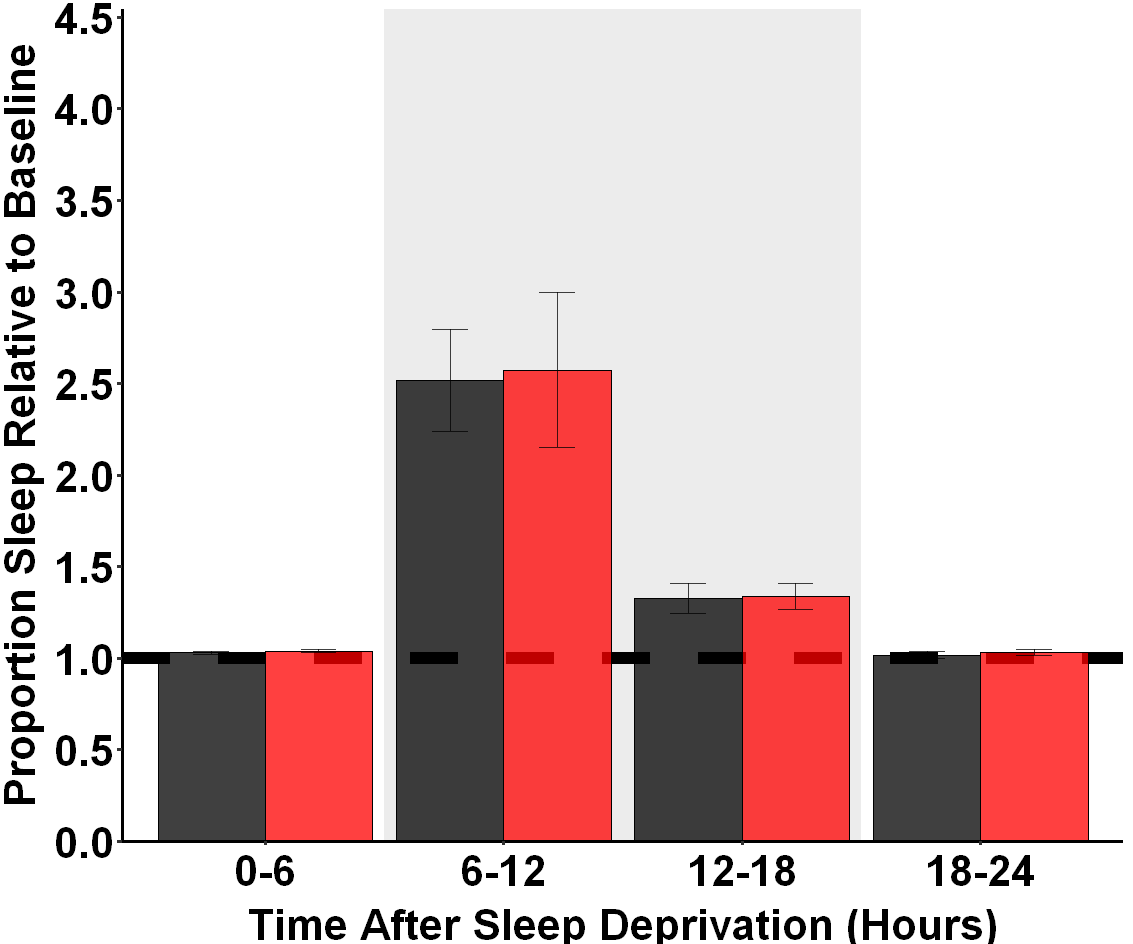

In [99]:
#Split-Plot ANOVA - Total Sleep 6 Hour - Deprivation - Both Sexes
ezANOVA(Stats_Data,
          dv=.(relativeSleep), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#Bar Graph - Total Sleep 6 Hour - Deprivation - Both Sexes
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54)  
Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot, label1=c("wild_type", "Dexras1 KO"))
  ggsave("Plots/DEP_SLeep_Bar_Interval.png",width=24, height=20,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd          F            p p<.05
2                  Animal_Type   1  16  0.2661833 6.129595e-01      
3             start_pivot_hour   3  48 63.2460180 1.061411e-16     *
4 Animal_Type:start_pivot_hour   3  48  1.9635718 1.320244e-01      
          ges
2 0.006296088
3 0.709928588
4 0.070618329

$`Mauchly's Test for Sphericity`
                        Effect         W            p p<.05
3             start_pivot_hour 0.1524746 4.410925e-05     *
4 Animal_Type:start_pivot_hour 0.1524746 4.410925e-05     *

$`Sphericity Corrections`
                        Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.5692622 2.028427e-10         * 0.6304686
4 Animal_Type:start_pivot_hour 0.5692622 1.645027e-01           0.6304686
         p[HF] p[HF]<.05
3 2.578741e-11         *
4 1.597364e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


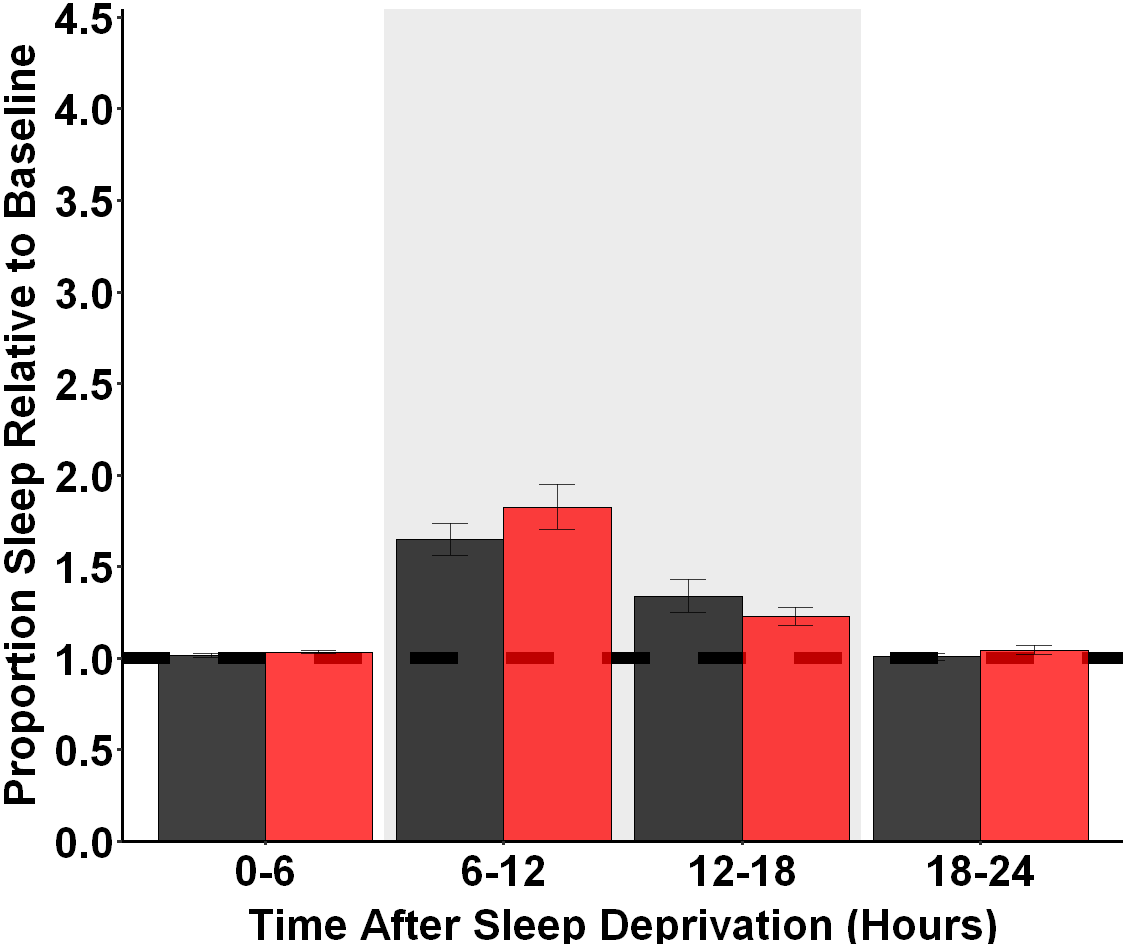

In [100]:
#Split-Plot ANOVA - Total Sleep 6 Hour - Deprivation - Males
ezANOVA(Stats_Data%>%filter(Sex=="Male"),
          dv=.(relativeSleep), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#Bar Graph - Total Sleep 6 Hour - Deprivation - Males
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54) 
  Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Male"), label1=c("wild_type Male", "Dexras1 KO Male"))
  ggsave("Plots/DEP_SLeep_Bar_Interval_M.png",width=24, height=20,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd            F            p p<.05
2                  Animal_Type   1  16  0.003948599 9.506739e-01      
3             start_pivot_hour   3  48 25.670053489 4.704091e-10     *
4 Animal_Type:start_pivot_hour   3  48  0.034637099 9.912466e-01      
           ges
2 6.463642e-05
3 5.421552e-01
4 1.595243e-03

$`Mauchly's Test for Sphericity`
                        Effect           W            p p<.05
3             start_pivot_hour 0.001154236 1.059176e-19     *
4 Animal_Type:start_pivot_hour 0.001154236 1.059176e-19     *

$`Sphericity Corrections`
                        Effect      GGe        p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.368786 5.859738e-05         * 0.3761803
4 Animal_Type:start_pivot_hour 0.368786 8.764840e-01           0.3761803
         p[HF] p[HF]<.05
3 5.097192e-05         *
4 8.805593e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


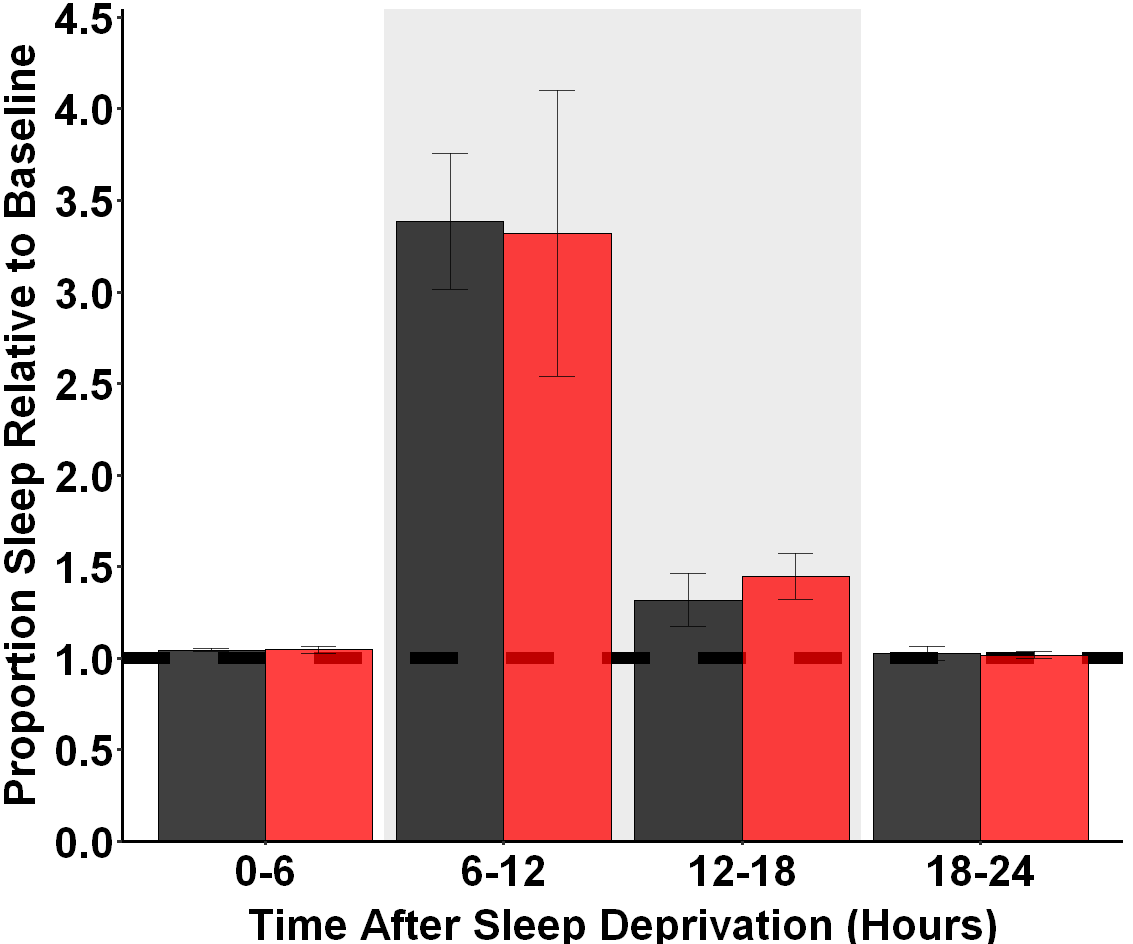

In [101]:
#Split-Plot ANOVA - Total Sleep 6 Hour - Deprivation - Females 
ezANOVA(Stats_Data%>%filter(Sex=="Female"),
          dv=.(relativeSleep), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#Bar Graph - Total Sleep 6 Hour - Deprivation - Females
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54) 
 Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Female"), label1=c("wild_type Female", "Dexras1 KO Female"))
  ggsave("Plots/DEP_SLeep_Bar_Interval_F.png",width=24, height=20,units = "cm")

## <center> Sleep Deprivation - Number of Bouts in 6 Hour Intervals - Bar Graphs

In [102]:
 BOUT_Six_Hour_Dep_Bar_Plot<- function(Data, label1){
      Data%>%
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-26T09:00:00"))%>% #only including data up to 24 hours post-deprivation
        mutate(Sleep=Sleep/360, start_pivot_hour=hour(ymd_hms(start_pivot)), #extract from start_pivot only the hour
               relative=case_when(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")~"pre", #define a new variable to determine if the recording is pre- or post-deprivation
                                  ymd_hms(start_pivot)>ymd_hms("2022-06-25T03:00:00")~"post"),
               start_pivot_hour=case_when(start_pivot_hour==15~"0-6", #create new variable, start_pivot_hour which will tell how many hours have passed since deprivation
                                          start_pivot_hour==21~"6-12",
                                          start_pivot_hour==3~"12-18",
                                          start_pivot_hour==9~"18-24"))%>%
        group_by(start_pivot_hour, Animal_ID, Animal_Type)%>%
        summarize(relativeNBouts=Bouts[relative=="post"]/Bouts[relative=="pre"])%>% #define relativeNBouts to normalize post-deprivation to baseline
        ungroup()%>%
        group_by(start_pivot_hour, Animal_Type)%>%
        summarize(mean=mean(relativeNBouts),
                  sd=std.error(relativeNBouts))%>%
        ungroup()%>%
        mutate(start_pivot_hour=fct_relevel(c("0-6","0-6","12-18","12-18",
                                              "18-24","18-24","6-12","6-12"),c("0-6","6-12","12-18","18-24")))%>% #reorder levels to have "0-6" first when plotted
        ggplot(aes(x=start_pivot_hour, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 1.5,
                  xmax=3.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_hline(yintercept=1, linetype="dashed", size=3.5, color="black", alpha=1)+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_y_continuous(breaks=c(0,.5,1, 1.5, 2, 2.5),expand=expansion(mult=c(0,0.01)),limits=c(0,2.5))+
        labs(x="Time After Sleep Deprivation (Hours)", y="Proportion Bouts Relative to Baseline")+
        theme_bw()+
        theme(legend.text=element_text(size=13),
              axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position="none")
    }

$ANOVA
                        Effect DFn DFd          F            p p<.05
2                  Animal_Type   1  34  0.9504509 3.364902e-01      
3             start_pivot_hour   3 102 16.0993783 1.217431e-08     *
4 Animal_Type:start_pivot_hour   3 102  0.0389284 9.896850e-01      
           ges
2 0.0089665588
3 0.2425707553
4 0.0007737803

$`Mauchly's Test for Sphericity`
                        Effect         W            p p<.05
3             start_pivot_hour 0.4271784 3.968703e-05     *
4 Animal_Type:start_pivot_hour 0.4271784 3.968703e-05     *

$`Sphericity Corrections`
                        Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.6271166 3.446921e-06         * 0.6626186
4 Animal_Type:start_pivot_hour 0.6271166 9.552261e-01           0.6626186
         p[HF] p[HF]<.05
3 2.007823e-06         *
4 9.612137e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


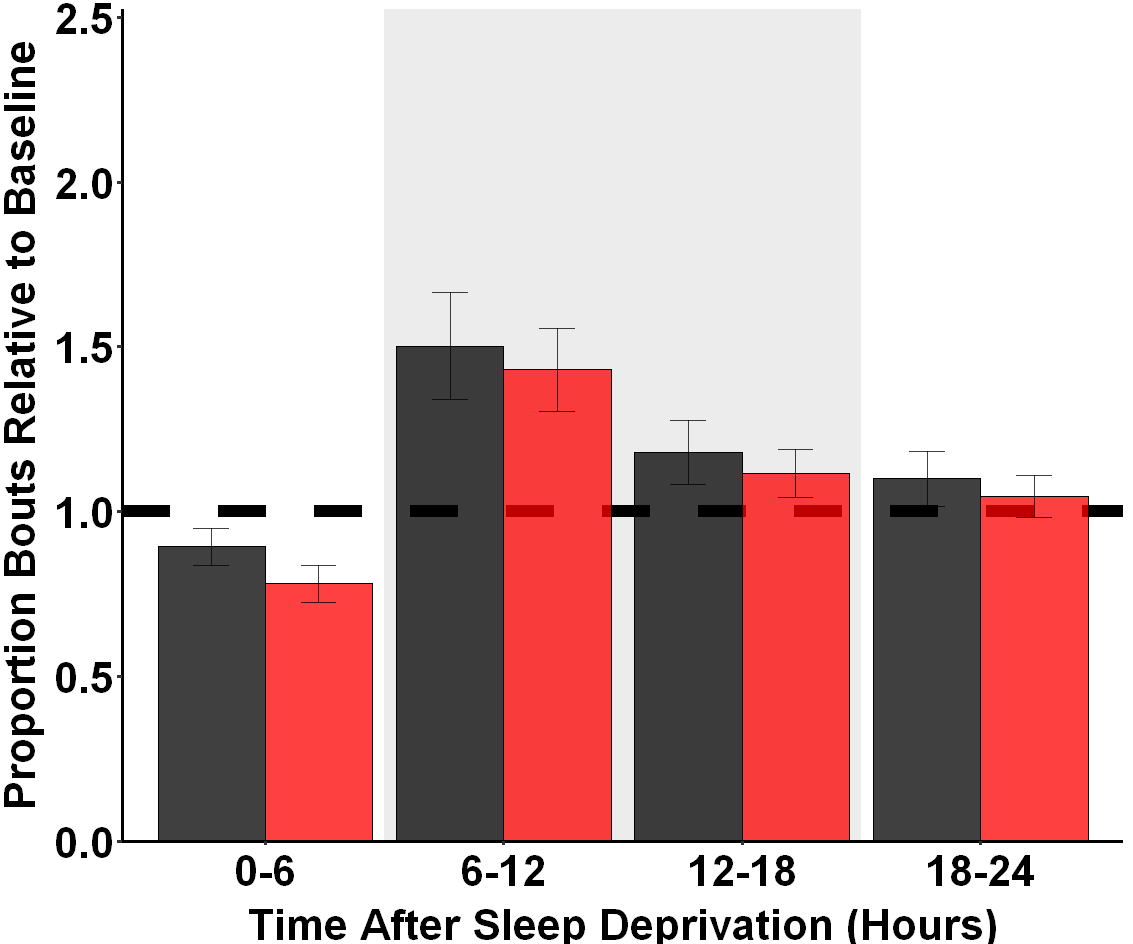

In [103]:
#Split-Plot ANOVA - Number of Bouts 6 Hour - Deprivation - Both Sexes 
ezANOVA(Stats_Data,
          dv=.(relativeNBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#Bar Graph - Number of Bouts 6 Hour - Deprivation - Both Sexes 
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54) 
BOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot, label1=c("wild_type", "Dexras1 KO"))
    ggsave("Plots/DEP_BOUT_Bar_Interval.png",width=24, height=20,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd         F           p p<.05         ges
2                  Animal_Type   1  16 0.3296165 0.573868380       0.005504718
3             start_pivot_hour   3  48 6.3540204 0.001025393     * 0.225061159
4 Animal_Type:start_pivot_hour   3  48 2.2068521 0.099388163       0.091626709

$`Mauchly's Test for Sphericity`
                        Effect         W         p p<.05
3             start_pivot_hour 0.7537393 0.5271339      
4 Animal_Type:start_pivot_hour 0.7537393 0.5271339      

$`Sphericity Corrections`
                        Effect       GGe       p[GG] p[GG]<.05      HFe
3             start_pivot_hour 0.8393321 0.002137642         * 1.008899
4 Animal_Type:start_pivot_hour 0.8393321 0.111710127           1.008899
        p[HF] p[HF]<.05
3 0.001025393         *
4 0.099388163

,start_pivot_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,18-24,relativeNBouts,C57,Dexras1KO,9,9,-0.1326975,16,0.89600,0.89600
2,0-6,relativeNBouts,C57,Dexras1KO,9,9,3.0939321,16,0.00697,0.02788
3,6-12,relativeNBouts,C57,Dexras1KO,9,9,-0.4444718,16,0.66300,0.88400
4,12-18,relativeNBouts,C57,Dexras1KO,9,9,-0.6284149,16,0.53900,0.88400


`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


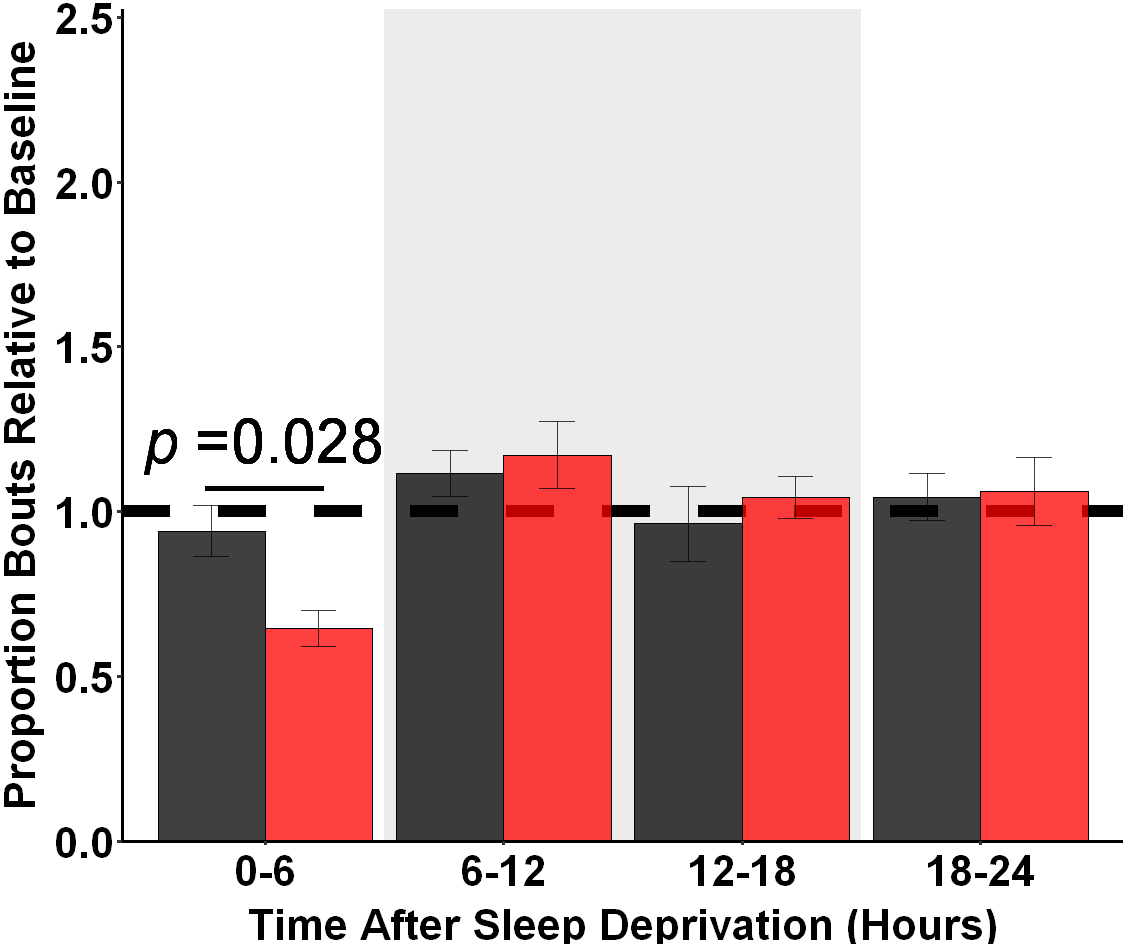

In [104]:
#Split-Plot ANOVA - Number of Bouts 6 Hour - Deprivation - Males
ezANOVA(Stats_Data%>%filter(Sex=="Male"),
          dv=.(relativeNBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#NOTE:Overall Split-Plot missed significance
#Post hoc t tests - Number of Bouts 6 Hour - Deprivation - Males
p_adjust_Number_Bouts_Male_depri<-Stats_Data%>%filter(Sex=="Male")%>%
    group_by(start_pivot_hour)%>%
    t_test(relativeNBouts~Animal_Type, var.equal=TRUE)%>%
    adjust_pvalue(method = "BH")
p_adjust_Number_Bouts_Male_depri
#Bar Graph - Number of Bouts 6 Hour - Deprivation - Males 
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54) 
 BOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Male"), label1=c("wild_type Male", "Dexras1 KO Male"))+
    geom_text(x="0-6", y=1.2, label="italic('p')~'=0.028'", angle=0, size=13, parse=TRUE)+
    geom_segment(y=1.07, yend=1.07, x=0.75, xend=1.25, size=1.5)
   ggsave("Plots/DEP_BOUT_Bar_Interval_M.png",width=24, height=20,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd          F            p p<.05        ges
2                  Animal_Type   1  16  1.0500273 3.207448e-01       0.01766813
3             start_pivot_hour   3  48 13.3720707 1.806703e-06     * 0.37760798
4 Animal_Type:start_pivot_hour   3  48  0.3738751 7.722124e-01       0.01668015

$`Mauchly's Test for Sphericity`
                        Effect         W           p p<.05
3             start_pivot_hour 0.3480554 0.008445179     *
4 Animal_Type:start_pivot_hour 0.3480554 0.008445179     *

$`Sphericity Corrections`
                        Effect       GGe       p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.5860592 0.000141402         * 0.6527493
4 Animal_Type:start_pivot_hour 0.5860592 0.664668038           0.6527493
         p[HF] p[HF]<.05
3 6.966122e-05         *
4 6.867229e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


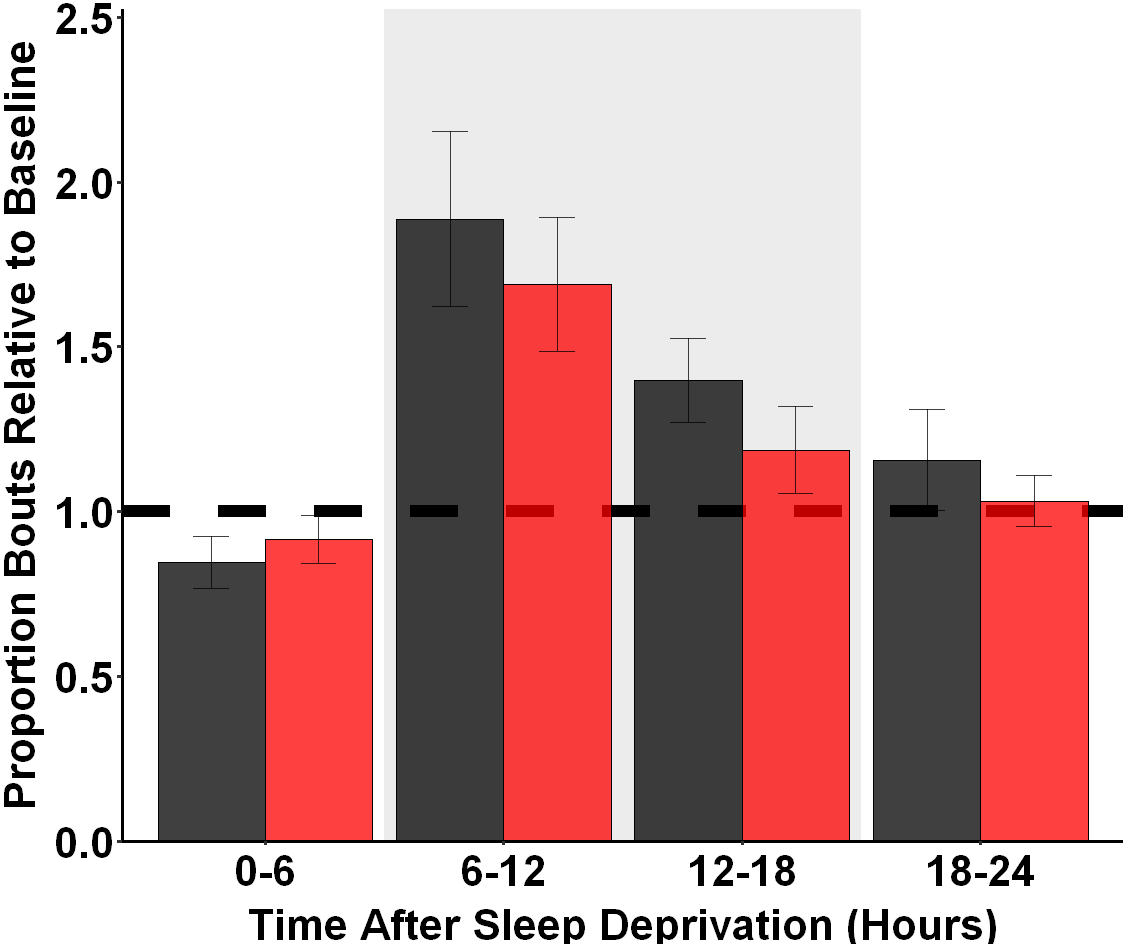

In [105]:
#Split-Plot ANOVA - Number of Bouts 6 Hour - Deprivation - Females
ezANOVA(Stats_Data%>%filter(Sex=="Female"),
          dv=.(relativeNBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
#Split-Plot ANOVA - Number of Bouts 6 Hour - Deprivation - Females
options(repr.plot.width=24/2.54, repr.plot.height=20/2.54) 
BOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Female"), label1=c("wild_type Female", "Dexras1 KO Female"))
   ggsave("Plots/DEP_BOUT_Bar_Interval_F.png",width=24, height=20,units = "cm")

## <center> Sleep Deprivation - Length of Bouts in 6 Hour Intervals - Bar Graphs

In [106]:
LBOUT_Six_Hour_Dep_Bar_Plot<- function(Data, label1){
      Data%>%
        filter(ymd_hms(start_pivot)<=ymd_hms("2022-06-26T09:00:00"))%>% #only including data up to 24 hours post-deprivation
        mutate(Sleep=Sleep/360, start_pivot_hour=hour(ymd_hms(start_pivot)), #extract from start_pivot only the hour
               relative=case_when(ymd_hms(start_pivot)<=ymd_hms("2022-06-25T03:00:00")~"pre", #define a new variable to determine if the recording is pre- or post-deprivation
                                  ymd_hms(start_pivot)>ymd_hms("2022-06-25T03:00:00")~"post"),
               start_pivot_hour=case_when(start_pivot_hour==15~"0-6", #create new variable, start_pivot_hour which will tell how many hours have passed since deprivation
                                          start_pivot_hour==21~"6-12",
                                          start_pivot_hour==3~"12-18",
                                          start_pivot_hour==9~"18-24"))%>%
        group_by(start_pivot_hour, Animal_ID, Animal_Type)%>%
        summarize(relativeLBouts=LengthBouts[relative=="post"]/LengthBouts[relative=="pre"])%>% #define relativeLBouts to normalize post-deprivation to baseline
        ungroup()%>%
        group_by(start_pivot_hour, Animal_Type)%>%
        summarize(mean=mean(relativeLBouts),
                  sd=std.error(relativeLBouts))%>%
        ungroup()%>%
        mutate(start_pivot_hour=fct_relevel(c("0-6","0-6","12-18","12-18",
                                              "18-24","18-24","6-12","6-12"),c("0-6","6-12","12-18","18-24")))%>%  #reorder levels to have "0-6" first when plotted
        ggplot(aes(x=start_pivot_hour, y=mean, fill=Animal_Type))+
        geom_rect(xmin = 1.5,
                  xmax=3.5,ymin=-Inf, ymax=+Inf, fill="#ECECEC")+
        geom_hline(yintercept=1, linetype="dashed", size=3.5, color="black", alpha=1)+
        geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
        geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
        scale_fill_manual(values=c("black", "red"), labels=label1)+
        scale_y_continuous(breaks=c(0,.5,1, 1.5, 2.0, 2.5),expand=expansion(mult=c(0,0.01)),limits=c(0,2.5))+
        labs(x="Time After Sleep Deprivation (Hours)", y="Proportion Bout Lengths Relative to Baseline")+
        theme_bw()+
        theme(legend.text=element_text(size=13),
              axis.text=element_text(size=26, color="black", face="bold"),
              axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
              axis.title.y=element_text(vjust=+1.8),
              axis.title=element_text(size=26, face="bold"),
              axis.ticks= element_line(size=1),
              axis.line = element_line(size=1),
              axis.title.x=element_text(vjust=-0.5),
              panel.border = element_blank(),
              panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              legend.title=element_blank(),
              legend.position="none")
    }
   

$ANOVA
                        Effect DFn DFd          F            p p<.05
2                  Animal_Type   1  34  0.4464529 5.085351e-01      
3             start_pivot_hour   3 102 17.0947514 4.549586e-09     *
4 Animal_Type:start_pivot_hour   3 102  0.6457074 5.874185e-01      
          ges
2 0.002932651
3 0.280660850
4 0.014523372

$`Mauchly's Test for Sphericity`
                        Effect         W         p p<.05
3             start_pivot_hour 0.9258348 0.7733363      
4 Animal_Type:start_pivot_hour 0.9258348 0.7733363      

$`Sphericity Corrections`
                        Effect       GGe        p[GG] p[GG]<.05     HFe
3             start_pivot_hour 0.9485752 1.036992e-08         * 1.04427
4 Animal_Type:start_pivot_hour 0.9485752 5.795377e-01           1.04427
         p[HF] p[HF]<.05
3 4.549586e-09         *
4 5.874185e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


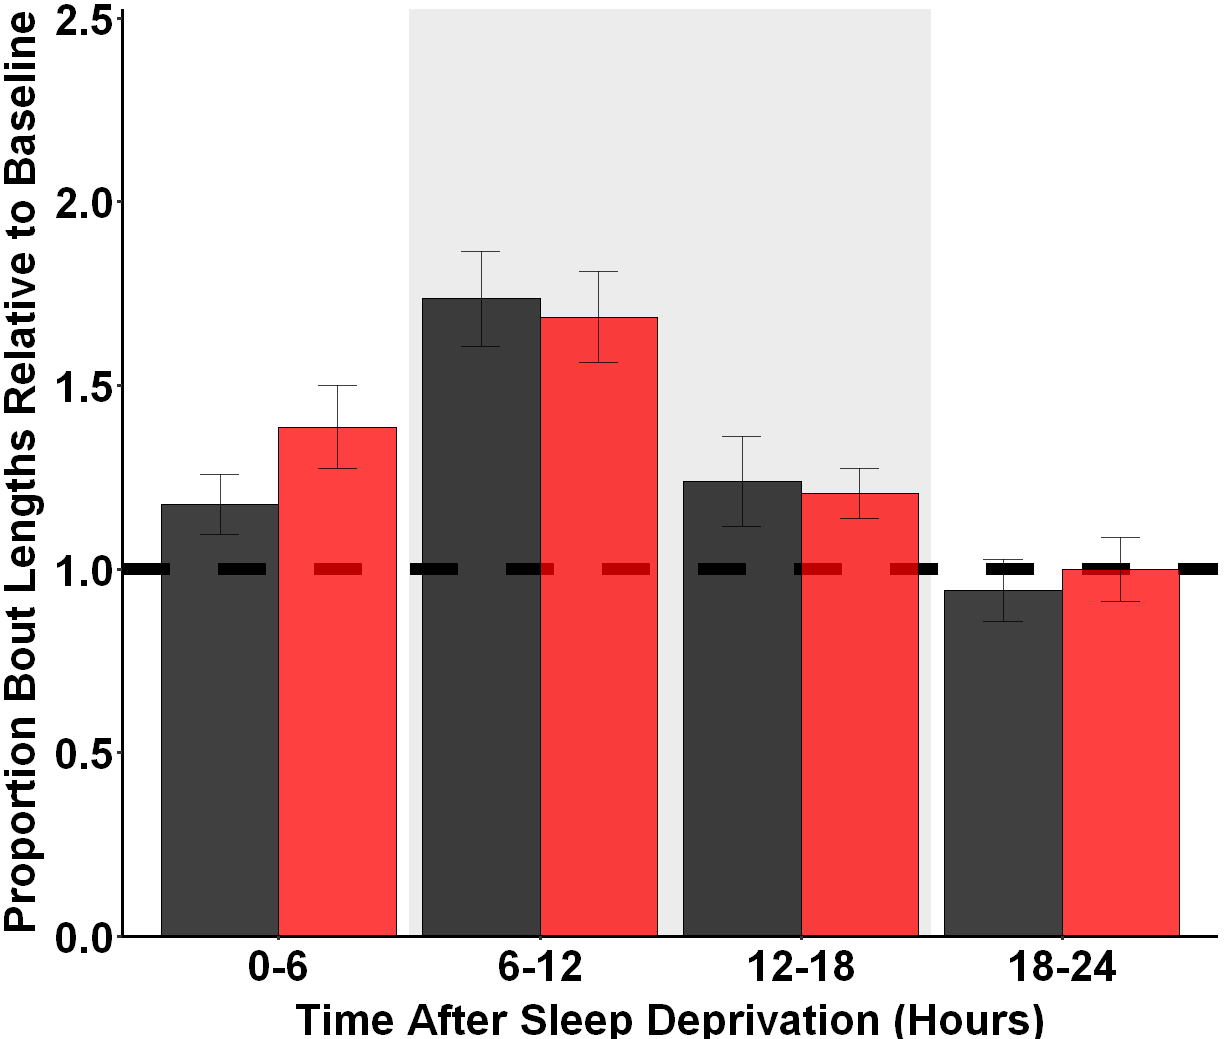

In [107]:
 #Split-Plot ANOVA - Length of Bouts 6 Hour - Deprivation - Both Sexes
ezANOVA(Stats_Data,
           dv=.(relativeLBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
 #Bar Graph - Length of Bouts 6 Hour - Deprivation - Both Sexes
options(repr.plot.width=26/2.54, repr.plot.height=22/2.54) 
LBOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot, label1=c("wild_type", "Dexras1 KO"))
   ggsave("Plots/DEP_LBOUT_Bar_Interval.png",width=26, height=22,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd        F            p p<.05        ges
2                  Animal_Type   1  16 1.262484 0.2777579325       0.02122238
3             start_pivot_hour   3  48 7.218782 0.0004289748     * 0.24653114
4 Animal_Type:start_pivot_hour   3  48 4.372361 0.0084312326     * 0.16540047

$`Mauchly's Test for Sphericity`
                        Effect         W         p p<.05
3             start_pivot_hour 0.7283561 0.4588069      
4 Animal_Type:start_pivot_hour 0.7283561 0.4588069      

$`Sphericity Corrections`
                        Effect       GGe       p[GG] p[GG]<.05      HFe
3             start_pivot_hour 0.8345496 0.001041816         * 1.001802
4 Animal_Type:start_pivot_hour 0.8345496 0.013214303         * 1.001802
         p[HF] p[HF]<.05
3 0.0004289748         *
4 0.0084312326         *

,start_pivot_hour,.y.,group1,group2,n1,n2,statistic,df,p,p.adj
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,18-24,relativeLBouts,C57,Dexras1KO,9,9,-0.4536944,16,0.65600,0.65600
2,0-6,relativeLBouts,C57,Dexras1KO,9,9,-3.0631406,16,0.00743,0.02972
3,6-12,relativeLBouts,C57,Dexras1KO,9,9,-0.5483850,16,0.59100,0.65600
4,12-18,relativeLBouts,C57,Dexras1KO,9,9,1.5399305,16,0.14300,0.28600


`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


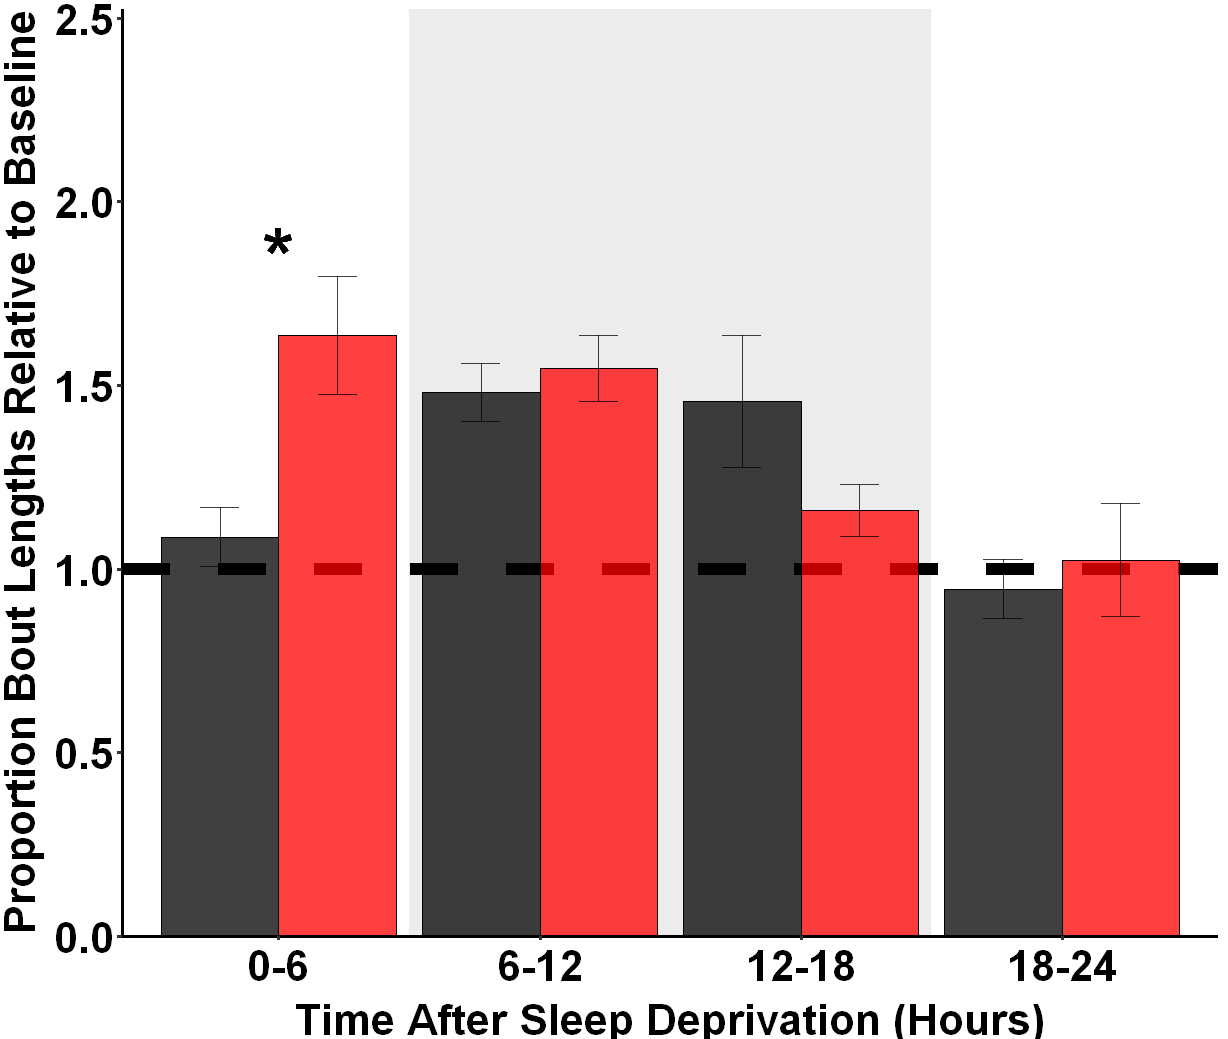

In [108]:
 #Split-Plot ANOVA - Length of Bouts 6 Hour - Deprivation - Males
ezANOVA(Stats_Data%>%filter(Sex=="Male"),
           dv=.(relativeLBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
 #Post hoc t tests - Length of Bouts 6 Hour - Deprivation - Males
p_adjust_Length_Bouts_Male_depri<-Stats_Data%>%filter(Sex=="Male")%>%
     group_by(start_pivot_hour)%>%
     t_test(relativeLBouts~Animal_Type, var.equal=TRUE)%>%
     adjust_pvalue(method = "BH")
p_adjust_Length_Bouts_Male_depri
 #Bar Graph - Length of Bouts 6 Hour - Deprivation - Males
options(repr.plot.width=26/2.54, repr.plot.height=22/2.54) 
LBOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Male"), label1=c("wild_type Male", "Dexras1 KO Male"))+
    geom_text(x="0-6", y=1.85, label="*", angle=0, size=18)
    ggsave("Plots/DEP_LBOUT_Bar_Interval_M.png",width=26, height=22,units = "cm")

Warning message:
"You have removed one or more Ss from the analysis. Refactoring "Animal_ID" for ANOVA."


$ANOVA
                        Effect DFn DFd            F            p p<.05
2                  Animal_Type   1  16  0.003758963 9.518714e-01      
3             start_pivot_hour   3  48 13.989304827 1.109113e-06     *
4 Animal_Type:start_pivot_hour   3  48  0.650723368 5.863838e-01      
           ges
2 0.0000576528
3 0.3975029994
4 0.0297754311

$`Mauchly's Test for Sphericity`
                        Effect         W         p p<.05
3             start_pivot_hour 0.6127673 0.2063397      
4 Animal_Type:start_pivot_hour 0.6127673 0.2063397      

$`Sphericity Corrections`
                        Effect       GGe        p[GG] p[GG]<.05       HFe
3             start_pivot_hour 0.7960794 1.035015e-05         * 0.9452621
4 Animal_Type:start_pivot_hour 0.7960794 5.536256e-01           0.9452621
         p[HF] p[HF]<.05
3 2.017001e-06         *
4 5.782536e-01

`summarise()` has grouped output by 'start_pivot_hour', 'Animal_ID'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'start_pivot_hour'. You can override using the `.groups` argument.


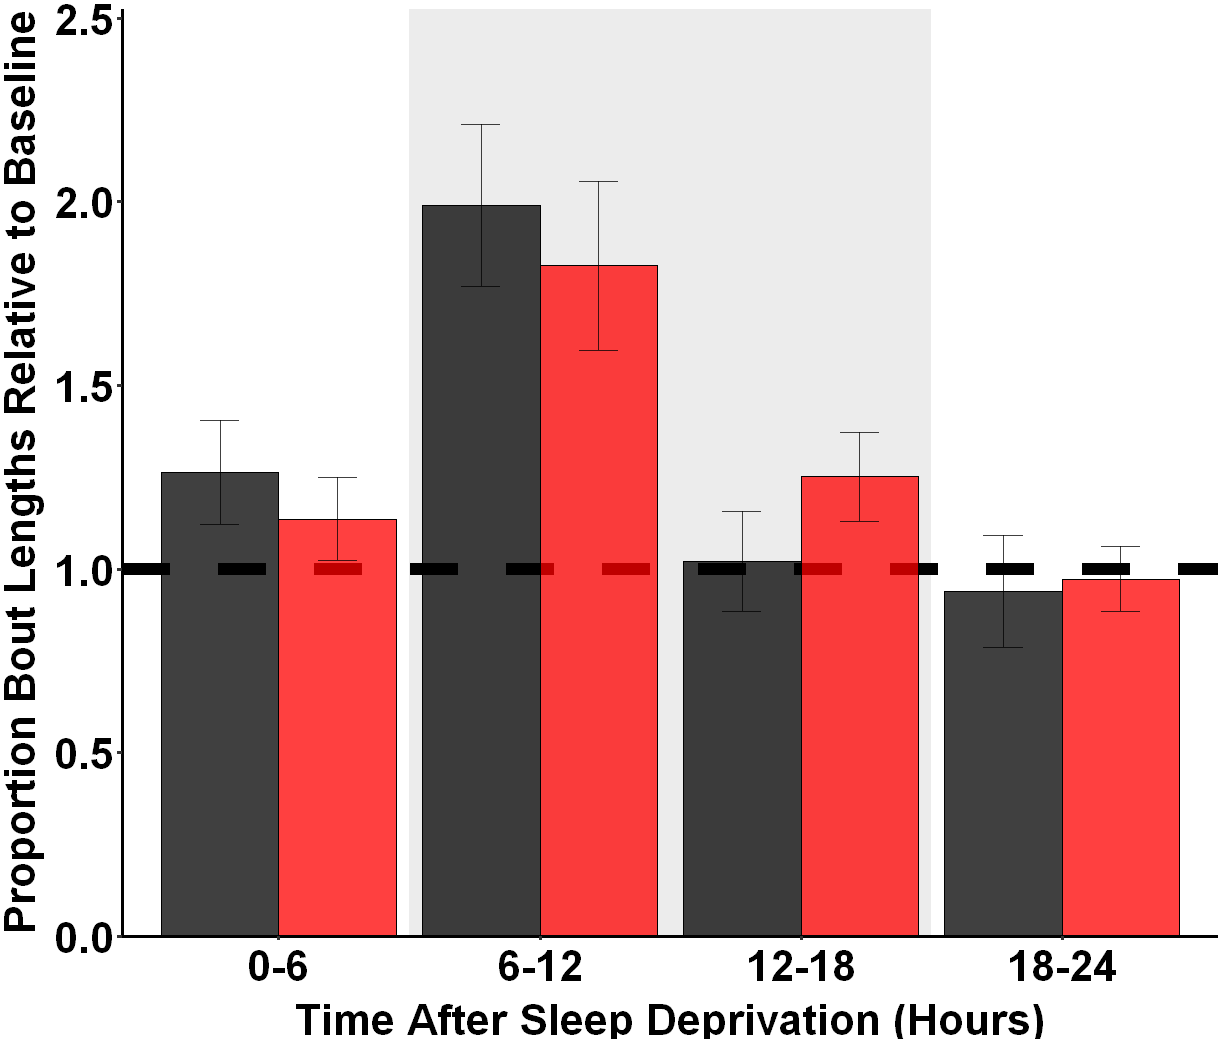

In [109]:
 #Split-Plot ANOVA - Length of Bouts 6 Hour - Deprivation - Females
ezANOVA(Stats_Data%>%filter(Sex=="Female"),
           dv=.(relativeLBouts), wid=.(Animal_ID), within=.(start_pivot_hour), between=.(Animal_Type))
 #Bar Graph - Length of Bouts 6 Hour - Deprivation - Females
options(repr.plot.width=26/2.54, repr.plot.height=22/2.54) 
LBOUT_Six_Hour_Dep_Bar_Plot(Six_Hour_Pivot%>%filter(Sex=="Female"), label1=c("wild_type Female", "Dexras1 KO Female"))
    ggsave("Plots/DEP_LBOUT_Bar_Interval_F.png",width=26, height=22,units = "cm")